# Code From Docstrings

- This notebook contains all of the examples found in the documentation (https://veroviz.org/docs).
- This notebook was last tested with VeRoViz version 0.4.3 (December 28, 2020).

--- 

In [1]:
import veroviz as vrv

vrv.checkVersion()

'Your current installed version of veroviz is 0.4.3. You are up-to-date with the latest available version.'

In [2]:
# Many of the examples below require the use of API keys for certain data providers.
# If you have saved your API keys as environment variables, you may use `os.environ` 
# to access them:

import os

ORS_API_KEY     = os.environ['ORSKEY']
OPENWEATHER_KEY = os.environ['OPENWEATHERKEY']
ELEV_API_KEY    = os.environ['ELEVAPIKEY']

# Otherwise, you can hard-code your keys here:
# ORS_API_KEY     = 'YOUR_ORS_KEY_GOES_HERE'
# OPENWEATHER_KEY = 'YOUR_OPENWEATHERMAP_KEY_GOES_HERE'
# ELEV_API_KEY    = 'YOUR_ELEVATION-API_KEY_GOES_HERE'

---
## createAssignments Module

This module includes the following functions:
- `addAssignment2D()`
- `addAssignment3D()`
- `addStaticAssignment()`
- `createAssignmentsFromArcs2D()`
- `createAssignmentsFromLocSeq2D()`
- `createAssignmentsFromNodeSeq2D()`

### `addAssignment2D()`
This function appends to an existing `Assignments` dataframe, or creates a new `Assignments` dataframe if `initAssignments` is `None`.  The new rows in this dataframe describe all of the "shapepoints" between between given starting and ending locations, including timestamps indicating the departure and arrival times for each shapepoint. Shapepoints are pairs of GPS coordinates that are connected by straight lines.  For a given origin and destination, numerous individual shapepoints can be combined to define a travel route along a road network.  

- See https://veroviz.org/docs/veroviz.createAssignments.html#veroviz.createAssignments.addAssignment2D for full documentation of this function.

In [3]:
# Import veroviz and check the latest version.
import veroviz as vrv

vrv.checkVersion()

'Your current installed version of veroviz is 0.4.3. You are up-to-date with the latest available version.'

In [4]:
# Define 5 node locations, as [lat, lon] pairs:
locs = [[42.8871085, -78.8731949],
        [42.8888311, -78.8649649],
        [42.8802158, -78.8660787],
        [42.8845705, -78.8762794],
        [42.8908031, -78.8770140]]

In [5]:
# Generate a nodes dataframe from these locations:
myNodes = vrv.createNodesFromLocs(locs=locs)
myNodes

id        lat        lon altMeters nodeName nodeType popupText  \
0  1  42.887108 -78.873195         0     None     None         1   
1  2  42.888831 -78.864965         0     None     None         2   
2  3  42.880216 -78.866079         0     None     None         3   
3  4  42.884571 -78.876279         0     None     None         4   
4  5  42.890803 -78.877014         0     None     None         5   

  leafletIconPrefix leafletIconType leafletColor leafletIconText  \
0         glyphicon       info-sign         blue               1   
1         glyphicon       info-sign         blue               2   
2         glyphicon       info-sign         blue               3   
3         glyphicon       info-sign         blue               4   
4         glyphicon       info-sign         blue               5   

  cesiumIconType cesiumColor cesiumIconText elevMeters  
0            pin        blue              1       None  
1            pin        blue              2       None  
2            pin        blue              3       None  
3            pin        blue              4       None  
4            pin        blue              5       None

In [6]:
# View these nodes on a map:
vrv.createLeaflet(nodes=myNodes)

In [7]:
# We're going to hard-code a solution.
# A car will start at node 1, visit nodes 2 and 3, and then return to node 1.
# A truck will follow a route from 1->5->4->1.
mySolution = {
    'car': [[1,2], [2,3], [3,1]],
    'truck': [[1,5], [5,4], [4,1]]
}

In [8]:
# Define some information about our 2 vehicles, for later use:
vehicleProperties = {
    'car':   {'model': 'veroviz/models/car_red.gltf',
              'color': 'red'},
    'truck': {'model': 'veroviz/models/ub_truck.gltf',
              'color': 'blue'}
}

In [9]:
# The following examples assume the use of ORS as the data provider. 
# If you have saved your API key as an environment variable, you may use `os.environ` to access it:
import os
ORS_API_KEY = os.environ['ORSKEY']
# Otherwise, you may specify your key here:
# ORS_API_KEY = 'YOUR_ORS_KEY_GOES_HERE'

Example 1 -- The vehicles will visit the nodes in their routes, without any service times.  Assume Euclidean travel (ignoring the road network).

In [10]:
# Build the assignments dataframe for the 2 vehicle routes.
# No service times, Euclidean travel:
myAssignments = vrv.initDataframe('assignments')
for v in mySolution:
    endTimeSec = 0.0
    for arc in mySolution[v]:
        [myAssignments, endTimeSec] = vrv.addAssignment2D(
            initAssignments = myAssignments,
            objectID        = v,
            modelFile       = vehicleProperties[v]['model'],
            startLoc        = list(myNodes[myNodes['id'] == arc[0]][['lat', 'lon']].values[0]),
            endLoc          = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
            startTimeSec    = endTimeSec,
            routeType       = 'euclidean2D',
            speedMPS        = vrv.convertSpeed(25, 'miles', 'hour', 'meters', 'second'),
            leafletColor    = vehicleProperties[v]['color'],
            cesiumColor     = vehicleProperties[v]['color'])
myAssignments

odID objectID                      modelFile modelScale modelMinPxSize  \
0    1      car   /veroviz/models/car_red.gltf        100             75   
1    2      car   /veroviz/models/car_red.gltf        100             75   
2    3      car   /veroviz/models/car_red.gltf        100             75   
3    4    truck  /veroviz/models/ub_truck.gltf        100             75   
4    5    truck  /veroviz/models/ub_truck.gltf        100             75   
5    6    truck  /veroviz/models/ub_truck.gltf        100             75   

   startTimeSec   startLat   startLon startAltMeters  endTimeSec  ...  \
0      0.000000  42.887108 -78.873195              0   62.545331  ...   
1     62.545331  42.888831 -78.864965              0  148.568576  ...   
2    148.568576  42.880216 -78.866079              0  234.592456  ...   
3      0.000000  42.887108 -78.873195              0   46.129575  ...   
4     46.129575  42.890803 -78.877014              0  108.314642  ...   
5    108.314642  42.884571 -78.876279              0  142.149457  ...   

   ganttColor  popupText startElevMeters endElevMeters wayname waycategory  \
0    darkgray       None            None          None    None        None   
1    darkgray       None            None          None    None        None   
2    darkgray       None            None          None    None        None   
3    darkgray       None            None          None    None        None   
4    darkgray       None            None          None    None        None   
5    darkgray       None            None          None    None        None   

   surface waytype steepness tollway  
0     None    None      None    None  
1     None    None      None    None  
2     None    None      None    None  
3     None    None      None    None  
4     None    None      None    None  
5     None    None      None    None  

[6 rows x 34 columns]

In [11]:
# Show the routes (and nodes) on a map:
vrv.createLeaflet(nodes=myNodes, arcs=myAssignments)

Example 2 -- The vehicles will now travel on the road network, but we'll still ignore service times.

In [12]:
# No service times, Travel on road network:
myAssignments = vrv.initDataframe('assignments')
for v in mySolution:
    endTimeSec = 0.0
    for arc in mySolution[v]:
        [myAssignments, endTimeSec] = vrv.addAssignment2D(
            initAssignments  = myAssignments,
            objectID         = v,
            modelFile        = vehicleProperties[v]['model'],
            startLoc         = list(myNodes[myNodes['id'] == arc[0]][['lat', 'lon']].values[0]),
            endLoc           = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
            startTimeSec     = endTimeSec,
            leafletColor     = vehicleProperties[v]['color'],
            cesiumColor      = vehicleProperties[v]['color'], 
            routeType        = 'fastest',
            dataProvider     = 'ORS-online', 
            dataProviderArgs = {'APIkey': ORS_API_KEY})
myAssignments        

odID objectID                      modelFile modelScale modelMinPxSize  \
0      1      car   /veroviz/models/car_red.gltf        100             75   
1      1      car   /veroviz/models/car_red.gltf        100             75   
2      1      car   /veroviz/models/car_red.gltf        100             75   
3      1      car   /veroviz/models/car_red.gltf        100             75   
4      1      car   /veroviz/models/car_red.gltf        100             75   
..   ...      ...                            ...        ...            ...   
124    6    truck  /veroviz/models/ub_truck.gltf        100             75   
125    6    truck  /veroviz/models/ub_truck.gltf        100             75   
126    6    truck  /veroviz/models/ub_truck.gltf        100             75   
127    6    truck  /veroviz/models/ub_truck.gltf        100             75   
128    6    truck  /veroviz/models/ub_truck.gltf        100             75   

     startTimeSec   startLat   startLon startAltMeters  endTimeSec  ...  \
0        0.000000  42.887083 -78.873203              0    4.616088  ...   
1        4.616088  42.887044 -78.872978              0    6.900000  ...   
2        6.900000  42.887031 -78.872865              0    7.566152  ...   
3        7.566152  42.887075 -78.872851              0   10.207138  ...   
4       10.207138  42.887249 -78.872793              0   11.530254  ...   
..            ...        ...        ...            ...         ...  ...   
124    219.847722  42.886207 -78.873120              0  221.523942  ...   
125    221.523942  42.886370 -78.873067              0  227.579740  ...   
126    227.579740  42.886961 -78.872888              0  228.300000  ...   
127    228.300000  42.887031 -78.872865              0  230.583912  ...   
128    230.583912  42.887044 -78.872978              0  235.200000  ...   

     ganttColor  popupText startElevMeters endElevMeters             wayname  \
0      darkgray       None           195.7         194.5  East Mohawk Street   
1      darkgray       None           194.5         193.3  East Mohawk Street   
2      darkgray       None           193.3         192.7   Washington Street   
3      darkgray       None           192.7         192.4   Washington Street   
4      darkgray       None           192.4         192.2   Washington Street   
..          ...        ...             ...           ...                 ...   
124    darkgray       None           198.0         198.0   Washington Street   
125    darkgray       None           198.0         197.2   Washington Street   
126    darkgray       None           197.2         196.8   Washington Street   
127    darkgray       None           196.8         196.6  East Mohawk Street   
128    darkgray       None           196.6         196.5  East Mohawk Street   

     waycategory  surface waytype steepness tollway  
0    No category  Asphalt  Street        -1    None  
1    No category  Asphalt  Street        -1    None  
2    No category  Asphalt    Road        -1    None  
3    No category  Asphalt    Road        -1    None  
4    No category  Asphalt    Road        -1    None  
..           ...      ...     ...       ...     ...  
124  No category  Asphalt    Road         0    None  
125  No category  Asphalt    Road         0    None  
126  No category  Asphalt    Road         0    None  
127  No category  Asphalt  Street         0    None  
128  No category  Asphalt  Street         0    None  

[129 rows x 34 columns]

In [13]:
# Show the routes (and nodes) on a map:
vrv.createLeaflet(nodes=myNodes, arcs=myAssignments)

Example 3 -- The vehicles are still following the road network, but now we'll force them to match the travel times specified in a travel matrix.

In [14]:
# We'll first create the travel time and distance matrices:
[timeSec, distMeters] = vrv.getTimeDist2D(nodes            = myNodes,
                                          routeType        = 'fastest',
                                          dataProvider     = 'ORS-online',
                                          dataProviderArgs = {'APIkey': ORS_API_KEY})

In [15]:
# No service times, Travel on road network, use travel times from the distance matrix:
# added "expDurationSec"
myAssignments = vrv.initDataframe('assignments')
for v in mySolution:
    endTimeSec = 0.0
    for arc in mySolution[v]:
        [myAssignments, endTimeSec] = vrv.addAssignment2D(
            initAssignments  = myAssignments,
            objectID         = v,
            modelFile        = vehicleProperties[v]['model'],
            startLoc         = list(myNodes[myNodes['id'] == arc[0]][['lat', 'lon']].values[0]),
            endLoc           = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
            startTimeSec     = endTimeSec,
            expDurationSec   = timeSec[arc[0], arc[1]],
            leafletColor     = vehicleProperties[v]['color'],
            cesiumColor      = vehicleProperties[v]['color'], 
            routeType        = 'fastest',
            dataProvider     = 'ORS-online', 
            dataProviderArgs = {'APIkey': ORS_API_KEY})
myAssignments   

odID objectID                      modelFile modelScale modelMinPxSize  \
0      1      car   /veroviz/models/car_red.gltf        100             75   
1      1      car   /veroviz/models/car_red.gltf        100             75   
2      1      car   /veroviz/models/car_red.gltf        100             75   
3      1      car   /veroviz/models/car_red.gltf        100             75   
4      1      car   /veroviz/models/car_red.gltf        100             75   
..   ...      ...                            ...        ...            ...   
124    6    truck  /veroviz/models/ub_truck.gltf        100             75   
125    6    truck  /veroviz/models/ub_truck.gltf        100             75   
126    6    truck  /veroviz/models/ub_truck.gltf        100             75   
127    6    truck  /veroviz/models/ub_truck.gltf        100             75   
128    6    truck  /veroviz/models/ub_truck.gltf        100             75   

     startTimeSec   startLat   startLon startAltMeters  endTimeSec  ...  \
0        0.000000  42.887083 -78.873203              0    1.891830  ...   
1        1.891830  42.887044 -78.872978              0    2.827855  ...   
2        2.827855  42.887031 -78.872865              0    3.330766  ...   
3        3.330766  42.887075 -78.872851              0    5.324577  ...   
4        5.324577  42.887249 -78.872793              0    6.323463  ...   
..            ...        ...        ...            ...         ...  ...   
124    221.394681  42.886207 -78.873120              0  223.490459  ...   
125    223.490459  42.886370 -78.873067              0  231.062021  ...   
126    231.062021  42.886961 -78.872888              0  231.962562  ...   
127    231.962562  42.887031 -78.872865              0  233.014299  ...   
128    233.014299  42.887044 -78.872978              0  235.140000  ...   

     ganttColor  popupText startElevMeters endElevMeters             wayname  \
0      darkgray       None           195.7         194.5  East Mohawk Street   
1      darkgray       None           194.5         193.3  East Mohawk Street   
2      darkgray       None           193.3         192.7   Washington Street   
3      darkgray       None           192.7         192.4   Washington Street   
4      darkgray       None           192.4         192.2   Washington Street   
..          ...        ...             ...           ...                 ...   
124    darkgray       None           198.0         198.0   Washington Street   
125    darkgray       None           198.0         197.2   Washington Street   
126    darkgray       None           197.2         196.8   Washington Street   
127    darkgray       None           196.8         196.6  East Mohawk Street   
128    darkgray       None           196.6         196.5  East Mohawk Street   

     waycategory  surface waytype steepness tollway  
0    No category  Asphalt  Street        -1    None  
1    No category  Asphalt  Street        -1    None  
2    No category  Asphalt    Road        -1    None  
3    No category  Asphalt    Road        -1    None  
4    No category  Asphalt    Road        -1    None  
..           ...      ...     ...       ...     ...  
124  No category  Asphalt    Road         0    None  
125  No category  Asphalt    Road         0    None  
126  No category  Asphalt    Road         0    None  
127  No category  Asphalt  Street         0    None  
128  No category  Asphalt  Street         0    None  

[129 rows x 34 columns]

Example 4 -- Add service times at each destination node

In [16]:
# 60-second service times at destinations, Travel on road network, use travel times from the distance matrix.
# Added use of `addStaticAssignment()` function for the service component.
myAssignments = vrv.initDataframe('assignments')
for v in mySolution:
    endTimeSec = 0.0
    for arc in mySolution[v]:
        [myAssignments, endTimeSec] = vrv.addAssignment2D(
            initAssignments  = myAssignments,
            objectID         = v,
            modelFile        = vehicleProperties[v]['model'],
            startLoc         = list(myNodes[myNodes['id'] == arc[0]][['lat', 'lon']].values[0]),
            endLoc           = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
            startTimeSec     = endTimeSec,
            expDurationSec   = timeSec[arc[0], arc[1]],
            leafletColor     = vehicleProperties[v]['color'],
            cesiumColor      = vehicleProperties[v]['color'], 
            routeType        = 'fastest',
            dataProvider     = 'ORS-online', 
            dataProviderArgs = {'APIkey': ORS_API_KEY})
        
        myAssignments = vrv.addStaticAssignment(
            initAssignments  = myAssignments,
            objectID         = v,
            modelFile        = vehicleProperties[v]['model'],
            loc              = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
            startTimeSec     = endTimeSec,
            endTimeSec       = endTimeSec + 60.0)
        
        endTimeSec += 60
myAssignments     

odID objectID                      modelFile modelScale modelMinPxSize  \
0      1      car   /veroviz/models/car_red.gltf        100             75   
1      1      car   /veroviz/models/car_red.gltf        100             75   
2      1      car   /veroviz/models/car_red.gltf        100             75   
3      1      car   /veroviz/models/car_red.gltf        100             75   
4      1      car   /veroviz/models/car_red.gltf        100             75   
..   ...      ...                            ...        ...            ...   
130   11    truck  /veroviz/models/ub_truck.gltf        100             75   
131   11    truck  /veroviz/models/ub_truck.gltf        100             75   
132   11    truck  /veroviz/models/ub_truck.gltf        100             75   
133   11    truck  /veroviz/models/ub_truck.gltf        100             75   
134   12    truck  /veroviz/models/ub_truck.gltf        100             75   

     startTimeSec   startLat   startLon startAltMeters  endTimeSec  ...  \
0        0.000000  42.887083 -78.873203              0    1.891830  ...   
1        1.891830  42.887044 -78.872978              0    2.827855  ...   
2        2.827855  42.887031 -78.872865              0    3.330766  ...   
3        3.330766  42.887075 -78.872851              0    5.324577  ...   
4        5.324577  42.887249 -78.872793              0    6.323463  ...   
..            ...        ...        ...            ...         ...  ...   
130    343.490459  42.886370 -78.873067              0  351.062021  ...   
131    351.062021  42.886961 -78.872888              0  351.962562  ...   
132    351.962562  42.887031 -78.872865              0  353.014299  ...   
133    353.014299  42.887044 -78.872978              0  355.140000  ...   
134    355.140000  42.887108 -78.873195              0  415.140000  ...   

     ganttColor  popupText startElevMeters endElevMeters             wayname  \
0      darkgray       None           195.7         194.5  East Mohawk Street   
1      darkgray       None           194.5         193.3  East Mohawk Street   
2      darkgray       None           193.3         192.7   Washington Street   
3      darkgray       None           192.7         192.4   Washington Street   
4      darkgray       None           192.4         192.2   Washington Street   
..          ...        ...             ...           ...                 ...   
130    darkgray       None             198         197.2   Washington Street   
131    darkgray       None           197.2         196.8   Washington Street   
132    darkgray       None           196.8         196.6  East Mohawk Street   
133    darkgray       None           196.6         196.5  East Mohawk Street   
134    darkgray       None            None          None                None   

     waycategory  surface waytype steepness tollway  
0    No category  Asphalt  Street        -1    None  
1    No category  Asphalt  Street        -1    None  
2    No category  Asphalt    Road        -1    None  
3    No category  Asphalt    Road        -1    None  
4    No category  Asphalt    Road        -1    None  
..           ...      ...     ...       ...     ...  
130  No category  Asphalt    Road         0    None  
131  No category  Asphalt    Road         0    None  
132  No category  Asphalt  Street         0    None  
133  No category  Asphalt  Street         0    None  
134         None     None    None      None    None  

[135 rows x 34 columns]


Example 5 -- Extend the previous example to show packages being left at destination nodes

In [17]:
# 30-second service times at destinations, Travel on road network:
# added another use of `addStaticAssignment()` function to drop packages.
myAssignments = vrv.initDataframe('assignments')
for v in mySolution:
    endTimeSec = 0.0
    for arc in mySolution[v]:
        [myAssignments, endTimeSec] = vrv.addAssignment2D(
            initAssignments  = myAssignments,
            objectID         = v,
            modelFile        = vehicleProperties[v]['model'],
            startLoc         = list(myNodes[myNodes['id'] == arc[0]][['lat', 'lon']].values[0]),
            endLoc           = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
            startTimeSec     = endTimeSec,
            leafletColor     = vehicleProperties[v]['color'],
            cesiumColor      = vehicleProperties[v]['color'], 
            ganttColor       = vehicleProperties[v]['color'],
            routeType        = 'fastest',
            dataProvider     = 'ORS-online', 
            dataProviderArgs = {'APIkey': ORS_API_KEY})
        
        myAssignments = vrv.addStaticAssignment(
            initAssignments  = myAssignments,
            objectID         = v,
            modelFile        = vehicleProperties[v]['model'],
            loc              = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
            startTimeSec     = endTimeSec,
            endTimeSec       = endTimeSec + 30.0)
        
        endTimeSec += 30

        myAssignments = vrv.addStaticAssignment(
            initAssignments  = myAssignments,
            objectID         = 'package %s %d' % (v, arc[1]),
            modelFile        = '/veroviz/models/box_yellow.gltf',
            loc              = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
            startTimeSec     = endTimeSec,
            endTimeSec       = -1)        
myAssignments 

odID         objectID                        modelFile modelScale  \
0      1              car     /veroviz/models/car_red.gltf        100   
1      1              car     /veroviz/models/car_red.gltf        100   
2      1              car     /veroviz/models/car_red.gltf        100   
3      1              car     /veroviz/models/car_red.gltf        100   
4      1              car     /veroviz/models/car_red.gltf        100   
..   ...              ...                              ...        ...   
136   16            truck    /veroviz/models/ub_truck.gltf        100   
137   16            truck    /veroviz/models/ub_truck.gltf        100   
138   16            truck    /veroviz/models/ub_truck.gltf        100   
139   17            truck    /veroviz/models/ub_truck.gltf        100   
140   18  package truck 1  /veroviz/models/box_yellow.gltf        100   

    modelMinPxSize  startTimeSec   startLat   startLon startAltMeters  \
0               75      0.000000  42.887083 -78.873203              0   
1               75      4.616088  42.887044 -78.872978              0   
2               75      6.900000  42.887031 -78.872865              0   
3               75      7.566152  42.887075 -78.872851              0   
4               75     10.207138  42.887249 -78.872793              0   
..             ...           ...        ...        ...            ...   
136             75    287.579740  42.886961 -78.872888              0   
137             75    288.300000  42.887031 -78.872865              0   
138             75    290.583912  42.887044 -78.872978              0   
139             75    295.200000  42.887108 -78.873195              0   
140             75    325.200000  42.887108 -78.873195              0   

    endTimeSec  ...  ganttColor  popupText startElevMeters endElevMeters  \
0      4.61609  ...         red       None           195.7         194.5   
1          6.9  ...         red       None           194.5         193.3   
2      7.56615  ...         red       None           193.3         192.7   
3      10.2071  ...         red       None           192.7         192.4   
4      11.5303  ...         red       None           192.4         192.2   
..         ...  ...         ...        ...             ...           ...   
136      288.3  ...        blue       None           197.2         196.8   
137    290.584  ...        blue       None           196.8         196.6   
138      295.2  ...        blue       None           196.6         196.5   
139      325.2  ...    darkgray       None            None          None   
140         -1  ...    darkgray       None            None          None   

                wayname  waycategory  surface waytype steepness tollway  
0    East Mohawk Street  No category  Asphalt  Street        -1    None  
1    East Mohawk Street  No category  Asphalt  Street        -1    None  
2     Washington Street  No category  Asphalt    Road        -1    None  
3     Washington Street  No category  Asphalt    Road        -1    None  
4     Washington Street  No category  Asphalt    Road        -1    None  
..                  ...          ...      ...     ...       ...     ...  
136   Washington Street  No category  Asphalt    Road         0    None  
137  East Mohawk Street  No category  Asphalt  Street         0    None  
138  East Mohawk Street  No category  Asphalt  Street         0    None  
139                None         None     None    None      None    None  
140                None         None     None    None      None    None  

[141 rows x 34 columns]

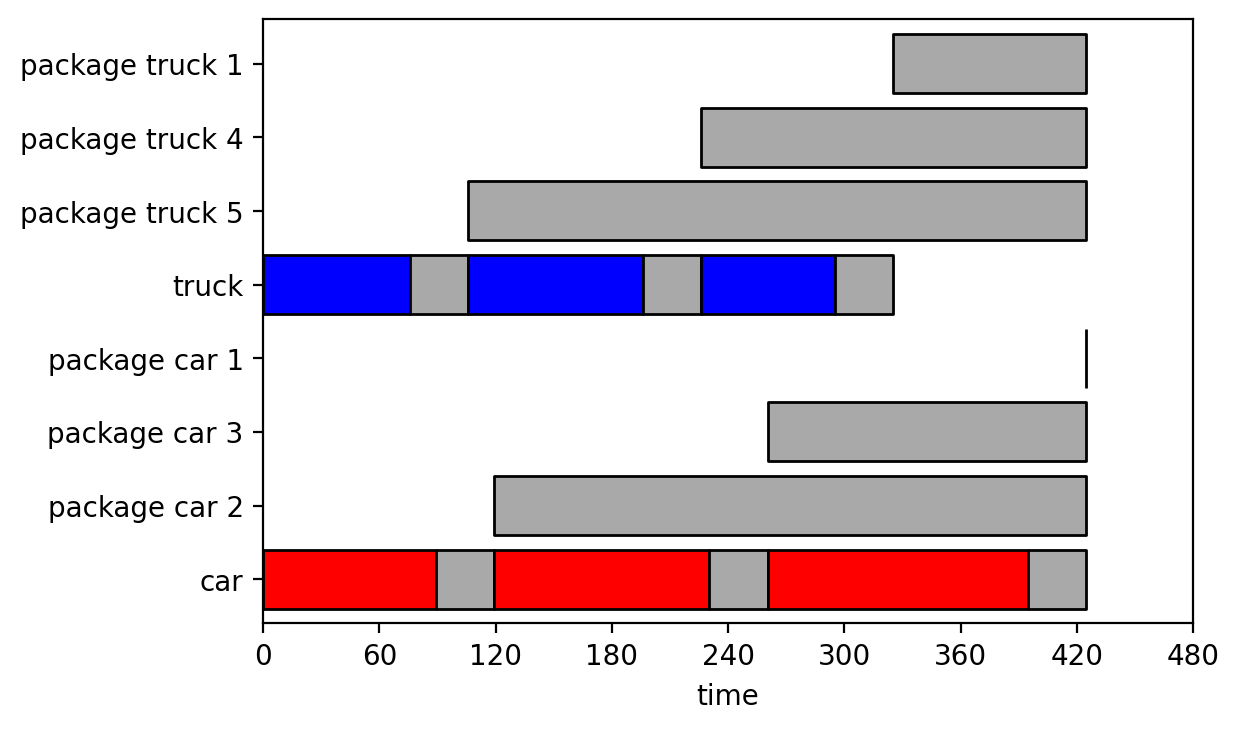

In [18]:
vrv.createGantt(myAssignments)

In [19]:
# If you have saved your Cesium path as an environment variable, you may use `os.environ` to access it:
import os
CESIUM_DIR = os.environ['CESIUMDIR']
# Otherwise, you may specify the patch to Cesium here:
# CESIUM_DIR = '/provide/path/to/Cesium/' 

In [20]:
# Generate a 3D movie of the routes:
vrv.createCesium(assignments = myAssignments, 
                 nodes       = myNodes, 
                 cesiumDir   = CESIUM_DIR, 
                 problemDir  = 'vrv_demo/addAssignment2D_example')

Message: File selector was written to /Users/murray/cesium/vrv_demo/addAssignment2D_example/;vrv_demo;addAssignment2D_example.vrv ...
Message: Configs were written to /Users/murray/cesium/vrv_demo/addAssignment2D_example/config.js ...
Message: Nodes were written to /Users/murray/cesium/vrv_demo/addAssignment2D_example/displayNodes.js ...
Message: Assignments (.js) were written to /Users/murray/cesium/vrv_demo/addAssignment2D_example/displayPaths.js ...
Message: Assignments (.czml) were written to /Users/murray/cesium/vrv_demo/addAssignment2D_example/routes.czml ...


### `addAssignment3D()`
This function appends to an existing `Assignments` dataframe, or creates a new `Assignments` dataframe if `initAssignments` is `None`.  The new rows in this dataframe describe all of the vehicle movements between given starting and ending locations, including timestamps indicating the departure and arrival times for each intermediate point. 
 
- See https://veroviz.org/docs/veroviz.createAssignments.html#veroviz.createAssignments.addAssignment3D for full documentation of this function.

In [21]:
# Import veroviz and check the latest version.
import veroviz as vrv

vrv.checkVersion()

'Your current installed version of veroviz is 0.4.3. You are up-to-date with the latest available version.'

In [22]:
# Define 5 node locations, as [lat, lon] pairs:
locs = [[42.8871085, -78.8731949],
        [42.8888311, -78.8649649],
        [42.8802158, -78.8660787],
        [42.8845705, -78.8762794],
        [42.8908031, -78.8770140]]

In [23]:
# Generate a nodes dataframe from these locations:
myNodes = vrv.createNodesFromLocs(locs=locs)
myNodes

id        lat        lon altMeters nodeName nodeType popupText  \
0  1  42.887108 -78.873195         0     None     None         1   
1  2  42.888831 -78.864965         0     None     None         2   
2  3  42.880216 -78.866079         0     None     None         3   
3  4  42.884571 -78.876279         0     None     None         4   
4  5  42.890803 -78.877014         0     None     None         5   

  leafletIconPrefix leafletIconType leafletColor leafletIconText  \
0         glyphicon       info-sign         blue               1   
1         glyphicon       info-sign         blue               2   
2         glyphicon       info-sign         blue               3   
3         glyphicon       info-sign         blue               4   
4         glyphicon       info-sign         blue               5   

  cesiumIconType cesiumColor cesiumIconText elevMeters  
0            pin        blue              1       None  
1            pin        blue              2       None  
2            pin        blue              3       None  
3            pin        blue              4       None  
4            pin        blue              5       None

In [24]:
# View these nodes on a map:
vrv.createLeaflet(nodes=myNodes)

Example 1 -- Assume a single drone delivers packages from node 1 to all other nodes.

In [25]:
mySolution = {
    'drone': [[1,2,1], [1,3,1], [1,4,1], [1,5,1]]
}

In [26]:
# Define some information about our drone, for later use:
vehicleProperties = {
    'drone': {'modelPackage': 'veroviz/models/drone_package.gltf',
              'modelEmpty': 'veroviz/models/drone.gltf',
              'color': 'red'},
}

In [27]:
# Build the assignments for the drone deliveries:
myAssignments = vrv.initDataframe('assignments')

endTimeSec = 0.0
for arc in mySolution['drone']:
    # Fly from i to j with a package:
    [myAssignments, endTimeSec] = vrv.addAssignment3D(
        initAssignments    = myAssignments,
        objectID           = 'drone',
        modelFile          = vehicleProperties['drone']['modelPackage'],
        startLoc           = list(myNodes[myNodes['id'] == arc[0]][['lat', 'lon']].values[0]),
        endLoc             = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
        startTimeSec       = endTimeSec,
        takeoffSpeedMPS    = vrv.convertSpeed(30, 'miles', 'hr', 'meters', 'sec'),
        cruiseSpeedMPS     = vrv.convertSpeed(80, 'miles', 'hr', 'meters', 'sec'),
        landSpeedMPS       = vrv.convertSpeed( 5, 'miles', 'hr', 'meters', 'sec'),
        cruiseAltMetersAGL = vrv.convertDistance(350, 'feet', 'meters'),
        routeType          = 'square',
        # climbRateMPS       = None,
        # descentRateMPS     = None,
        # earliestLandTime   = -1,
        # loiterPosition     = 'arrivalAtAlt',
        leafletColor       = vehicleProperties['drone']['color'],
        cesiumColor        = vehicleProperties['drone']['color'])

    # Drop off a package
    myAssignments = vrv.addStaticAssignment(
            initAssignments  = myAssignments,
            objectID         = 'package %d' % (arc[1]),
            modelFile        = '/veroviz/models/box_yellow.gltf',
            loc              = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
            startTimeSec     = endTimeSec,
            endTimeSec       = -1)  
        
    # Fly from j to k empty:
    [myAssignments, endTimeSec] = vrv.addAssignment3D(
        initAssignments    = myAssignments,
        objectID           = 'drone',
        modelFile          = vehicleProperties['drone']['modelEmpty'],
        startLoc           = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
        endLoc             = list(myNodes[myNodes['id'] == arc[2]][['lat', 'lon']].values[0]),
        startTimeSec       = endTimeSec,
        takeoffSpeedMPS    = vrv.convertSpeed(30, 'miles', 'hr', 'meters', 'sec'),
        cruiseSpeedMPS     = vrv.convertSpeed(80, 'miles', 'hr', 'meters', 'sec'),
        landSpeedMPS       = vrv.convertSpeed( 5, 'miles', 'hr', 'meters', 'sec'),
        cruiseAltMetersAGL = vrv.convertDistance(350, 'feet', 'meters'),
        routeType          = 'square',
        # climbRateMPS       = None,
        # descentRateMPS     = None,
        # earliestLandTime   = -1,
        # loiterPosition     = 'arrivalAtAlt',
        leafletColor       = vehicleProperties['drone']['color'],
        cesiumColor        = vehicleProperties['drone']['color'])

myAssignments

odID   objectID                           modelFile modelScale  \
0     1      drone  /veroviz/models/drone_package.gltf        100   
1     1      drone  /veroviz/models/drone_package.gltf        100   
2     1      drone  /veroviz/models/drone_package.gltf        100   
3     2  package 2     /veroviz/models/box_yellow.gltf        100   
4     3      drone          /veroviz/models/drone.gltf        100   
5     3      drone          /veroviz/models/drone.gltf        100   
6     3      drone          /veroviz/models/drone.gltf        100   
7     4      drone  /veroviz/models/drone_package.gltf        100   
8     4      drone  /veroviz/models/drone_package.gltf        100   
9     4      drone  /veroviz/models/drone_package.gltf        100   
10    5  package 3     /veroviz/models/box_yellow.gltf        100   
11    6      drone          /veroviz/models/drone.gltf        100   
12    6      drone          /veroviz/models/drone.gltf        100   
13    6      drone          /veroviz/models/drone.gltf        100   
14    7      drone  /veroviz/models/drone_package.gltf        100   
15    7      drone  /veroviz/models/drone_package.gltf        100   
16    7      drone  /veroviz/models/drone_package.gltf        100   
17    8  package 4     /veroviz/models/box_yellow.gltf        100   
18    9      drone          /veroviz/models/drone.gltf        100   
19    9      drone          /veroviz/models/drone.gltf        100   
20    9      drone          /veroviz/models/drone.gltf        100   
21   10      drone  /veroviz/models/drone_package.gltf        100   
22   10      drone  /veroviz/models/drone_package.gltf        100   
23   10      drone  /veroviz/models/drone_package.gltf        100   
24   11  package 5     /veroviz/models/box_yellow.gltf        100   
25   12      drone          /veroviz/models/drone.gltf        100   
26   12      drone          /veroviz/models/drone.gltf        100   
27   12      drone          /veroviz/models/drone.gltf        100   

   modelMinPxSize  startTimeSec   startLat   startLon startAltMeters  \
0              75      0.000000  42.887108 -78.873195              0   
1              75      7.954565  42.887108 -78.873195         106.68   
2              75     27.499981  42.888831 -78.864965         106.68   
3              75     75.227372  42.888831 -78.864965              0   
4              75     75.227372  42.888831 -78.864965              0   
5              75     83.181938  42.888831 -78.864965         106.68   
6              75    102.727353  42.887108 -78.873195         106.68   
7              75    150.454745  42.887108 -78.873195              0   
8              75    158.409310  42.887108 -78.873195         106.68   
9              75    185.291772  42.880216 -78.866079         106.68   
10             75    233.019164  42.880216 -78.866079              0   
11             75    233.019164  42.880216 -78.866079              0   
12             75    240.973729  42.880216 -78.866079         106.68   
13             75    267.856192  42.887108 -78.873195         106.68   
14             75    315.583583  42.887108 -78.873195              0   
15             75    323.538148  42.887108 -78.873195         106.68   
16             75    334.111528  42.884571 -78.876279         106.68   
17             75    381.838919  42.884571 -78.876279              0   
18             75    381.838919  42.884571 -78.876279              0   
19             75    389.793484  42.884571 -78.876279         106.68   
20             75    400.366864  42.887108 -78.873195         106.68   
21             75    448.094255  42.887108 -78.873195              0   
22             75    456.048821  42.887108 -78.873195         106.68   
23             75    470.464313  42.890803 -78.877014         106.68   
24             75    518.191704  42.890803 -78.877014              0   
25             75    518.191704  42.890803 -78.877014              0   
26             75    526.146269  42.890803 -78.877014    

In [28]:
# Show the nodes and assignments on a map:
vrv.createLeaflet(nodes=myNodes, arcs=myAssignments, arcCurveType='bezier', arcCurvature=25)

In [29]:
# If you have saved your Cesium path as an environment variable, you may use `os.environ` to access it:
import os
CESIUM_DIR = os.environ['CESIUMDIR']
# Otherwise, you may specify the patch to Cesium here:
# CESIUM_DIR = '/provide/path/to/Cesium/' 

In [30]:
# Create a 3D movie of the drone deliveries:
vrv.createCesium(assignments = myAssignments, 
                 nodes       = myNodes, 
                 cesiumDir   = CESIUM_DIR, 
                 problemDir  = 'vrv_demo/addAssignment3D_example1')

Message: File selector was written to /Users/murray/cesium/vrv_demo/addAssignment3D_example1/;vrv_demo;addAssignment3D_example1.vrv ...
Message: Configs were written to /Users/murray/cesium/vrv_demo/addAssignment3D_example1/config.js ...
Message: Nodes were written to /Users/murray/cesium/vrv_demo/addAssignment3D_example1/displayNodes.js ...
Message: Assignments (.js) were written to /Users/murray/cesium/vrv_demo/addAssignment3D_example1/displayPaths.js ...
Message: Assignments (.czml) were written to /Users/murray/cesium/vrv_demo/addAssignment3D_example1/routes.czml ...


Example 2 -- Coordinate deliveries with a drone launched from a truck

In [31]:
# Hard-code a solution.
# The truck will visit nodes 1->3->5->1
# The drone will launch from the truck at node 1, deliver to node 2, and return to the truck at node 3.
# The drone will then launch from the truck at 1, deliver to 4 and return to 5.
# The drone cannot land at nodes 3 and 5 until the truck has arrived.
mySolution = {
    'drone': [[1,2,3], [3,4,5]],
    'truck': [[1,3], [3,5], [5,1]]
}

In [32]:
# Define some information about our 2 vehicles, for use below:
vehicleProperties = {
    'drone': {'modelPackage': 'veroviz/models/drone_package.gltf',
              'modelEmpty': 'veroviz/models/drone.gltf',
              'color': 'red'},
    'truck': {'model': 'veroviz/models/ub_truck.gltf',
              'color': 'blue'}
}

In [33]:
# This example assumes the use of ORS as the data provider. 
# If you have saved your API key as an environment variable, you may use `os.environ` to access it:
import os
ORS_API_KEY = os.environ['ORSKEY']
# Otherwise, you may specify your key here:
# ORS_API_KEY = 'YOUR_ORS_KEY_GOES_HERE'

In [34]:
# Obtain the travel times for the truck:
[timeSecTruck, distMetersTruck] = vrv.getTimeDist2D(
    nodes            = myNodes,
    routeType        = 'fastest',
    dataProvider     = 'ORS-online',
    dataProviderArgs = {'APIkey': ORS_API_KEY})

In [35]:
# Obtain the travel times for the drone:
[timeSecDrone, groundDist, TotalDist] = vrv.getTimeDist3D(
    nodes            = myNodes,
    takeoffSpeedMPS    = vrv.convertSpeed(30, 'miles', 'hr', 'meters', 'sec'),
    cruiseSpeedMPS     = vrv.convertSpeed(80, 'miles', 'hr', 'meters', 'sec'),
    landSpeedMPS       = vrv.convertSpeed( 5, 'miles', 'hr', 'meters', 'sec'),
    cruiseAltMetersAGL = vrv.convertDistance(350, 'feet', 'meters'),
    routeType          = 'square')

In [36]:
# Find the coordination times for the truck and drone.
# These will be the earliest times that both the truck and drone can arrive at a node.
maxArrivalTime = {}

# 1) The truck travels from 1 to 3; the drone travels from 1 to 2 to 3:
truckArrivalTime = timeSecTruck[1,3]
droneArrivalTime = timeSecDrone[1,2] + timeSecDrone[2,3]
maxArrivalTime[3] = max(truckArrivalTime, droneArrivalTime)

# 2) The truck travels from 3 to 5; the drone travels from 3 to 4 to 5:
truckArrivalTime = maxArrivalTime[3] + timeSecTruck[3,5]
droneArrivalTime = maxArrivalTime[3] + timeSecDrone[3,4] + timeSecDrone[4,5]
maxArrivalTime[5] = max(truckArrivalTime, droneArrivalTime)

# 3) Let's also capture the time at which the truck will return to node 1:
maxArrivalTime[1] = maxArrivalTime[5] + timeSecTruck[5,1]

# maxArrival Time[1] is now the total time required to complete all of the deliveries
maxArrivalTime

{3: 157.79159312243848, 5: 360.9015931224385, 1: 437.2615931224385}

In [37]:
# Build assignments for the drone deliveries:
myAssignments = vrv.initDataframe('assignments')

endTimeSec = 0.0
for arc in mySolution['drone']:
    # Fly from i to j with a package:
    [myAssignments, endTimeSec] = vrv.addAssignment3D(
        initAssignments    = myAssignments,
        objectID           = 'drone',
        modelFile          = vehicleProperties['drone']['modelPackage'],
        startLoc           = list(myNodes[myNodes['id'] == arc[0]][['lat', 'lon']].values[0]),
        endLoc             = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
        startTimeSec       = endTimeSec,
        takeoffSpeedMPS    = vrv.convertSpeed(30, 'miles', 'hr', 'meters', 'sec'),
        cruiseSpeedMPS     = vrv.convertSpeed(80, 'miles', 'hr', 'meters', 'sec'),
        landSpeedMPS       = vrv.convertSpeed( 5, 'miles', 'hr', 'meters', 'sec'),
        cruiseAltMetersAGL = vrv.convertDistance(350, 'feet', 'meters'),
        routeType          = 'square',
        leafletColor       = vehicleProperties['drone']['color'],
        cesiumColor        = vehicleProperties['drone']['color'])

    # Drop off a package
    myAssignments = vrv.addStaticAssignment(
            initAssignments  = myAssignments,
            objectID         = 'package %d' % (arc[1]),
            modelFile        = '/veroviz/models/box_yellow.gltf',
            loc              = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
            startTimeSec     = endTimeSec,
            endTimeSec       = -1)  
    
    # Fly from j to k empty:
    [myAssignments, endTimeSec] = vrv.addAssignment3D(
        initAssignments    = myAssignments,
        objectID           = 'drone',
        modelFile          = vehicleProperties['drone']['modelEmpty'],
        startLoc           = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
        endLoc             = list(myNodes[myNodes['id'] == arc[2]][['lat', 'lon']].values[0]),
        startTimeSec       = endTimeSec,
        takeoffSpeedMPS    = vrv.convertSpeed(30, 'miles', 'hr', 'meters', 'sec'),
        cruiseSpeedMPS     = vrv.convertSpeed(80, 'miles', 'hr', 'meters', 'sec'),
        landSpeedMPS       = vrv.convertSpeed( 5, 'miles', 'hr', 'meters', 'sec'),
        cruiseAltMetersAGL = vrv.convertDistance(350, 'feet', 'meters'),
        routeType          = 'square',
        earliestLandTime   = maxArrivalTime[arc[2]],
        loiterPosition     = 'arrivalAtAlt',
        leafletColor       = vehicleProperties['drone']['color'],
        cesiumColor        = vehicleProperties['drone']['color'])

myAssignments

odID   objectID                           modelFile modelScale  \
0     1      drone  /veroviz/models/drone_package.gltf        100   
1     1      drone  /veroviz/models/drone_package.gltf        100   
2     1      drone  /veroviz/models/drone_package.gltf        100   
3     2  package 2     /veroviz/models/box_yellow.gltf        100   
4     3      drone          /veroviz/models/drone.gltf        100   
5     3      drone          /veroviz/models/drone.gltf        100   
6     3      drone          /veroviz/models/drone.gltf        100   
7     4      drone  /veroviz/models/drone_package.gltf        100   
8     4      drone  /veroviz/models/drone_package.gltf        100   
9     4      drone  /veroviz/models/drone_package.gltf        100   
10    5  package 4     /veroviz/models/box_yellow.gltf        100   
11    6      drone          /veroviz/models/drone.gltf        100   
12    6      drone          /veroviz/models/drone.gltf        100   
13    6      drone          /veroviz/models/drone.gltf        100   
14    6      drone          /veroviz/models/drone.gltf        100   

   modelMinPxSize  startTimeSec   startLat   startLon startAltMeters  \
0              75      0.000000  42.887108 -78.873195              0   
1              75      7.954565  42.887108 -78.873195         106.68   
2              75     27.499981  42.888831 -78.864965         106.68   
3              75     75.227372  42.888831 -78.864965              0   
4              75     75.227372  42.888831 -78.864965              0   
5              75     83.181938  42.888831 -78.864965         106.68   
6              75    110.064202  42.880216 -78.866079         106.68   
7              75    157.791593  42.880216 -78.866079              0   
8              75    165.746158  42.880216 -78.866079         106.68   
9              75    192.690012  42.884571 -78.876279         106.68   
10             75    240.417403  42.884571 -78.876279              0   
11             75    240.417403  42.884571 -78.876279              0   
12             75    248.371968  42.884571 -78.876279         106.68   
13             75    267.804802  42.890803 -78.877014         106.68   
14             75    313.174202  42.890803 -78.877014         106.68   

   endTimeSec  ...  ganttColor  popupText startElevMeters endElevMeters  \
0     7.95457  ...    darkgray       None            None          None   
1        27.5  ...    darkgray       None            None          None   
2     75.2274  ...    darkgray       None            None          None   
3          -1  ...    darkgray       None            None          None   
4     83.1819  ...    darkgray       None            None          None   
5     110.064  ...    darkgray       None            None          None   
6     157.792  ...    darkgray       None            None          None   
7     165.746  ...    darkgray       None            None          None   
8      192.69  ...    darkgray       None            None          None   
9     240.417  ...    darkgray       None            None          None   
10         -1  ...    darkgray       None            None          None   
11    248.372  ...    darkgray       None            None          None   
12    267.805  ...    darkgray       None            None          None   
13    313.174  ...   lightgray       None            None          None   
14    360.902  ...    darkgray       None            None          None   

   wayname waycategory surface waytype steepness tollway  
0     None        None    None    None      None    None  
1     None        None    None    None      None    None  
2     None        None    None    None      None    None  
3     None        None    None    None      None    None  
4     None        None    None    None      None    None  
5     None        None    None    None      None    None  
6     None        None    None    None      None    None  
7     None        None    None    None      None    None  
8     None   

In [38]:
# Build assignments for the truck route:
endTimeSec = 0.0
for arc in mySolution['truck']:
    [myAssignments, endTimeSec] = vrv.addAssignment2D(
            initAssignments  = myAssignments,
            objectID         = 'truck',
            modelFile        = vehicleProperties['truck']['model'],
            startLoc         = list(myNodes[myNodes['id'] == arc[0]][['lat', 'lon']].values[0]),
            endLoc           = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
            startTimeSec     = endTimeSec,
            leafletColor     = vehicleProperties['truck']['color'],
            cesiumColor      = vehicleProperties['truck']['color'], 
            routeType        = 'fastest',
            dataProvider     = 'ORS-online', 
            dataProviderArgs = {'APIkey': ORS_API_KEY})
    
    # If necessary, wait for the drone to arrive:
    if (endTimeSec < maxArrivalTime[arc[1]]):
        myAssignments = vrv.addStaticAssignment(
            initAssignments  = myAssignments,
            objectID         = 'truck',
            modelFile        = vehicleProperties['truck']['model'],
            loc              = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
            startTimeSec     = endTimeSec,
            endTimeSec       = maxArrivalTime[arc[1]])

        endTimeSec = maxArrivalTime[arc[1]]  

In [39]:
# Show the nodes and assignments on a map:
vrv.createLeaflet(nodes=myNodes, arcs=myAssignments)

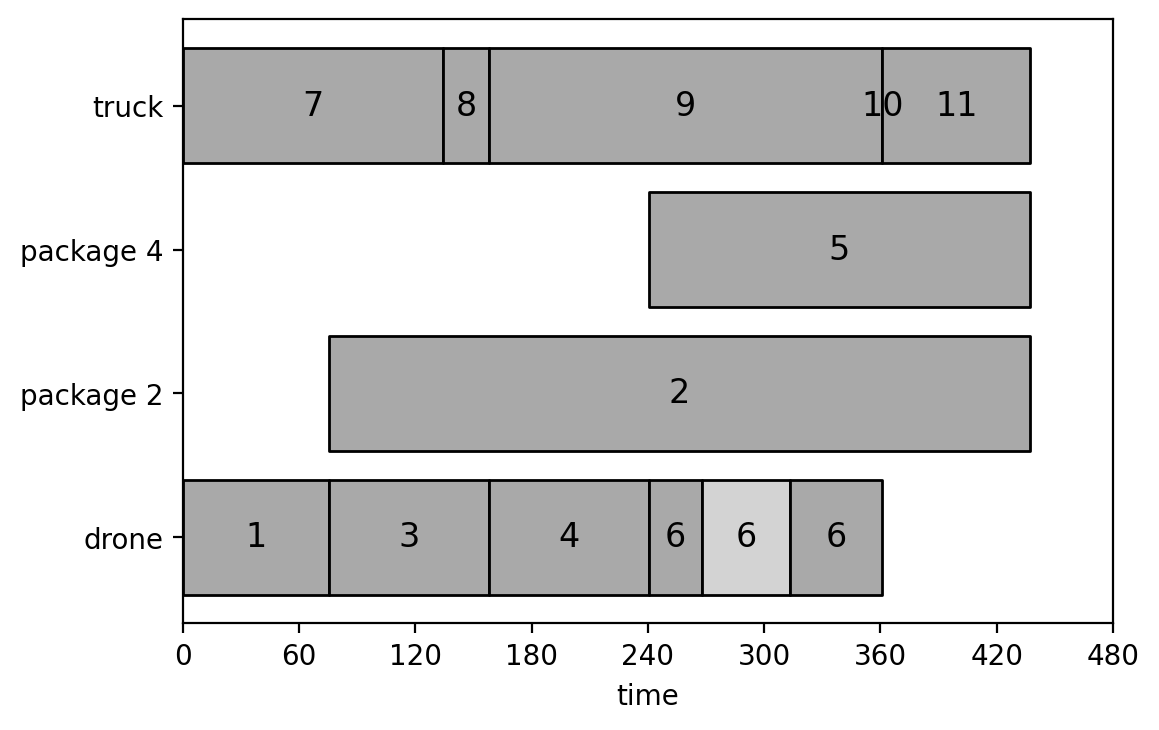

In [40]:
# Create a Gantt chart of the assignments:
vrv.createGantt(assignments=myAssignments, overlayColumn='odID')

In [41]:
# Create a 3D movie of the vehicle routes:
vrv.createCesium(assignments = myAssignments, 
                 nodes       = myNodes, 
                 cesiumDir   = CESIUM_DIR, 
                 problemDir  = 'vrv_demo/addAssignment3D_example2')

Message: File selector was written to /Users/murray/cesium/vrv_demo/addAssignment3D_example2/;vrv_demo;addAssignment3D_example2.vrv ...
Message: Configs were written to /Users/murray/cesium/vrv_demo/addAssignment3D_example2/config.js ...
Message: Nodes were written to /Users/murray/cesium/vrv_demo/addAssignment3D_example2/displayNodes.js ...
Message: Assignments (.js) were written to /Users/murray/cesium/vrv_demo/addAssignment3D_example2/displayPaths.js ...
Message: Assignments (.czml) were written to /Users/murray/cesium/vrv_demo/addAssignment3D_example2/routes.czml ...


### `addStaticAssignment()`
This function adds an "object" to an assignments dataframe.  One use of this function is to add a package or other stationary 3D model to be displayed in Cesium.  This function is also useful for holding a vehicle stationary at a location (e.g., during service or loitering).  

- See https://veroviz.org/docs/veroviz.createAssignments.html#veroviz.createAssignments.addStaticAssignment for full documentation of this function.

In [42]:
# Import veroviz and check the latest version.
>>> import veroviz as vrv
>>> import os

>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.4.3. You are up-to-date with the latest available version.'

Create two nodes.
- See https://veroviz.org/docs/veroviz.generateNodes.html#veroviz.generateNodes.createNodesFromLocs for more info.

In [43]:
>>> myNodes = vrv.createNodesFromLocs(
...     locs = [[42.1538, -78.4253],
...             [42.6343, -78.1146]])
>>> myNodes

id      lat      lon altMeters nodeName nodeType popupText  \
0  1  42.1538 -78.4253         0     None     None         1   
1  2  42.6343 -78.1146         0     None     None         2   

  leafletIconPrefix leafletIconType leafletColor leafletIconText  \
0         glyphicon       info-sign         blue               1   
1         glyphicon       info-sign         blue               2   

  cesiumIconType cesiumColor cesiumIconText elevMeters  
0            pin        blue              1       None  
1            pin        blue              2       None

Move the truck from one node to the other.
- See https://veroviz.org/docs/veroviz.getShapepoints2D.html for more info.    

In [44]:
>>> myAssignments = vrv.getShapepoints2D(
...     odID           = 0,
...     objectID       = 'truck',
...     modelFile      = 'veroviz/models/ub_truck.gltf',
...     modelScale     = 80, 
...     modelMinPxSize = 20, 
...     startLoc       = list(myNodes.loc[0][['lat', 'lon']].values),
...     endLoc         = list(myNodes.loc[1][['lat', 'lon']].values),
...     routeType      = 'euclidean2D',
...     dataProvider   = None,
...     speedMPS       = vrv.convertSpeed(55, 'miles', 'hr', 'm', 's'))

>>> myAssignments

odID objectID                      modelFile modelScale modelMinPxSize  \
0    0    truck  /veroviz/models/ub_truck.gltf         80             20   

   startTimeSec  startLat  startLon startAltMeters   endTimeSec  ...  \
0           0.0   42.1538  -78.4253              0  2407.290832  ...   

   ganttColor  popupText startElevMeters endElevMeters wayname waycategory  \
0    darkgray       None            None          None    None        None   

   surface waytype steepness tollway  
0     None    None      None    None  

[1 rows x 34 columns]

Make the truck wait at the destination.

In [45]:
>>> myAssignments = vrv.addStaticAssignment(
...     initAssignments = myAssignments, 
...     odID            = 0, 
...     objectID        = 'truck', 
...     modelFile       = 'veroviz/models/ub_truck.gltf', 
...     modelScale      = 80, 
...     modelMinPxSize  = 20, 
...     loc             = list(myAssignments[myAssignments['objectID']=='truck'][['endLat', 'endLon']].values[0]), 
...     startTimeSec    = myAssignments[myAssignments['objectID']=='truck']['endTimeSec'].values[0], 
...     endTimeSec      = myAssignments[myAssignments['objectID']=='truck']['endTimeSec'].values[0] + 30)

>>> myAssignments

odID objectID                      modelFile modelScale modelMinPxSize  \
0    0    truck  /veroviz/models/ub_truck.gltf         80             20   
1    1    truck  /veroviz/models/ub_truck.gltf         80             20   

   startTimeSec  startLat  startLon startAltMeters   endTimeSec  ...  \
0      0.000000   42.1538  -78.4253              0  2407.290832  ...   
1   2407.290832   42.6343  -78.1146              0  2437.290832  ...   

   ganttColor  popupText startElevMeters endElevMeters wayname waycategory  \
0    darkgray       None            None          None    None        None   
1    darkgray       None            None          None    None        None   

  surface waytype steepness tollway  
0    None    None      None    None  
1    None    None      None    None  

[2 rows x 34 columns]

Drop off a package.

In [46]:
>>> myAssignments = vrv.addStaticAssignment(
...     initAssignments = myAssignments, 
...     odID            = 0, 
...     objectID        = 'package', 
...     modelFile       = 'veroviz/models/box_blue.gltf', 
...     modelScale      = 50, 
...     modelMinPxSize  = 10, 
...     loc             = list(myAssignments[myAssignments['objectID']=='truck'][['endLat', 'endLon']].values[0]), 
...     startTimeSec    = myAssignments[myAssignments['objectID']=='truck']['endTimeSec'].values[0] + 30, 
...     endTimeSec      = -1)

>>> myAssignments

odID objectID                      modelFile modelScale modelMinPxSize  \
0    0    truck  /veroviz/models/ub_truck.gltf         80             20   
1    1    truck  /veroviz/models/ub_truck.gltf         80             20   
2    2  package  /veroviz/models/box_blue.gltf         50             10   

   startTimeSec  startLat  startLon startAltMeters endTimeSec  ...  \
0      0.000000   42.1538  -78.4253              0    2407.29  ...   
1   2407.290832   42.6343  -78.1146              0    2437.29  ...   
2   2437.290832   42.6343  -78.1146              0         -1  ...   

   ganttColor  popupText startElevMeters endElevMeters wayname waycategory  \
0    darkgray       None            None          None    None        None   
1    darkgray       None            None          None    None        None   
2    darkgray       None            None          None    None        None   

  surface waytype steepness tollway  
0    None    None      None    None  
1    None    None      None    None  
2    None    None      None    None  

[3 rows x 34 columns]

View in Leaflet.  
- Note that we can't see the truck waiting. Also, the package doesn't show up in Leaflet.
- See https://veroviz.org/docs/veroviz.createLeaflet.html for more info.

In [47]:
vrv.createLeaflet(nodes=myNodes, arcs=myAssignments)

Create Cesium output, so we can observe our truck and package.
- See https://veroviz.org/docs/veroviz.createCesium.html for more info.

In [48]:
>>> vrv.createCesium(
...     assignments = myAssignments, 
...     nodes       = myNodes, 
...     startTime   = '08:00:00', 
...     cesiumDir   = os.environ['CESIUMDIR'],
...     problemDir  = 'vrv_demo/static_object_demo')

Message: File selector was written to /Users/murray/cesium/vrv_demo/static_object_demo/;vrv_demo;static_object_demo.vrv ...
Message: Configs were written to /Users/murray/cesium/vrv_demo/static_object_demo/config.js ...
Message: Nodes were written to /Users/murray/cesium/vrv_demo/static_object_demo/displayNodes.js ...
Message: Assignments (.js) were written to /Users/murray/cesium/vrv_demo/static_object_demo/displayPaths.js ...
Message: Assignments (.czml) were written to /Users/murray/cesium/vrv_demo/static_object_demo/routes.czml ...


### `createAssignmentsFromArcs2D()`
This function generates an "assignments" dataframe containing all of the "shapepoints" between successive arcs, including timestamps indicating the departure and arrival times for each shapepoint. Shapepoints are pairs of GPS coordinates that are connected by straight lines.  For a particular origin and destination, numerous individual shapepoints can be combined to define a travel route along a road network. 

- This function is for vehicles traveling on a ground plane (2-dimensional).  For vehicles requiring an altitude component (e.g., drones), a 3D version of this function is provided by `createAssignmentsFromArcs3D()`.
	
- This function creates an assignments dataframe from an arcs dataframe.  Similar functions are available to create an assignments dataframe from a sequence of nodes (`createShapepointsFromNodeSeq2D()`) or from a sequence of locations (`createShapepointsFromLocSeq2D()`).

- See https://veroviz.org/docs/veroviz.createAssignments.html#veroviz.createAssignments.createAssignmentsFromArcs2D for full documentation of this function.

In [49]:
# First import veroviz and check if it is the latest version
import veroviz as vrv
vrv.checkVersion()

'Your current installed version of veroviz is 0.4.3. You are up-to-date with the latest available version.'

In [50]:
# Generate arcs from a given ordered list of coordinates:
arcs = vrv.createArcsFromLocSeq(
    locSeq=[[42.3561, -78.4279, 30],
            [42.3465, -78.4235, 30],
            [42.3431, -78.4186, 40]])
arcs

odID objectID  startLat  startLon   endLat   endLon leafletColor  \
0    1     None   42.3561  -78.4279  42.3465 -78.4235       orange   
1    2     None   42.3465  -78.4235  42.3431 -78.4186       orange   

  leafletWeight leafletStyle  leafletOpacity leafletCurveType  \
0             3        solid             0.8         straight   
1             3        solid             0.8         straight   

  leafletCurvature useArrows cesiumColor cesiumWeight cesiumStyle  \
0                0      True      orange            3       solid   
1                0      True      orange            3       solid   

   cesiumOpacity popupText startElevMeters endElevMeters  
0            0.8      None            None          None  
1            0.8      None            None          None

In [51]:
# Display the arcs on a Leaflet map:
vrv.createLeaflet(arcs=arcs)

In [52]:
# The following examples assume the use of ORS as the data provider. 
# If you have saved your API key as an environment variable, 
# you may use `os.environ` to access it:
import os
ORS_API_KEY = os.environ['ORSKEY']
# Otherwise, you may specify your key here:
# ORS_API_KEY = 'YOUR_ORS_KEY_GOES_HERE'

In [53]:
# Generate an assignments dataframe from the arcs dataframe:
myAssignments = vrv.createAssignmentsFromArcs2D(
    arcs             = arcs, 
    modelFile        = 'veroviz/models/car_blue.gltf', 
    routeType        = 'fastest', 
    dataProvider     = 'ors-online',
    dataProviderArgs = {'APIkey': ORS_API_KEY},
    leafletColor     = 'blue')
myAssignments

odID objectID                      modelFile modelScale modelMinPxSize  \
0     1     None  /veroviz/models/car_blue.gltf        100             75   
1     1     None  /veroviz/models/car_blue.gltf        100             75   
2     1     None  /veroviz/models/car_blue.gltf        100             75   
3     1     None  /veroviz/models/car_blue.gltf        100             75   
4     1     None  /veroviz/models/car_blue.gltf        100             75   
5     1     None  /veroviz/models/car_blue.gltf        100             75   
6     1     None  /veroviz/models/car_blue.gltf        100             75   
7     1     None  /veroviz/models/car_blue.gltf        100             75   
8     1     None  /veroviz/models/car_blue.gltf        100             75   
9     1     None  /veroviz/models/car_blue.gltf        100             75   
10    1     None  /veroviz/models/car_blue.gltf        100             75   
11    1     None  /veroviz/models/car_blue.gltf        100             75   
12    1     None  /veroviz/models/car_blue.gltf        100             75   
13    1     None  /veroviz/models/car_blue.gltf        100             75   
14    1     None  /veroviz/models/car_blue.gltf        100             75   
15    1     None  /veroviz/models/car_blue.gltf        100             75   
16    1     None  /veroviz/models/car_blue.gltf        100             75   
17    1     None  /veroviz/models/car_blue.gltf        100             75   
18    1     None  /veroviz/models/car_blue.gltf        100             75   
19    1     None  /veroviz/models/car_blue.gltf        100             75   
20    1     None  /veroviz/models/car_blue.gltf        100             75   
21    1     None  /veroviz/models/car_blue.gltf        100             75   
22    1     None  /veroviz/models/car_blue.gltf        100             75   
23    1     None  /veroviz/models/car_blue.gltf        100             75   
24    1     None  /veroviz/models/car_blue.gltf        100             75   
25    1     None  /veroviz/models/car_blue.gltf        100             75   
26    1     None  /veroviz/models/car_blue.gltf        100             75   
27    1     None  /veroviz/models/car_blue.gltf        100             75   
28    1     None  /veroviz/models/car_blue.gltf        100             75   
29    1     None  /veroviz/models/car_blue.gltf        100             75   
30    1     None  /veroviz/models/car_blue.gltf        100             75   
31    1     None  /veroviz/models/car_blue.gltf        100             75   
32    1     None  /veroviz/models/car_blue.gltf        100             75   
33    1     None  /veroviz/models/car_blue.gltf        100             75   
34    1     None  /veroviz/models/car_blue.gltf        100             75   
35    1     None  /veroviz/models/car_blue.gltf        100             75   
36    1     None  /veroviz/models/car_blue.gltf        100             75   
37    1     None  /veroviz/models/car_blue.gltf        100             75   
38    1     None  /veroviz/models/car_blue.gltf        100             75   
39    1     None  /veroviz/models/car_blue.gltf        100             75   
40    1     None  /veroviz/models/car_blue.gltf        100             75   
41    2     None  /veroviz/models/car_blue.gltf        100             75   
42    2     None  /veroviz/models/car_blue.gltf        100             75   
43    2     None  /veroviz/models/car_blue.gltf        100             75   
44    2     None  /veroviz/models/car_blue.gltf        100             75   
45    2     None  /veroviz/models/car_blue.gltf        100             75   
46    2     None  /veroviz/models/car_blue.gltf        100             75   
47    2     None  /veroviz/models/car_blue.gltf        100             75   
48    2     None  /veroviz/models/car_blue.gltf        100             75   
49    2     None  /veroviz/models/car_blue.gltf        100             75   
50    2     None  /veroviz/models/car_blue.gltf        100             75   

In [54]:
# Display the assignments on a map:
vrv.createLeaflet(arcs=myAssignments, arrowsPerArc=13)

### `createAssignmentsFromLocSeq2D()`
This function generates an "assignments" dataframe containing all of the "shapepoints" between successive locations, including timestamps indicating the departure and arrival times for each shapepoint. Shapepoints are pairs of GPS coordinates that are connected by straight lines.  For a particular origin and destination, numerous individual shapepoints can be combined to define a travel route along a road network.  

- This function is for vehicles traveling on a ground plane (2-dimensional).  For vehicles requiring an altitude component (e.g., drones), a 3D version of this function is provided by `createAssignmentsFromLocSeq3D()`.
	
- This function creates an assignments dataframe from a sequence of [lat, lon] locations.  Similar functions are available to create an assignments dataframe from an arcs dataframe (`createShapepointsFromArcs2D()`) or from a sequence of nodes (`createShapepointsFromNodeSeq2D()`).

- See https://veroviz.org/docs/veroviz.createAssignments.html#veroviz.createAssignments.createAssignmentsFromLocSeq2D for full documentation of this function.

In [55]:
# Import veroviz and check the latest version.
>>> import veroviz as vrv

>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.4.3. You are up-to-date with the latest available version.'

In [56]:
# The following examples assume the use of ORS as the data provider. If you have saved your API key as an environment variable, you may use `os.environ` to access it:
>>> import os
>>> ORS_API_KEY = os.environ['ORSKEY']
>>> # Otherwise, you may specify your key here:
>>> # ORS_API_KEY = 'YOUR_ORS_KEY_GOES_HERE'

In [57]:
# Specify a sequence of [lat, lon] or [lat, lon, alt] locations. 
>>> locs = [
...     [42.1538, -78.4253, 30], 
...     [42.3465, -78.6234, 30], 
...     [42.6343, -78.1146, 40],
...     [42.1538, -78.4253, 30]] 

Example 1 - A simple example using Euclidean travel, and no service times.  The assignments dataframe will have 3 rows.

In [58]:
>>> assignmentsDF = vrv.createAssignmentsFromLocSeq2D(
...     locSeq         = locs, 
...     serviceTimeSec = 0.0, 
...     objectID       = 'Blue Car', 
...     modelFile      = 'veroviz/models/car_blue.gltf', 
...     routeType      = 'euclidean2D',
...     speedMPS       = 10)
>>> assignmentsDF

odID  objectID                      modelFile modelScale modelMinPxSize  \
0    1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
1    2  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2    3  Blue Car  /veroviz/models/car_blue.gltf        100             75   

   startTimeSec  startLat  startLon startAltMeters    endTimeSec  ...  \
0      0.000000   42.1538  -78.4253             30   2693.379882  ...   
1   2693.379882   42.3465  -78.6234             30   7958.098133  ...   
2   7958.098133   42.6343  -78.1146             40  13876.937537  ...   

   ganttColor  popupText startElevMeters endElevMeters wayname waycategory  \
0    darkgray       None            None          None    None        None   
1    darkgray       None            None          None    None        None   
2    darkgray       None            None          None    None        None   

   surface waytype steepness tollway  
0     None    None      None    None  
1     None    None      None    None  
2     None    None      None    None  

[3 rows x 34 columns]

Example 2 - The vehicle will follow the road network, resulting in an assignments dataframe with significantly more than 3 rows.  The vehicle will remain stationary at the destination locations.  The travel time for each origin/destination pair will be calculated separately.

In [59]:
>>> # Make our car wait for 65 seconds before starting:
>>> assignmentsDF = vrv.addStaticAssignment(
...     odID         = 0, 
...     objectID     = 'Blue Car', 
...     modelFile    = 'veroviz/models/car_blue.gltf', 
...     loc          = locs[0], 
...     startTimeSec = 0.0, 
...     endTimeSec   = 65.0)

In [60]:
>>> # This example includes all of the available input arguments:
>>> newAssignmentsDF = vrv.createAssignmentsFromLocSeq2D(
...     initAssignments  = assignmentsDF, 
...     locSeq           = locs, 
...     serviceTimeSec   = 20.0, 
...     odID             = 1, 
...     objectID         = 'Blue Car', 
...     modelFile        = 'veroviz/models/car_blue.gltf', 
...     modelScale       = 100,
...     modelMinPxSize   = 75,
...     startTimeSec     = 65.0, 
...     expDurationArgs  = {'getTravelTimes': True}, 
...     routeType        = 'fastest',
...     speedMPS         = None,   
...     leafletColor     = 'blue', 
...     leafletWeight    = 3, 
...     leafletStyle     = 'dashed', 
...     leafletOpacity   = 0.8, 
...     useArrows        = True, 
...     cesiumColor      = 'blue', 
...     cesiumWeight     = 3, 
...     cesiumStyle      = 'solid', 
...     cesiumOpacity    = 0.8, 
...     dataProvider     = 'ORS-online',
...     dataProviderArgs = {'APIkey' : ORS_API_KEY})
>>> newAssignmentsDF


Message: The origin point (lat: 42.1538, lon: -78.4253) is 492.9 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.3465, lon: -78.6234) is 254.8 meters away from the road. You might find a gap between destination point and the route.
Message: The origin point (lat: 42.3465, lon: -78.6234) is 254.8 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.6343, lon: -78.1146) is 343.4 meters away from the road. You might find a gap between destination point and the route.
Message: The origin point (lat: 42.6343, lon: -78.1146) is 343.4 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.1538, lon: -78.4253) is 492.9 meters away from the road. You might find a gap between destination point and the route.


odID  objectID                      modelFile modelScale modelMinPxSize  \
0       0  Blue Car  /veroviz/models/car_blue.gltf        100             75   
1       1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2       1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
3       1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
4       1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
...   ...       ...                            ...        ...            ...   
2052    5  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2053    5  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2054    5  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2055    5  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2056    6  Blue Car  /veroviz/models/car_blue.gltf        100             75   

      startTimeSec   startLat   startLon startAltMeters    endTimeSec  ...  \
0         0.000000  42.153800 -78.425300             30     65.000000  ...   
1        65.000000  42.157210 -78.421483              0     79.345193  ...   
2        79.345193  42.158075 -78.422889              0     81.887342  ...   
3        81.887342  42.158237 -78.423128              0     90.133734  ...   
4        90.133734  42.158812 -78.423837              0     98.796544  ...   
...            ...        ...        ...            ...           ...  ...   
2052  14599.079753  42.155856 -78.419619              0  14601.248553  ...   
2053  14601.248553  42.156079 -78.419919              0  14602.802545  ...   
2054  14602.802545  42.156253 -78.420113              0  14609.926203  ...   
2055  14609.926203  42.156979 -78.421107              0  14612.420000  ...   
2056  14612.420000  42.153800 -78.425300             30  14632.420000  ...   

      ganttColor  popupText startElevMeters endElevMeters          wayname  \
0       darkgray       None            None          None             None   
1       darkgray       None           489.2         490.1  Fay Hollow Road   
2       darkgray       None           490.1         490.2  Fay Hollow Road   
3       darkgray       None           490.2         490.9  Fay Hollow Road   
4       darkgray       None           490.9         491.4  Fay Hollow Road   
...          ...        ...             ...           ...              ...   
2052    darkgray       None             481         482.2  Fay Hollow Road   
2053    darkgray       None           482.2           483  Fay Hollow Road   
2054    darkgray       None             483           486  Fay Hollow Road   
2055    darkgray       None             486         486.9  Fay Hollow Road   
2056   lightgray       None            None          None             None   

      waycategory  surface waytype steepness tollway  
0            None     None    None      None    None  
1     No category  Asphalt  Street         1    None  
2     No category  Asphalt  Street         1    None  
3     No category  Asphalt  Street         1    None  
4     No category  Asphalt  Street         1    None  
...           ...      ...     ...       ...     ...  
2052  No category  Asphalt  Street         1    None  
2053  No category  Asphalt  Street         1    None  
2054  No category  Asphalt  Street         1    None  
2055  No category  Asphalt  Street         1    None  
2056         None     None    None      None    None  

[2057 rows x 34 columns]

In [61]:
# Generate a `Nodes` dataframe from our first three locations 
# (the fourth location is a duplicate of the first).  
exampleNodes = vrv.createNodesFromLocs(locs=locs[0:3])

In [62]:
# View the assignments in Leaflet:  
>>> vrv.createLeaflet(arcs=newAssignmentsDF, nodes=exampleNodes)

In [63]:
# View the assignments in Cesium:
>>> vrv.createCesium(
...     assignments = newAssignmentsDF, 
...     nodes       = exampleNodes, 
...     startTime   = '08:00:00', 
...     cesiumDir   = os.environ['CESIUMDIR'],
...     problemDir  = 'vrv_demo/createAssignmentsLocSeq_example')

Message: File selector was written to /Users/murray/cesium/vrv_demo/createAssignmentsLocSeq_example/;vrv_demo;createAssignmentsLocSeq_example.vrv ...
Message: Configs were written to /Users/murray/cesium/vrv_demo/createAssignmentsLocSeq_example/config.js ...
Message: Nodes were written to /Users/murray/cesium/vrv_demo/createAssignmentsLocSeq_example/displayNodes.js ...
Message: Assignments (.js) were written to /Users/murray/cesium/vrv_demo/createAssignmentsLocSeq_example/displayPaths.js ...
Message: Assignments (.czml) were written to /Users/murray/cesium/vrv_demo/createAssignmentsLocSeq_example/routes.czml ...


### `createAssignmentsFromNodeSeq2D()`
This function generates an "assignments" dataframe containing all of the "shapepoints" between successive node locations, including timestamps indicating the departure and arrival times for each shapepoint. Shapepoints are pairs of GPS coordinates that are connected by straight lines.  For a particular origin and destination, numerous individual shapepoints can be combined to define a travel route along a road network. 

- This function is for vehicles traveling on a ground plane (2-dimensional).  For vehicles requiring an altitude component (e.g., drones), a 3D version of this function is provided by `createAssignmentsFromLocSeq3D()`.
	
- This function creates an assignments dataframe from a sequence of nodes.  Similar functions are available to create an assignments dataframe from an arcs dataframe (`createShapepointsFromArcs2D()`) or from a sequence of locations (`createShapepointsFromLocSeq2D()`).

- See https://veroviz.org/docs/veroviz.createAssignments.html#veroviz.createAssignments.createAssignmentsFromNodeSeq2D for full documentation of this function.

In [64]:
# Import veroviz and check the latest version.
>>> import veroviz as vrv

>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.4.3. You are up-to-date with the latest available version.'

In [65]:
# The following examples assume the use of ORS as the data provider. If you have saved your API key as an environment variable, you may use `os.environ` to access it:
>>> import os
>>> ORS_API_KEY = os.environ['ORSKEY']
>>> # Otherwise, you may specify your key here:
>>> # ORS_API_KEY = 'YOUR_ORS_KEY_GOES_HERE'

In [66]:
# Generate a `Nodes` dataframe from a list of coordinates.  
>>> locs = [
...     [42.1538, -78.4253], 
...     [42.3465, -78.6234], 
...     [42.6343, -78.1146]]
>>> exampleNodes = vrv.createNodesFromLocs(locs=locs)

Example 1 - A simple example using Euclidean travel, and no service times.  The assignments dataframe will have 3 rows.

In [67]:
>>> assignmentsDF = vrv.createAssignmentsFromNodeSeq2D(
...     nodeSeq        = [1, 3, 2, 1], 
...     nodes          = exampleNodes, 
...     serviceTimeSec = 0.0, 
...     objectID       = 'Blue Car', 
...     modelFile      = 'veroviz/models/car_blue.gltf', 
...     routeType      = 'euclidean2D',
...     speedMPS       = 10)
>>> assignmentsDF

odID  objectID                      modelFile modelScale modelMinPxSize  \
0    1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
1    2  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2    3  Blue Car  /veroviz/models/car_blue.gltf        100             75   

   startTimeSec  startLat  startLon startAltMeters    endTimeSec  ...  \
0      0.000000   42.1538  -78.4253              0   5918.839403  ...   
1   5918.839403   42.6343  -78.1146              0  11183.557655  ...   
2  11183.557655   42.3465  -78.6234              0  13876.937537  ...   

   ganttColor  popupText startElevMeters endElevMeters wayname waycategory  \
0    darkgray       None            None          None    None        None   
1    darkgray       None            None          None    None        None   
2    darkgray       None            None          None    None        None   

   surface waytype steepness tollway  
0     None    None      None    None  
1     None    None      None    None  
2     None    None      None    None  

[3 rows x 34 columns]

Example 2 - The vehicle will follow the road network, resulting in an assignments dataframe with significantly more than 3 rows.  The vehicle will remain stationary at nodes 3, 2, and 1 (the destination nodes).  The travel time for each origin/destination pair will be calculated separately.

In [68]:
>>> assignmentsDF = vrv.createAssignmentsFromNodeSeq2D(
...     initAssignments  = None, 
...     nodeSeq          = [1, 3, 2, 1], 
...     nodes            = exampleNodes, 
...     serviceTimeSec   = 20.0, 
...     odID             = 1, 
...     objectID         = 'Blue Car', 
...     modelFile        = 'veroviz/models/car_blue.gltf', 
...     expDurationArgs  = {'getTravelTimes': True}, 
...     routeType        = 'fastest',
...     dataProvider     = 'ORS-online',
...     dataProviderArgs = {'APIkey' : ORS_API_KEY})
>>> assignmentsDF


Message: The origin point (lat: 42.1538, lon: -78.4253) is 492.9 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.6343, lon: -78.1146) is 343.4 meters away from the road. You might find a gap between destination point and the route.
Message: The origin point (lat: 42.6343, lon: -78.1146) is 343.4 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.3465, lon: -78.6234) is 254.8 meters away from the road. You might find a gap between destination point and the route.
Message: The origin point (lat: 42.3465, lon: -78.6234) is 254.8 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.1538, lon: -78.4253) is 492.9 meters away from the road. You might find a gap between destination point and the route.


odID  objectID                      modelFile modelScale modelMinPxSize  \
0       1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
1       1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2       1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
3       1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
4       1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
...   ...       ...                            ...        ...            ...   
2057    5  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2058    5  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2059    5  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2060    5  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2061    6  Blue Car  /veroviz/models/car_blue.gltf        100             75   

      startTimeSec   startLat   startLon startAltMeters    endTimeSec  ...  \
0         0.000000  42.157210 -78.421483              0      2.495143  ...   
1         2.495143  42.156979 -78.421107              0      9.622644  ...   
2         9.622644  42.156253 -78.420113              0     11.177476  ...   
3        11.177476  42.156079 -78.419919              0     13.347446  ...   
4        13.347446  42.155856 -78.419619              0     15.278314  ...   
...            ...        ...        ...            ...           ...  ...   
2057  14515.933456  42.159465 -78.424503              0  14524.596266  ...   
2058  14524.596266  42.158812 -78.423837              0  14532.842658  ...   
2059  14532.842658  42.158237 -78.423128              0  14535.384807  ...   
2060  14535.384807  42.158075 -78.422889              0  14549.730000  ...   
2061  14549.730000  42.153800 -78.425300              0  14569.730000  ...   

      ganttColor  popupText startElevMeters endElevMeters          wayname  \
0       darkgray       None           489.2         488.3  Fay Hollow Road   
1       darkgray       None           488.3         487.3  Fay Hollow Road   
2       darkgray       None           487.3         487.1  Fay Hollow Road   
3       darkgray       None           487.1         486.6  Fay Hollow Road   
4       darkgray       None           486.6           486  Fay Hollow Road   
...          ...        ...             ...           ...              ...   
2057    darkgray       None           493.5         492.1  Fay Hollow Road   
2058    darkgray       None           492.1         491.5  Fay Hollow Road   
2059    darkgray       None           491.5         491.4  Fay Hollow Road   
2060    darkgray       None           491.4         490.3  Fay Hollow Road   
2061   lightgray       None            None          None             None   

      waycategory  surface waytype steepness tollway  
0     No category  Asphalt  Street        -1    None  
1     No category  Asphalt  Street        -1    None  
2     No category  Asphalt  Street        -1    None  
3     No category  Asphalt  Street        -1    None  
4     No category  Asphalt  Street        -1    None  
...           ...      ...     ...       ...     ...  
2057  No category  Asphalt  Street        -1    None  
2058  No category  Asphalt  Street        -1    None  
2059  No category  Asphalt  Street        -1    None  
2060  No category  Asphalt  Street        -1    None  
2061         None     None    None      None    None  

[2062 rows x 34 columns]

Example 3 - The vehicle will first wait at the starting location (node 1) for 65 seconds.  It will then visit nodes 3 and 2 before returning to node 1.  At each of those nodes, the vehicle will remain stationary for a 20-second service time.  The travel time between each pair of nodes will be determined by the times in the `timeSec` matrix.

In [69]:
# Generate a matrix of travel times:
>>> [timeSec, distMeters] = vrv.getTimeDist2D(
...     nodes            = exampleNodes,
...     matrixType       = 'all2all',
...     outputDistUnits  = 'meters',
...     outputTimeUnits  = 'seconds',
...     routeType        = 'fastest',
...     speedMPS         = None,   
...     dataProvider     = 'ORS-online',
...     dataProviderArgs = {'APIkey' : ORS_API_KEY})

In [70]:
# Make our car wait for 65 seconds before starting:
>>> assignmentsDF = vrv.addStaticAssignment(
...     odID         = 0, 
...     objectID     = 'Blue Car', 
...     modelFile    = 'veroviz/models/car_blue.gltf', 
...     loc          = [exampleNodes.loc[exampleNodes['id'] == 1]['lat'].values[0],
...                     exampleNodes.loc[exampleNodes['id'] == 1]['lon'].values[0]], 
...     startTimeSec = 0.0, 
...     endTimeSec   = 65.0)

In [71]:
# This example includes all of the available input arguments:
>>> newAssignmentsDF = vrv.createAssignmentsFromNodeSeq2D(
...     initAssignments  = assignmentsDF, 
...     nodeSeq          = [1, 3, 2, 1], 
...     nodes            = exampleNodes, 
...     serviceTimeSec   = 20.0, 
...     odID             = 1, 
...     objectID         = 'Blue Car', 
...     modelFile        = 'veroviz/models/car_blue.gltf', 
...     modelScale       = 100,
...     modelMinPxSize   = 75,
...     startTimeSec     = 65.0, 
...     expDurationArgs  = {'timeSecDict': timeSec}, 
...     routeType        = 'fastest',
...     speedMPS         = None,   
...     leafletColor     = 'blue', 
...     leafletWeight    = 3, 
...     leafletStyle     = 'dashed', 
...     leafletOpacity   = 0.8, 
...     useArrows        = True, 
...     cesiumColor      = 'blue', 
...     cesiumWeight     = 3, 
...     cesiumStyle      = 'solid', 
...     cesiumOpacity    = 0.8, 
...     dataProvider     = 'ORS-online',
...     dataProviderArgs = {'APIkey' : ORS_API_KEY})
>>> newAssignmentsDF


Message: The origin point (lat: 42.1538, lon: -78.4253) is 492.9 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.6343, lon: -78.1146) is 343.4 meters away from the road. You might find a gap between destination point and the route.
Message: The origin point (lat: 42.6343, lon: -78.1146) is 343.4 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.3465, lon: -78.6234) is 254.8 meters away from the road. You might find a gap between destination point and the route.
Message: The origin point (lat: 42.3465, lon: -78.6234) is 254.8 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.1538, lon: -78.4253) is 492.9 meters away from the road. You might find a gap between destination point and the route.


odID  objectID                      modelFile modelScale modelMinPxSize  \
0       0  Blue Car  /veroviz/models/car_blue.gltf        100             75   
1       1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2       1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
3       1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
4       1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
...   ...       ...                            ...        ...            ...   
2058    5  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2059    5  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2060    5  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2061    5  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2062    6  Blue Car  /veroviz/models/car_blue.gltf        100             75   

      startTimeSec   startLat   startLon startAltMeters    endTimeSec  ...  \
0         0.000000  42.153800 -78.425300              0     65.000000  ...   
1        65.000000  42.157210 -78.421483              0     67.495143  ...   
2        67.495143  42.156979 -78.421107              0     74.622644  ...   
3        74.622644  42.156253 -78.420113              0     76.177476  ...   
4        76.177476  42.156079 -78.419919              0     78.347446  ...   
...            ...        ...        ...            ...           ...  ...   
2058  14580.933456  42.159465 -78.424503              0  14589.596266  ...   
2059  14589.596266  42.158812 -78.423837              0  14597.842658  ...   
2060  14597.842658  42.158237 -78.423128              0  14600.384807  ...   
2061  14600.384807  42.158075 -78.422889              0  14614.730000  ...   
2062  14614.730000  42.153800 -78.425300              0  14634.730000  ...   

      ganttColor  popupText startElevMeters endElevMeters          wayname  \
0       darkgray       None            None          None             None   
1       darkgray       None           489.2         488.3  Fay Hollow Road   
2       darkgray       None           488.3         487.3  Fay Hollow Road   
3       darkgray       None           487.3         487.1  Fay Hollow Road   
4       darkgray       None           487.1         486.6  Fay Hollow Road   
...          ...        ...             ...           ...              ...   
2058    darkgray       None           493.5         492.1  Fay Hollow Road   
2059    darkgray       None           492.1         491.5  Fay Hollow Road   
2060    darkgray       None           491.5         491.4  Fay Hollow Road   
2061    darkgray       None           491.4         490.3  Fay Hollow Road   
2062   lightgray       None            None          None             None   

      waycategory  surface waytype steepness tollway  
0            None     None    None      None    None  
1     No category  Asphalt  Street        -1    None  
2     No category  Asphalt  Street        -1    None  
3     No category  Asphalt  Street        -1    None  
4     No category  Asphalt  Street        -1    None  
...           ...      ...     ...       ...     ...  
2058  No category  Asphalt  Street        -1    None  
2059  No category  Asphalt  Street        -1    None  
2060  No category  Asphalt  Street        -1    None  
2061  No category  Asphalt  Street        -1    None  
2062         None     None    None      None    None  

[2063 rows x 34 columns]

In [72]:
# View the assignments in Leaflet:  
>>> vrv.createLeaflet(arcs=newAssignmentsDF, nodes=exampleNodes)

In [73]:
# View the assignments in Cesium:
>>> vrv.createCesium(
...     assignments = newAssignmentsDF, 
...     nodes       = exampleNodes, 
...     startTime   = '08:00:00', 
...     cesiumDir   = os.environ['CESIUMDIR'],
...     problemDir  = 'vrv_demo/createAssignmentsNodeSeq_example')

Message: File selector was written to /Users/murray/cesium/vrv_demo/createAssignmentsNodeSeq_example/;vrv_demo;createAssignmentsNodeSeq_example.vrv ...
Message: Configs were written to /Users/murray/cesium/vrv_demo/createAssignmentsNodeSeq_example/config.js ...
Message: Nodes were written to /Users/murray/cesium/vrv_demo/createAssignmentsNodeSeq_example/displayNodes.js ...
Message: Assignments (.js) were written to /Users/murray/cesium/vrv_demo/createAssignmentsNodeSeq_example/displayPaths.js ...
Message: Assignments (.czml) were written to /Users/murray/cesium/vrv_demo/createAssignmentsNodeSeq_example/routes.czml ...


--- 

## createCesium Module

This module includes the following function:
- `createCesium()`

### `createCesium()`

This function generates several files required to view a solution in Cesium. The function requires assignments and/or nodes dataframes as input.

- See https://veroviz.org/docs/veroviz.createCesium.html#module-veroviz.createCesium for complete function documentation.
- See https://veroviz.org/downloads/cesium_demo.ipynb.zip for a downloadable example.

In [74]:
# Import veroviz and check the latest version.
>>> import veroviz as vrv
>>> import os

>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.4.3. You are up-to-date with the latest available version.'

In [75]:
# Create two nodes.
>>> myNodes = vrv.createNodesFromLocs(
...     locs = [[42.1538, -78.4253],
...             [42.6343, -78.1146]])
>>> myNodes

id      lat      lon altMeters nodeName nodeType popupText  \
0  1  42.1538 -78.4253         0     None     None         1   
1  2  42.6343 -78.1146         0     None     None         2   

  leafletIconPrefix leafletIconType leafletColor leafletIconText  \
0         glyphicon       info-sign         blue               1   
1         glyphicon       info-sign         blue               2   

  cesiumIconType cesiumColor cesiumIconText elevMeters  
0            pin        blue              1       None  
1            pin        blue              2       None

In [76]:
# Move the truck from one node to the other.
>>> myAssignments = vrv.getShapepoints2D(
...     odID           = 0,
...     objectID       = 'truck',
...     modelFile      = 'veroviz/models/ub_truck.gltf',
...     modelScale     = 80, 
...     modelMinPxSize = 20, 
...     startLoc       = list(myNodes.loc[0][['lat', 'lon']].values),
...     endLoc         = list(myNodes.loc[1][['lat', 'lon']].values),
...     routeType      = 'euclidean2D',
...     dataProvider   = None,
...     speedMPS       = vrv.convertSpeed(55, 'miles', 'hr', 'm', 's'))

In [77]:
# Create Cesium output.
>>> vrv.createCesium(
...     assignments = myAssignments, 
...     nodes       = myNodes, 
...     startTime   = '08:00:00', 
...     cesiumDir   = os.environ['CESIUMDIR'],
...     problemDir  = 'vrv_demo/createCesium_example')

Message: File selector was written to /Users/murray/cesium/vrv_demo/createCesium_example/;vrv_demo;createCesium_example.vrv ...
Message: Configs were written to /Users/murray/cesium/vrv_demo/createCesium_example/config.js ...
Message: Nodes were written to /Users/murray/cesium/vrv_demo/createCesium_example/displayNodes.js ...
Message: Assignments (.js) were written to /Users/murray/cesium/vrv_demo/createCesium_example/displayPaths.js ...
Message: Assignments (.czml) were written to /Users/murray/cesium/vrv_demo/createCesium_example/routes.czml ...


--- 

## createLeaflet Module

This module includes the following functions:
- `addLeafletCircle()`
- `addLeafletIcon()` (new in v0.4.0)
- `addLeafletIsochrones()` (new in v0.4.0)
- `addLeafletMarker()`
- `addLeafletPolygon()`
- `addLeafletPolyline()`
- `addLeafletText()`
- `addLeafletWeather()` (new in v0.4.0)
- `createLeaflet()`



### `addLeafletCircle()`
Add a circle, with a radius specified in [meters], to a Leaflet map.

- See https://veroviz.org/docs/veroviz.createLeaflet.html#veroviz.createLeaflet.addLeafletCircle for complete function documentation.

In [78]:
>>> # Draw a circle of radius 10 meters, centered on the Univ. at Buffalo campus.
>>> # Save this as "a_circle.html".
>>> import veroviz as vrv
>>> myMap = vrv.addLeafletCircle(
...     zoomStart=18,
...     center=[43.00154, -78.7871],
...     radius=100,
...     mapFilename="a_circle.html")
>>> myMap

Message: Map page written to a_circle.html.


In [79]:
>>> # Draw a circle of radius 2000 meters, centered on the Univ. at Buffalo campus.
>>> # This example includes all of the available function arguments.
>>> import veroviz as vrv
>>> myMap = vrv.addLeafletCircle(
...     mapObject     = None,
...     mapFilename   = None,
...     mapBackground = 'OpenStreetMap',
...     mapBoundary   = None,
...     zoomStart     = 13,
...     center        = [43.00154, -78.7871],
...     radius        = 2000,
...     text          = 'UB',
...     fontSize      = 24,
...     fontColor     = 'white',
...     popupText     = 'click circle to see this text',
...     lineWeight    = 6,
...     lineColor     = '#ff66ff',
...     lineOpacity   = 0.7,
...     lineStyle     = 'dotted',
...     fillColor     = 'green',
...     fillOpacity   = 0.4)
>>> myMap

### `addLeafletIcon()`
Add a single icon/pin to a Leaflet map.

In [80]:
# Define a location:
whiteHouse = [38.8977, -77.0365]

In [81]:
# A minimal example, using mostly default parameters:
vrv.addLeafletIcon(location      = whiteHouse)

In [82]:
# Example showing all function parameters:
vrv.addLeafletIcon(mapObject     = None, 
                   mapFilename   = None, 
                   mapBackground = 'arcgis aerial', 
                   mapBoundary   = None, 
                   zoomStart     = None, 
                   location      = whiteHouse, 
                   iconPrefix    = 'custom', 
                   iconType      = '18-yellow-12', 
                   iconColor     = 'purple', 
                   iconText      = 'WH', 
                   popupText     = '<nobr>click icon to see this single-line text</nobr>')

###  `addLeafletIsochrones()`
Easily draw isochrones on a Leaflet map.  Be sure to run the `isochrones()` function first.

In [83]:
# Get isochrone data:
iso = vrv.isochrones(location         = [43.00154, -78.7871], 
                     locationType     = 'start', 
                     travelMode       = 'driving-car', 
                     rangeType        = 'time', 
                     rangeSize        = vrv.convertTime(5, 'minutes', 'seconds'), 
                     interval         = vrv.convertTime(2.5, 'minutes', 'seconds'), 
                     smoothing        = 5, 
                     dataProvider     ='ors-online', 
                     dataProviderArgs = {'APIkey': ORS_API_KEY})

In [84]:
# A minimal working example, using mostly default values:
vrv.addLeafletIsochrones(iso = iso)

In [85]:
# An example using all of the functional parameters:
vrv.addLeafletIsochrones(mapObject          = None, 
                         mapFilename        = None, 
                         mapBackground      = 'cartodb dark_matter', 
                         mapBoundary        = None, 
                         zoomStart          = None, 
                         iso                = iso, 
                         showBoundingRegion = True, 
                         iconPrefix         = 'custom', 
                         iconType           = '12-white-12', 
                         iconColor          = 'red', 
                         iconText           = '1', 
                         popupText          = None, 
                         lineWeight         = 3, 
                         lineOpacity        = 0.8, 
                         lineStyle          = 'solid', 
                         fillOpacity        = 0.3)

### `addLeafletMarker()`
Add a circle-shaped marker, with a radius specified in [pixels], to a Leaflet map.

- See https://veroviz.org/docs/veroviz.createLeaflet.html#veroviz.createLeaflet.addLeafletMarker for complete function documentation.

In [86]:
>>> # Draw a circle of radius 10 pixels, centered on the Univ. at Buffalo campus.
>>> # Save this as "a_marker.html".
>>> import veroviz as vrv
>>> myMap = vrv.addLeafletMarker(
...     center=[43.00154, -78.7871],
...     radius=10,
...     mapFilename="a_marker.html")
>>> myMap

Message: Map page written to a_marker.html.


In [87]:
>>> # Draw a circle of radius 30 pixels, centered on the Univ. at Buffalo campus.
>>> # This example includes all of the available function arguments.
>>> import veroviz as vrv
>>> myMap = vrv.addLeafletMarker(
...     mapObject     = None, 
...     mapFilename   = None, 
...     mapBackground = 'CartoDB positron', 
...     mapBoundary   = None, 
...     zoomStart     = 11, 
...     center        = [43.00154, -78.7871],
...     radius        = 30, 
...     text          = 'UB',
...     fontSize      = 24,
...     fontColor     = 'white',
...     popupText     = 'click marker to see this text',
...     lineWeight    = 3, 
...     lineColor     = 'orange', 
...     lineOpacity   = 0.6, 
...     lineStyle     = 'dashed',
...     fillColor     = 'blue', 
...     fillOpacity   = 0.3)
>>> myMap

### `addLeafletPolygon()`
Add a polygon, as defined by an ordered collection of lat/lon coordinates, to a Leaflet map.

- See https://veroviz.org/docs/veroviz.createLeaflet.html#veroviz.createLeaflet.addLeafletPolygon for complete function documentation.

In [88]:
>>> # Draw a polygon around the Univ. at Buffalo campus.
>>> # Save this as "a_polygon.html".
>>> import veroviz as vrv
>>> campusPoints = [[43.0121, -78.7858],
...                 [43.0024, -78.7977],
...                 [42.9967, -78.7921],
...                 [42.9988, -78.7790]]
>>> myMap = vrv.addLeafletPolygon(
...     points=campusPoints,
...     mapFilename="a_polygon.html")
>>> myMap

Message: Map page written to a_polygon.html.


In [89]:
>>> # Draw a filled polygon around the Univ. at Buffalo campus.
>>> # This example includes all of the available function arguments.
>>> import veroviz as vrv
>>> campusPoints = [[43.0121, -78.7858],
...                 [43.0024, -78.7977],
...                 [42.9967, -78.7921],
...                 [42.9988, -78.7790]]
>>> myMap = vrv.addLeafletPolygon(
...     mapObject     = None, 
...     mapFilename   = None, 
...     mapBackground = 'OpenStreetMap', 
...     mapBoundary   = vrv.getMapBoundary(locs=campusPoints), 
...     zoomStart     = None, 
...     points        = campusPoints, 
...     popupText     = 'click polygon to see this',   
...     lineWeight    = 7, 
...     lineColor     = '#ff00ff', 
...     lineOpacity   = 0.9, 
...     lineStyle     = 'solid', 
...     fillColor     = '#ff66ff', 
...     fillOpacity   = 0.3)    
>>> myMap

### `addLeafletPolyline()`
Add a polyline, as described by an ordered collection of lat/lon coordinates, to a Leaflet map.  The polyline is an "open" shape, in the sense that there's nothing connecting the first and last locations.  By contrast, the "polygon" shape will automatically connect the first and last locations.

- See https://veroviz.org/docs/veroviz.createLeaflet.html#veroviz.createLeaflet.addLeafletPolyline for complete function documentation.

In [90]:
>>> # Draw a polyline around the northern portion of the Univ. at Buffalo campus.
>>> # Save this as "a_polyline.html".
>>> import veroviz as vrv
>>> campusPoints = [[43.0024, -78.7977],
...                 [43.0121, -78.7858],
...                 [42.9988, -78.7790]]
>>> myMap = vrv.addLeafletPolyline(
...     points=campusPoints,
...     mapFilename="a_polyline.html")
>>> myMap

Message: Map page written to a_polyline.html.


In [91]:
>>> # Draw a polyline around the northern portion of the Univ. at Buffalo campus.
>>> # This example includes all of the available function arguments.
>>> import veroviz as vrv
>>> campusPoints = [[43.0024, -78.7977],
...                 [43.0121, -78.7858],
...                 [42.9988, -78.7790]]
>>> myMap = vrv.addLeafletPolyline(
...     mapObject = None, 
...     mapFilename = None, 
...     mapBackground = 'CartoDB positron', 
...     mapBoundary = vrv.getMapBoundary(locs=campusPoints),
...     zoomStart = None, 
...     points = campusPoints,
...     popupText = 'Univ. at Buffalo',
...     lineWeight = 3, 
...     lineColor = '#0055ff', 
...     lineOpacity = 0.8, 
...     lineStyle = 'solid', 
...     lineCurveType = 'bezier',
...     lineCurvature = 30,
...     useArrows = True,
...     arrowsPerArc = 1)
>>> myMap

### `addLeafletText()`
Add a text label to a Leaflet map. 

- See https://veroviz.org/docs/veroviz.createLeaflet.html#veroviz.createLeaflet.addLeafletText for complete function documentation.

In [92]:
>>> # Draw a text label at the location of Bell Hall on the
>>> # Univ. at Buffalo campus.
>>> # Save this as "a_text_label.html".
>>> import veroviz as vrv
>>> myMap = vrv.addLeafletText(
...     anchorPoint=[43.00154, -78.7871],
...     text="Bell Hall",
...     mapFilename="a_text_label.html")
>>> myMap

Message: Map page written to a_text_label.html.


In [93]:
>>> # Draw a text label at the location of Bell Hall on the
>>> # Univ. at Buffalo campus.
>>> # This example includes all of the available function arguments.
>>> import veroviz as vrv
>>> myMap = vrv.addLeafletText(
...     mapObject     = None, 
...     mapFilename   = None, 
...     mapBackground = 'CartoDB positron', 
...     mapBoundary   = None, 
...     zoomStart     = 10, 
...     anchorPoint   = [43.00154, -78.7871],
...     text          = "Bell Hall",
...     fontSize      = 34, 
...     fontColor     = 'black', 
...     horizAlign    = 'left')
>>> myMap

###  `addLeafletWeather()`
Adds map tiles showing weather conditions to a Leaflet map.  Weather tiles are obtained via openweathermap.org (an API key is required).

In [94]:
import os
OPENWEATHER_KEY = os.environ['OPENWEATHERKEY']

In [95]:
# Display a map showing wind conditions.  This example includes all available function arguments.
vrv.addLeafletWeather(mapObject     = None,                          
                      mapType       = 'wind', 
                      APIkey        = OPENWEATHER_KEY, 
                      mapFilename   = None, 
                      mapBackground = 'cartodb dark_matter')

### `createLeaflet()`
This function is used to generate Leaflet objects using folium. The function takes a boundingRegion polygon, `Nodes`, `Arcs`, and `Assignments` dataframes as inputs, and creates a folium/leaflet map showing boundings, nodes and/or arcs.

- See https://veroviz.org/docs/veroviz.createLeaflet.html#veroviz.createLeaflet.createLeaflet for complete function documentation.

In [96]:
# First, import veroviz and check the latest version
>>> import veroviz as vrv
>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.4.3. You are up-to-date with the latest available version.'

In [97]:
# Now, generate some example nodes inside a bounding region
>>> bounding = [
...     [42.98355351219673, -78.90518188476564],
...     [43.04731443361136, -78.83857727050783],
...     [43.02221961002041, -78.7108612060547],
...     [42.92777124914475, -78.68957519531251],
...     [42.866402688514626, -78.75343322753908],
...     [42.874957707517865, -78.82415771484375],
...     [42.90111863978987, -78.86878967285158],
...     [42.92224052343343, -78.8921356201172]]

>>> exampleNodes = vrv.generateNodes(
...     nodeType         = 'customer', 
...     nodeDistrib      = 'normalBB', 
...     nodeDistribArgs  = {
...         'center' : [42.90, -78.80], 
...         'stdDev' : 10000,
...         'boundingRegion' : bounding
...     },
...     numNodes         = 3,
...     leafletColor = 'orange')

>>> exampleNodes

id        lat        lon  altMeters nodeName  nodeType popupText  \
0  1  43.016251 -78.777937        0.0     None  customer         1   
1  2  42.928089 -78.793058        0.0     None  customer         2   
2  3  42.961736 -78.889429        0.0     None  customer         3   

  leafletIconPrefix leafletIconType leafletColor leafletIconText  \
0         glyphicon       info-sign       orange               1   
1         glyphicon       info-sign       orange               2   
2         glyphicon       info-sign       orange               3   

  cesiumIconType cesiumColor cesiumIconText elevMeters  
0            pin        blue              1       None  
1            pin        blue              2       None  
2            pin        blue              3       None

The first example is using all default values for creating a Leaflet map of the nodes in the `exampleNodes` dataframe.

In [98]:
>>> vrv.createLeaflet(nodes=exampleNodes)

In [99]:
# Define some arcs based on the nodes we just generated:
>>> exampleArcs = vrv.createArcsFromNodeSeq(
...     nodes=exampleNodes,
...     nodeSeq=[1, 2, 3])
>>> exampleArcs

odID objectID   startLat   startLon     endLat     endLon leafletColor  \
0    1     None  43.016251 -78.777937  42.928089 -78.793058       orange   
1    2     None  42.928089 -78.793058  42.961736 -78.889429       orange   

  leafletWeight leafletStyle  leafletOpacity leafletCurveType  \
0             3        solid             0.8         straight   
1             3        solid             0.8         straight   

  leafletCurvature useArrows cesiumColor cesiumWeight cesiumStyle  \
0                0      True      orange            3       solid   
1                0      True      orange            3       solid   

   cesiumOpacity popupText startElevMeters endElevMeters  
0            0.8      None            None          None  
1            0.8      None            None          None

In [100]:
# Display the nodes, arcs, and bounding region simultaneously:
>>> vrv.createLeaflet(
...     nodes          = exampleNodes,
...     arcs           = exampleArcs,
...     boundingRegion = bounding)

In [101]:
# The createLeaflet function provides options to override styles
# that were defined in the input nodes and/or arcs dataframes.
# Note:  These overrides will not change the contents in the dataframes.
nodesAndArcsMap = vrv.createLeaflet(nodes      = exampleNodes,
                                    iconPrefix = 'fa',
                                    iconType   = 'car',
                                    iconColor  = 'blue',
                                    arcs       = exampleArcs,
                                    arcStyle   = 'dotted')
nodesAndArcsMap

In [102]:
# If you already have a folium map object, you can add more into it.
# Here, we add a bounding region to the `nodesAndArcsMap` object defined above.
nodesAndArcsMap = vrv.createLeaflet(mapObject      = nodesAndArcsMap,
                                    boundingRegion = bounding)
nodesAndArcsMap

In [103]:
# A new collection of nodes is defined here:
>>> newNodes = vrv.generateNodes(
...     nodeType        = 'customer', 
...     nodeDistrib     = 'uniformBB', 
...     nodeDistribArgs = {
...         'boundingRegion' : bounding
...     },
...     numNodes        = 4,
...     leafletColor    = 'red')
>>> newNodes

id        lat        lon altMeters nodeName  nodeType popupText  \
0  1  42.961695 -78.750078         0     None  customer         1   
1  2  42.902002 -78.772933         0     None  customer         2   
2  3  42.998705 -78.856009         0     None  customer         3   
3  4  42.967480 -78.753241         0     None  customer         4   

  leafletIconPrefix leafletIconType leafletColor leafletIconText  \
0         glyphicon       info-sign          red               1   
1         glyphicon       info-sign          red               2   
2         glyphicon       info-sign          red               3   
3         glyphicon       info-sign          red               4   

  cesiumIconType cesiumColor cesiumIconText elevMeters  
0            pin        blue              1       None  
1            pin        blue              2       None  
2            pin        blue              3       None  
3            pin        blue              4       None

In [104]:
# We will add these nodes to our existing map,
# but we're overriding these new nodes with a green color.
# Notice that the addition of new entities will not change 
# the style of previous entities that were already added into the map.
newMapWithArcsAndMoreNodes = vrv.createLeaflet(
     mapObject = nodesAndArcsMap,
     nodes     = newNodes,
     iconColor = 'green')
newMapWithArcsAndMoreNodes

### All functional arguments

In [105]:
>>> # This example includes all of the available function arguments.
>>> import veroviz as vrv
>>> vrv.createLeaflet(
...     mapObject       = None, 
...     mapFilename     = 'example.html', 
...     mapBackground   = 'CartoDB positron', 
...     mapBoundary     = None, 
...     zoomStart       = 10, 
...     nodes           = exampleNodes, 
...     iconPrefix      = 'fa', 
...     iconType        = 'flag', 
...     iconColor       = 'red', 
...     iconText        = 'Here are some nodes', 
...     arcs            = exampleArcs, 
...     arcWeight       = 5, 
...     arcStyle        = 'dashed', 
...     arcOpacity      = 1, 
...     arcColor        = 'green', 
...     useArrows       = True, 
...     boundingRegion  = bounding, 
...     boundingWeight  = 1, 
...     boundingOpacity = 0.8, 
...     boundingStyle   = 'dotted', 
...     boundingColor   = 'black')

Message: Map page written to example.html.


## generateArcs Module

This module includes the following functions:
- `createArcsFromLocSeq()`
- `createArcsFromNodeSeq()`

### `createArcsFromLocSeq()`
Create an "arcs" dataframe from an ordered list of coordinates.

- See https://veroviz.org/docs/veroviz.generateArcs.html#veroviz.generateArcs.createArcsFromLocSeq for complete function documentation.

In [106]:
# Generate arcs from a given ordered list of coordinates:
>>> import veroviz as vrv
>>> vrv.checkVersion()

>>> arcs = vrv.createArcsFromLocSeq(
...     locSeq=[
...         [42.1325, -78.2134],
...         [42.5341, -78.3252],
...         [42.3424, -78.6424]
...     ])

>>> arcs

odID objectID  startLat  startLon   endLat   endLon leafletColor  \
0    1     None   42.1325  -78.2134  42.5341 -78.3252       orange   
1    2     None   42.5341  -78.3252  42.3424 -78.6424       orange   

  leafletWeight leafletStyle  leafletOpacity leafletCurveType  \
0             3        solid             0.8         straight   
1             3        solid             0.8         straight   

  leafletCurvature useArrows cesiumColor cesiumWeight cesiumStyle  \
0                0      True      orange            3       solid   
1                0      True      orange            3       solid   

   cesiumOpacity popupText startElevMeters endElevMeters  
0            0.8      None            None          None  
1            0.8      None            None          None

In [107]:
# Display the arcs on a Leaflet map:
>>> vrv.createLeaflet(arcs=arcs)

In [108]:
>>> # This example includes all of the available function arguments.
>>> arcs = vrv.createArcsFromLocSeq(
...     locSeq         = [[42.1325, -78.2134],
...                       [42.5341, -78.3252],
...                       [42.3424, -78.6424]],
...     initArcs       = None, 
...     startArc       = 1, 
...     objectID       = 'car', 
...     leafletColor   = 'orange', 
...     leafletWeight  = 5, 
...     leafletStyle   = 'dashed', 
...     leafletOpacity = 0.6, 
...     useArrows      = False, 
...     cesiumColor    = 'orange', 
...     cesiumWeight   = 5, 
...     cesiumStyle    = 'dashed', 
...     cesiumOpacity  = 0.6)
>>> vrv.createLeaflet(arcs=arcs)

### `createArcsFromNodeSeq()`
Create an "arcs" dataframe from an ordered list of node IDs.  The "nodes" dataframe from which these node IDs are drawn must also be specified.

- See https://veroviz.org/docs/veroviz.generateArcs.html#veroviz.generateArcs.createArcsFromNodeSeq for complete function documentation.

In [109]:
# Import veroviz and check if it is the latest version
>>> import veroviz as vrv
>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.4.3. You are up-to-date with the latest available version.'

In [110]:
# Create a collection of 20 nodes:
>>> myNodes = vrv.generateNodes(
...     numNodes        = 20,
...     nodeType        = 'depot', 
...     nodeDistrib     = 'normal', 
...     nodeDistribArgs = {
...         'center' : [42.30, 78.00], 
...         'stdDev' : 1000
...     })
>>> myNodes

id        lat        lon  altMeters nodeName nodeType popupText  \
0    1  42.299929  77.997360        0.0     None    depot         1   
1    2  42.295332  77.990600        0.0     None    depot         2   
2    3  42.292302  78.004244        0.0     None    depot         3   
3    4  42.300362  77.996723        0.0     None    depot         4   
4    5  42.304222  78.001339        0.0     None    depot         5   
5    6  42.297138  77.998654        0.0     None    depot         6   
6    7  42.307479  77.998087        0.0     None    depot         7   
7    8  42.299470  78.000579        0.0     None    depot         8   
8    9  42.300024  77.999787        0.0     None    depot         9   
9   10  42.299387  77.989526        0.0     None    depot        10   
10  11  42.296535  78.007230        0.0     None    depot        11   
11  12  42.300222  78.000032        0.0     None    depot        12   
12  13  42.304477  78.001050        0.0     None    depot        13   
13  14  42.295969  77.998819        0.0     None    depot        14   
14  15  42.303709  77.997204        0.0     None    depot        15   
15  16  42.299522  77.990898        0.0     None    depot        16   
16  17  42.300390  77.988081        0.0     None    depot        17   
17  18  42.304200  77.999010        0.0     None    depot        18   
18  19  42.296454  78.014721        0.0     None    depot        19   
19  20  42.305880  77.986744        0.0     None    depot        20   

   leafletIconPrefix leafletIconType leafletColor leafletIconText  \
0          glyphicon       info-sign         blue               1   
1          glyphicon       info-sign         blue               2   
2          glyphicon       info-sign         blue               3   
3          glyphicon       info-sign         blue               4   
4          glyphicon       info-sign         blue               5   
5          glyphicon       info-sign         blue               6   
6          glyphicon       info-sign         blue               7   
7          glyphicon       info-sign         blue               8   
8          glyphicon       info-sign         blue               9   
9          glyphicon       info-sign         blue              10   
10         glyphicon       info-sign         blue              11   
11         glyphicon       info-sign         blue              12   
12         glyphicon       info-sign         blue              13   
13         glyphicon       info-sign         blue              14   
14         glyphicon       info-sign         blue              15   
15         glyphicon       info-sign         blue              16   
16         glyphicon       info-sign         blue              17   
17         glyphicon       info-sign         blue              18   
18         glyphicon       info-sign         blue              19   
19         glyphicon       info-sign         blue              20   

   cesiumIconType cesiumColor cesiumIconText elevMeters  
0             pin        blue              1       None  
1             pin        blue              2       None  
2             pin        blue              3       None  
3             pin        blue              4       None  
4             pin        blue              5       None  
5             pin        blue              6       None  
6             pin        blue              7       None  
7             pin        blue              8       None  
8             pin        blue              9       None  
9             pin        blue             10       None  
10            pin        blue             11       None  
11            pin        blue             12       None  
12            pin        blue             13       None  
13            pin        blue             14       None  
14            pin        blue             15       None  
15            pin        blue             16       None  
16            pin        blue             17       None  
17            pin 

In [111]:
# Generate arcs from nodes 2-to-15 and from 15-to-8.  
# These node IDs are found in the `id` column of the given Nodes dataframe.
myArcs = vrv.createArcsFromNodeSeq(
            nodeSeq = [2, 15, 8],
            nodes   = myNodes)
myArcs

odID objectID   startLat   startLon     endLat     endLon leafletColor  \
0    1     None  42.295332  77.990600  42.303709  77.997204       orange   
1    2     None  42.303709  77.997204  42.299470  78.000579       orange   

  leafletWeight leafletStyle  leafletOpacity leafletCurveType  \
0             3        solid             0.8         straight   
1             3        solid             0.8         straight   

  leafletCurvature useArrows cesiumColor cesiumWeight cesiumStyle  \
0                0      True      orange            3       solid   
1                0      True      orange            3       solid   

   cesiumOpacity popupText startElevMeters endElevMeters  
0            0.8      None            None          None  
1            0.8      None            None          None

In [112]:
# Display the nodes and arcs on a Leaflet map:
>>> myMap = vrv.createLeaflet(arcs=myArcs, nodes=myNodes)
>>> myMap

In [113]:
# This example includes all of the available function arguments:
>>> moreArcs = vrv.createArcsFromNodeSeq(
...     nodeSeq        = [3, 16, 9],
...     nodes          = myNodes, 
...     initArcs       = myArcs, 
...     startArc       = 7, 
...     objectID       = 'car',
...     leafletColor   = 'cadetblue', 
...     leafletWeight  = 3, 
...     leafletStyle   = 'dotted', 
...     leafletOpacity = 0.8, 
...     useArrows      = False, 
...     cesiumColor    = 'cadetblue', 
...     cesiumWeight   = 3, 
...     cesiumStyle    = 'dotted', 
...     cesiumOpacity  = 0.8)
>>> moreArcs

odID objectID   startLat   startLon     endLat     endLon leafletColor  \
0    1     None  42.295332  77.990600  42.303709  77.997204       orange   
1    2     None  42.303709  77.997204  42.299470  78.000579       orange   
2    7      car  42.292302  78.004244  42.299522  77.990898    cadetblue   
3    8      car  42.299522  77.990898  42.300024  77.999787    cadetblue   

  leafletWeight leafletStyle  leafletOpacity leafletCurveType  \
0             3        solid             0.8         straight   
1             3        solid             0.8         straight   
2             3       dotted             0.8         straight   
3             3       dotted             0.8         straight   

  leafletCurvature useArrows cesiumColor cesiumWeight cesiumStyle  \
0                0      True      orange            3       solid   
1                0      True      orange            3       solid   
2                0     False   cadetblue            3      dotted   
3                0     False   cadetblue            3      dotted   

   cesiumOpacity popupText startElevMeters endElevMeters  
0            0.8      None            None          None  
1            0.8      None            None          None  
2            0.8      None            None          None  
3            0.8      None            None          None

In [114]:
# Display the nodes and arcs on a Leaflet map:
>>> vrv.createLeaflet(mapObject=myMap, arcs=moreArcs)

---
## generateNodes Module

This module includes the following functions:
- `generateNodes()`
- `createNodesFromLocs()`

### `generateNodes()`
This function generates a collection of nodes (locations).

- See https://veroviz.org/docs/veroviz.generateNodes.html#veroviz.generateNodes.generateNodes for complete function documentation.

In [115]:
# Import veroviz and check if it is the latest version:
>>> import veroviz as vrv
>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.4.3. You are up-to-date with the latest available version.'

In [116]:
# This first example will generate 20 nodes, normally distributed. 
# The distribution is centered at lat 42.30, lon 78.00. 
# The distribution has a standard deviation of 1000 meters.
myNodes = vrv.generateNodes(
    numNodes        = 20,
    nodeType        = 'depot', 
    nodeDistrib     = 'normal', 
    nodeDistribArgs = {
        'center' : [42.30, -78.00], 
        'stdDev' : 1000
    })
myNodes

id        lat        lon  altMeters nodeName nodeType popupText  \
0    1  42.299863 -78.000220        0.0     None    depot         1   
1    2  42.294872 -77.996034        0.0     None    depot         2   
2    3  42.298332 -78.002744        0.0     None    depot         3   
3    4  42.306057 -78.006919        0.0     None    depot         4   
4    5  42.299618 -78.001437        0.0     None    depot         5   
5    6  42.298988 -77.998448        0.0     None    depot         6   
6    7  42.309413 -77.996469        0.0     None    depot         7   
7    8  42.310863 -77.976415        0.0     None    depot         8   
8    9  42.301427 -77.998217        0.0     None    depot         9   
9   10  42.300205 -77.999717        0.0     None    depot        10   
10  11  42.311185 -78.009339        0.0     None    depot        11   
11  12  42.300127 -77.999081        0.0     None    depot        12   
12  13  42.298011 -77.999561        0.0     None    depot        13   
13  14  42.300443 -77.998971        0.0     None    depot        14   
14  15  42.299939 -77.999820        0.0     None    depot        15   
15  16  42.306683 -78.008753        0.0     None    depot        16   
16  17  42.302434 -77.999487        0.0     None    depot        17   
17  18  42.300948 -78.005477        0.0     None    depot        18   
18  19  42.301369 -78.004378        0.0     None    depot        19   
19  20  42.299596 -78.004431        0.0     None    depot        20   

   leafletIconPrefix leafletIconType leafletColor leafletIconText  \
0          glyphicon       info-sign         blue               1   
1          glyphicon       info-sign         blue               2   
2          glyphicon       info-sign         blue               3   
3          glyphicon       info-sign         blue               4   
4          glyphicon       info-sign         blue               5   
5          glyphicon       info-sign         blue               6   
6          glyphicon       info-sign         blue               7   
7          glyphicon       info-sign         blue               8   
8          glyphicon       info-sign         blue               9   
9          glyphicon       info-sign         blue              10   
10         glyphicon       info-sign         blue              11   
11         glyphicon       info-sign         blue              12   
12         glyphicon       info-sign         blue              13   
13         glyphicon       info-sign         blue              14   
14         glyphicon       info-sign         blue              15   
15         glyphicon       info-sign         blue              16   
16         glyphicon       info-sign         blue              17   
17         glyphicon       info-sign         blue              18   
18         glyphicon       info-sign         blue              19   
19         glyphicon       info-sign         blue              20   

   cesiumIconType cesiumColor cesiumIconText elevMeters  
0             pin        blue              1       None  
1             pin        blue              2       None  
2             pin        blue              3       None  
3             pin        blue              4       None  
4             pin        blue              5       None  
5             pin        blue              6       None  
6             pin        blue              7       None  
7             pin        blue              8       None  
8             pin        blue              9       None  
9             pin        blue             10       None  
10            pin        blue             11       None  
11            pin        blue             12       None  
12            pin        blue             13       None  
13            pin        blue             14       None  
14            pin        blue             15       None  
15            pin        blue             16       None  
16            pin        blue             17       None  
17            pin 

In [117]:
# View the center point, 1 std dev, 3 std devs, and resulting nodes on a Leaflet map:
>>> myMap = vrv.addLeafletMarker(center      = [42.30, -78.00], 
...                              fillOpacity = 1)
>>> myMap = vrv.addLeafletCircle(mapObject = myMap, 
...                              center    = [42.30, -78.00], 
...                              radius    = 1000, 
...                              fillColor = 'green')
>>> myMap = vrv.addLeafletCircle(mapObject = myMap, 
...                              center    = [42.30, -78.00], 
...                              radius    = 3*1000)
>>> myMap = vrv.createLeaflet(mapObject = myMap, 
...                           nodes     = myNodes)
>>> myMap

In [118]:
# The following examples require a bounding region. For example:
>>> bounding = [
...     [42.98355351219673, -78.90518188476564], 
...     [43.04731443361136, -78.83857727050783], 
...     [43.02221961002041, -78.7108612060547], 
...     [42.92777124914475, -78.68957519531251], 
...     [42.866402688514626, -78.75343322753908], 
...     [42.874957707517865, -78.82415771484375], 
...     [42.90111863978987, -78.86878967285158], 
...     [42.92224052343343, -78.8921356201172]]

In [119]:
# The second example will give us 20 nodes, normally-distributed, 
# centered at [42.30, 78.00], with a standard deviation of 4000 meters 
# about the center.  However, the nodes must also fall within the bounding region.
myNodes2 = vrv.generateNodes(
    numNodes        = 200,
    nodeType        = 'depot', 
    nodeDistrib     = 'normal', 
    nodeDistribArgs = {
        'center' : [42.90, -78.80], 
        'stdDev' : 4000,
        'boundingRegion' : bounding
    })

myNodes2

id        lat        lon  altMeters nodeName nodeType popupText  \
0      1  42.902263 -78.800533        0.0     None    depot         1   
1      2  42.916400 -78.885458        0.0     None    depot         2   
2      3  42.905170 -78.802408        0.0     None    depot         3   
3      4  42.885378 -78.791134        0.0     None    depot         4   
4      5  42.905569 -78.797577        0.0     None    depot         5   
..   ...        ...        ...        ...      ...      ...       ...   
195  196  42.905148 -78.753694        0.0     None    depot       196   
196  197  42.953935 -78.854606        0.0     None    depot       197   
197  198  42.899033 -78.798669        0.0     None    depot       198   
198  199  42.902890 -78.803705        0.0     None    depot       199   
199  200  42.895496 -78.798766        0.0     None    depot       200   

    leafletIconPrefix leafletIconType leafletColor leafletIconText  \
0           glyphicon       info-sign         blue               1   
1           glyphicon       info-sign         blue               2   
2           glyphicon       info-sign         blue               3   
3           glyphicon       info-sign         blue               4   
4           glyphicon       info-sign         blue               5   
..                ...             ...          ...             ...   
195         glyphicon       info-sign         blue             196   
196         glyphicon       info-sign         blue             197   
197         glyphicon       info-sign         blue             198   
198         glyphicon       info-sign         blue             199   
199         glyphicon       info-sign         blue             200   

    cesiumIconType cesiumColor cesiumIconText elevMeters  
0              pin        blue              1       None  
1              pin        blue              2       None  
2              pin        blue              3       None  
3              pin        blue              4       None  
4              pin        blue              5       None  
..             ...         ...            ...        ...  
195            pin        blue            196       None  
196            pin        blue            197       None  
197            pin        blue            198       None  
198            pin        blue            199       None  
199            pin        blue            200       None  

[200 rows x 15 columns]

In [120]:
# View the center point, 1 std dev, 3 std devs, bounding region, and resulting nodes on a Leaflet map:
>>> myMap2 = vrv.addLeafletMarker(center      = [42.90, -78.80], 
...                               fillOpacity = 1)
>>> myMap2 = vrv.addLeafletCircle(mapObject = myMap2, 
...                               center    = [42.90, -78.80], 
...                               radius    = 4000, 
...                               fillColor = 'green')
>>> myMap2 = vrv.addLeafletCircle(mapObject = myMap2, 
...                               center    = [42.90, -78.80], 
...                               radius    = 3*4000)
>>> myMap2 = vrv.createLeaflet(mapObject      = myMap2, 
...                            nodes          = myNodes2,
...                            boundingRegion = bounding)
>>> myMap2

In [121]:
# The third example will generate 20 nodes uniformly distributed in a given bounding region:
>>> myNodes3 = vrv.generateNodes(
...     numNodes        = 20, 
...     nodeDistrib     = 'uniformBB', 
...     nodeDistribArgs = {
...         'boundingRegion' : bounding
...     })
>>> myNodes3

id        lat        lon altMeters nodeName nodeType popupText  \
0    1  42.931702 -78.744515         0     None     None         1   
1    2  42.920284 -78.802756         0     None     None         2   
2    3  42.891202 -78.850066         0     None     None         3   
3    4  42.910278 -78.737537         0     None     None         4   
4    5  42.939157 -78.714065         0     None     None         5   
5    6  42.995316 -78.850300         0     None     None         6   
6    7  42.896217 -78.817984         0     None     None         7   
7    8  43.008837 -78.741237         0     None     None         8   
8    9  42.992237 -78.760324         0     None     None         9   
9   10  42.963276 -78.829328         0     None     None        10   
10  11  42.945616 -78.808609         0     None     None        11   
11  12  43.000654 -78.738503         0     None     None        12   
12  13  42.880308 -78.829571         0     None     None        13   
13  14  43.002202 -78.856233         0     None     None        14   
14  15  43.027407 -78.748264         0     None     None        15   
15  16  42.965162 -78.833786         0     None     None        16   
16  17  42.942283 -78.881847         0     None     None        17   
17  18  42.967096 -78.838105         0     None     None        18   
18  19  42.905909 -78.735437         0     None     None        19   
19  20  42.990975 -78.815127         0     None     None        20   

   leafletIconPrefix leafletIconType leafletColor leafletIconText  \
0          glyphicon       info-sign         blue               1   
1          glyphicon       info-sign         blue               2   
2          glyphicon       info-sign         blue               3   
3          glyphicon       info-sign         blue               4   
4          glyphicon       info-sign         blue               5   
5          glyphicon       info-sign         blue               6   
6          glyphicon       info-sign         blue               7   
7          glyphicon       info-sign         blue               8   
8          glyphicon       info-sign         blue               9   
9          glyphicon       info-sign         blue              10   
10         glyphicon       info-sign         blue              11   
11         glyphicon       info-sign         blue              12   
12         glyphicon       info-sign         blue              13   
13         glyphicon       info-sign         blue              14   
14         glyphicon       info-sign         blue              15   
15         glyphicon       info-sign         blue              16   
16         glyphicon       info-sign         blue              17   
17         glyphicon       info-sign         blue              18   
18         glyphicon       info-sign         blue              19   
19         glyphicon       info-sign         blue              20   

   cesiumIconType cesiumColor cesiumIconText elevMeters  
0             pin        blue              1       None  
1             pin        blue              2       None  
2             pin        blue              3       None  
3             pin        blue              4       None  
4             pin        blue              5       None  
5             pin        blue              6       None  
6             pin        blue              7       None  
7             pin        blue              8       None  
8             pin        blue              9       None  
9             pin        blue             10       None  
10            pin        blue             11       None  
11            pin        blue             12       None  
12            pin        blue             13       None  
13            pin        blue             14       None  
14            pin        blue             15       None  
15            pin        blue             16       None  
16            pin        blue             17       None  
17            pin        blue          

In [122]:
# View the bounding region and generated nodes on a Leaflet map:
>>> myMap3 = vrv.createLeaflet(nodes          = myNodes3,
...                            boundingRegion = bounding)
>>> myMap3

In [123]:
# The final example includes all available function arguments:
>>> myNodes4 = vrv.generateNodes(
...     initNodes         = None,
...     nodeType          = 'warehouse',
...     nodeName          = 'WH ',  
...     numNodes          = 5,
...     startNode         = 101,
...     incrementName     = True,
...     incrementStart    = 1,
...     nodeDistrib       = 'uniformBB',
...     nodeDistribArgs   = {
...         'boundingRegion' : bounding
...     },
...     snapToRoad        = True,
...     leafletIconPrefix = 'fa',
...     leafletIconType   = 'star',
...     leafletColor      = 'darkred',
...     leafletIconText   = 'These nodes are used for demo',
...     cesiumIconType    = 'pin',
...     cesiumColor       = 'darkred',
...     cesiumIconText    = None,
...     dataProvider      = 'OSRM-online',
...     dataProviderArgs  = None)

>>> myNodes4

id        lat        lon altMeters nodeName   nodeType popupText  \
0  101  42.962956 -78.809062         0     WH 1  warehouse       101   
1  102  42.906631 -78.818072         0     WH 2  warehouse       102   
2  103  42.996955 -78.853689         0     WH 3  warehouse       103   
3  104  42.949021 -78.759331         0     WH 4  warehouse       104   
4  105  42.999055 -78.774322         0     WH 5  warehouse       105   

  leafletIconPrefix leafletIconType leafletColor  \
0                fa            star      darkred   
1                fa            star      darkred   
2                fa            star      darkred   
3                fa            star      darkred   
4                fa            star      darkred   

                 leafletIconText cesiumIconType cesiumColor cesiumIconText  \
0  These nodes are used for demo            pin     darkred            101   
1  These nodes are used for demo            pin     darkred            102   
2  These nodes are used for demo            pin     darkred            103   
3  These nodes are used for demo            pin     darkred            104   
4  These nodes are used for demo            pin     darkred            105   

  elevMeters  
0       None  
1       None  
2       None  
3       None  
4       None

In [124]:
# View the bounding region and generated nodes on a Leaflet map:
>>> myMap4 = vrv.createLeaflet(nodes          = myNodes4,
...                            boundingRegion = bounding)
>>> myMap4

### `createNodesFromLocs()`
This function generates a "nodes" dataframe from a given collection of [lat, lon], or [lat, lon, alt],  coordinates. 

- See https://veroviz.org/docs/veroviz.generateNodes.html#veroviz.generateNodes.createNodesFromLocs for complete function documentation.

In [125]:
# Import veroviz and check if it is the latest version:
>>> import veroviz as vrv
>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.4.3. You are up-to-date with the latest available version.'

In [126]:
# Generate nodes from a list of [lat, lon] pairs (no altitude specified):
>>> nodes2D = vrv.createNodesFromLocs(
...     locs=[
...         [42.1538, -78.4253],
...         [42.3465, -78.6234],
...         [42.6343, -78.1146]])
>>> nodes2D

id      lat      lon altMeters nodeName nodeType popupText  \
0  1  42.1538 -78.4253         0     None     None         1   
1  2  42.3465 -78.6234         0     None     None         2   
2  3  42.6343 -78.1146         0     None     None         3   

  leafletIconPrefix leafletIconType leafletColor leafletIconText  \
0         glyphicon       info-sign         blue               1   
1         glyphicon       info-sign         blue               2   
2         glyphicon       info-sign         blue               3   

  cesiumIconType cesiumColor cesiumIconText elevMeters  
0            pin        blue              1       None  
1            pin        blue              2       None  
2            pin        blue              3       None

In [127]:
# Generate nodes from a list of [lat, lon, alt] pairs:
>>> nodes3D = vrv.createNodesFromLocs(
...     locs=[
...         [42.1538, -78.4253, 200],
...         [42.3465, -78.6234, 400],
...         [42.6343, -78.1146, 200]])
>>> nodes3D

id      lat      lon altMeters nodeName nodeType popupText  \
0  1  42.1538 -78.4253       200     None     None         1   
1  2  42.3465 -78.6234       400     None     None         2   
2  3  42.6343 -78.1146       200     None     None         3   

  leafletIconPrefix leafletIconType leafletColor leafletIconText  \
0         glyphicon       info-sign         blue               1   
1         glyphicon       info-sign         blue               2   
2         glyphicon       info-sign         blue               3   

  cesiumIconType cesiumColor cesiumIconText elevMeters  
0            pin        blue              1       None  
1            pin        blue              2       None  
2            pin        blue              3       None

In [128]:
# This example includes all function arguments:
>>> myLocs = [[42.1538, -78.4253],
...           [42.3465, -78.6234],
...           [42.6343, -78.1146]]

>>> myNodes = vrv.createNodesFromLocs(
...     locs              = myLocs, 
...     initNodes         = None, 
...     nodeType          = 'customers', 
...     nodeName          = 'cust', 
...     startNode         = 1, 
...     incrementName     = True, 
...     incrementStart    = 7, 
...     snapToRoad        = False, 
...     dataProvider      = None, 
...     dataProviderArgs  = None,
...     leafletIconPrefix = 'fa', 
...     leafletIconType   = 'user', 
...     leafletColor      = 'lightgreen', 
...     leafletIconText   = None, 
...     cesiumIconType    = 'pin', 
...     cesiumColor       = 'lightgreen', 
...     cesiumIconText    = None)
>>> myNodes

id      lat      lon altMeters nodeName   nodeType popupText  \
0  1  42.1538 -78.4253         0    cust7  customers         1   
1  2  42.3465 -78.6234         0    cust8  customers         2   
2  3  42.6343 -78.1146         0    cust9  customers         3   

  leafletIconPrefix leafletIconType leafletColor leafletIconText  \
0                fa            user   lightgreen               1   
1                fa            user   lightgreen               2   
2                fa            user   lightgreen               3   

  cesiumIconType cesiumColor cesiumIconText elevMeters  
0            pin  lightgreen              1       None  
1            pin  lightgreen              2       None  
2            pin  lightgreen              3       None

In [129]:
# Display the nodes on a Leaflet map:
>>> vrv.createLeaflet(nodes = myNodes)

## getShapepoints2D Module

This module contains the following function:
- `getShapepoints2D()`

### `getShapepoints2D()`
This function generates all of the "shapepoints" between two given GPS coordinates, including timestamps indicating the departure and arrival times for each shapepoint. Shapepoints are pairs of GPS coordinates that are connected by  straight lines.  For a given origin and destination, numerous individual shapepoints can be combined to define a travel route along a road network.

- See https://veroviz.org/docs/veroviz.getShapepoints2D.html#veroviz.getShapepoints2D.getShapepoints2D for complete function documentation.

In [130]:
# Import veroviz and check if it's the latest version:
>>> import veroviz as vrv
>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.4.3. You are up-to-date with the latest available version.'

In [131]:
# The following examples assume the use of ORS as the data provider.
# If you have saved your API key as an environment variable,
# you may use `os.environ` to access it:
import os
ORS_API_KEY = os.environ['ORSKEY']

# Otherwise, you may specify your key here:
# ORS_API_KEY = 'YOUR_ORS_KEY_GOES_HERE'

In [132]:
# Example 1 - A minimal example, using the fastest car route.  
# The ORS-online data provider requires an API key.
shapepoints2D = vrv.getShapepoints2D(
     odID             = 1,
     startLoc         = [42.80, -78.80],
     endLoc           = [42.90, -78.80],
     routeType        = 'fastest',
     dataProvider     = 'ORS-online',
     dataProviderArgs = {'APIkey': ORS_API_KEY})
shapepoints2D


Message: The origin point (lat: 42.8, lon: -78.8) is 216.7 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.9, lon: -78.8) is 145.1 meters away from the road. You might find a gap between destination point and the route.


odID objectID modelFile modelScale modelMinPxSize  startTimeSec  \
0      1     None      None        100             75      0.000000   
1      1     None      None        100             75      5.607941   
2      1     None      None        100             75     22.136740   
3      1     None      None        100             75     24.167380   
4      1     None      None        100             75     38.600000   
..   ...      ...       ...        ...            ...           ...   
237    1     None      None        100             75   1078.700000   
238    1     None      None        100             75   1080.239389   
239    1     None      None        100             75   1082.229021   
240    1     None      None        100             75   1087.066742   
241    1     None      None        100             75   1094.206588   

      startLat   startLon startAltMeters   endTimeSec  ...  ganttColor  \
0    42.799148 -78.797617              0     5.607941  ...    darkgray   
1    42.799145 -78.797331              0    22.136740  ...    darkgray   
2    42.799139 -78.796488              0    24.167380  ...    darkgray   
3    42.799131 -78.796385              0    38.600000  ...    darkgray   
4    42.799141 -78.795649              0    44.125006  ...    darkgray   
..         ...        ...            ...          ...  ...         ...   
237  42.898290 -78.802425              0  1080.239389  ...    darkgray   
238  42.898371 -78.802187              0  1082.229021  ...    darkgray   
239  42.898431 -78.801858              0  1087.066742  ...    darkgray   
240  42.898539 -78.801047              0  1094.206588  ...    darkgray   
241  42.898694 -78.799849              0  1095.100000  ...    darkgray   

     popupText startElevMeters endElevMeters           wayname  waycategory  \
0         None           199.0         199.0                 -  No category   
1         None           199.0         199.0                 -  No category   
2         None           199.0         199.2                 -  No category   
3         None           199.2         200.8                 -  No category   
4         None           200.8         202.5       Abbott Road  No category   
..         ...             ...           ...               ...          ...   
237       None           189.5         189.6  Broadway, NY 130  No category   
238       None           189.6         189.7  Broadway, NY 130  No category   
239       None           189.7         189.9  Broadway, NY 130  No category   
240       None           189.9         190.0  Broadway, NY 130  No category   
241       None           190.0         190.0  Broadway, NY 130  No category   

     surface     waytype steepness tollway  
0    Asphalt      Street         0    None  
1    Asphalt      Street         0    None  
2    Asphalt      Street         0    None  
3    Asphalt      Street         0    None  
4    Asphalt        Road         0    None  
..       ...         ...       ...     ...  
237  Asphalt  State Road         0    None  
238  Asphalt  State Road         0    None  
239  Asphalt  State Road         0    None  
240  Asphalt  State Road         0    None  
241  Asphalt  State Road         0    None  

[242 rows x 34 columns]

In [133]:
# View the route in Leaflet.  The green marker is the start, the red marker is the end:
>>> myMap = vrv.createLeaflet(arcs=shapepoints2D)
>>> myMap = vrv.addLeafletMarker(mapObject=myMap, center=[42.80, -78.80], fillColor='green')
>>> myMap = vrv.addLeafletMarker(mapObject=myMap, center=[42.90, -78.80], fillColor='red')
>>> myMap

In [134]:
# Example 2 - Shapepoints with Euclidean travel can also be generated:
shapepoints2D = vrv.getShapepoints2D(
     odID             = 1,
     startLoc         = [42.80, -78.80],
     endLoc           = [42.90, -78.80],
     routeType        = 'euclidean2D',
     speedMPS         = vrv.convertSpeed(55, 'mi', 'hr', 'm', 's'),
     dataProvider     = None,
     dataProviderArgs = None)
shapepoints2D

odID objectID modelFile modelScale modelMinPxSize  startTimeSec  startLat  \
0    1     None      None        100             75           0.0      42.8   

   startLon startAltMeters  endTimeSec  ...  ganttColor  popupText  \
0     -78.8              0  451.820827  ...    darkgray       None   

  startElevMeters endElevMeters wayname waycategory  surface waytype  \
0            None          None    None        None     None    None   

  steepness tollway  
0      None    None  

[1 rows x 34 columns]

In [135]:
# View the route in Leaflet.  The green marker is the start, the red marker is the end:
>>> myMap = vrv.createLeaflet(arcs=shapepoints2D)
>>> myMap = vrv.addLeafletMarker(mapObject=myMap, center=[42.80, -78.80], fillColor='green')
>>> myMap = vrv.addLeafletMarker(mapObject=myMap, center=[42.90, -78.80], fillColor='red')
>>> myMap

In [136]:
# Example 3 - Generate an Assignments dataframe that starts from 520 seconds and 
# assumes the vehicle is driving at a constant constant speed of 16 m/s (or 35.8 mph).  
# The OSRM-online data provider does not require an API key.
shapepoints2D = vrv.getShapepoints2D(
     odID         = 1, 
     startLoc     = [42.80, -78.80], 
     endLoc       = [42.90, -78.80], 
     startTimeSec = 520,
     routeType    = 'fastest',
     dataProvider = 'OSRM-online',
     speedMPS     = 16)
shapepoints2D


Message: The origin point (lat: 42.8, lon: -78.8) is 216.7 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.9, lon: -78.8) is 144.9 meters away from the road. You might find a gap between destination point and the route.


odID objectID modelFile modelScale modelMinPxSize startTimeSec   startLat  \
0     1     None      None        100             75          520  42.799148   
1     1     None      None        100             75      525.773  42.799139   
2     1     None      None        100             75      530.063  42.799141   
3     1     None      None        100             75      535.805  42.799947   
4     1     None      None        100             75      542.309  42.800860   
..  ...      ...       ...        ...            ...          ...        ...   
91    1     None      None        100             75       1387.6  42.899421   
92    1     None      None        100             75      1394.53  42.899267   
93    1     None      None        100             75      1401.25  42.899117   
94    1     None      None        100             75      1406.85  42.898993   
95    1     None      None        100             75      1412.52  42.898833   

     startLon startAltMeters   endTimeSec  ...  ganttColor  popupText  \
0  -78.797617              0   525.772779  ...    darkgray       None   
1  -78.796488              0   530.062507  ...    darkgray       None   
2  -78.795649              0   535.805016  ...    darkgray       None   
3  -78.795901              0   542.309343  ...    darkgray       None   
4  -78.796186              0   552.775181  ...    darkgray       None   
..        ...            ...          ...  ...         ...        ...   
91 -78.793932              0  1394.526624  ...    darkgray       None   
92 -78.795272              0  1401.248920  ...    darkgray       None   
93 -78.796573              0  1406.848934  ...    darkgray       None   
94 -78.797657              0  1412.517821  ...    darkgray       None   
95 -78.798746              0  1417.457268  ...    darkgray       None   

   startElevMeters endElevMeters wayname waycategory  surface waytype  \
0             None          None    None        None     None    None   
1             None          None    None        None     None    None   
2             None          None    None        None     None    None   
3             None          None    None        None     None    None   
4             None          None    None        None     None    None   
..             ...           ...     ...         ...      ...     ...   
91            None          None    None        None     None    None   
92            None          None    None        None     None    None   
93            None          None    None        None     None    None   
94            None          None    None        None     None    None   
95            None          None    None        None     None    None   

   steepness tollway  
0       None    None  
1       None    None  
2       None    None  
3       None    None  
4       None    None  
..       ...     ...  
91      None    None  
92      None    None  
93      None    None  
94      None    None  
95      None    None  

[96 rows x 34 columns]

In [137]:
# View the route in Leaflet.  The green marker is the start, the red marker is the end:
>>> myMap = vrv.createLeaflet(arcs=shapepoints2D)
>>> myMap = vrv.addLeafletMarker(mapObject=myMap, center=[42.80, -78.80], fillColor='green')
>>> myMap = vrv.addLeafletMarker(mapObject=myMap, center=[42.90, -78.80], fillColor='red')
>>> myMap

In [138]:
# Example 4 - The `expDurationSec` argument ensures that the vehicle reaches 
# the ending location at time `startTimeSec + expDurationSec`. This is useful 
# when you are using data from different sources (e.g., time matrix data from 
# pgRouting and shapepoints created by ORS) and you want to maintain consistency 
# in timing. If `expDurationSec` and `speedMPS` are both provided, 
# `expDurationSec` will override the `speedMPS`.
[travelTimeSec, travelDistMeters]  = vrv.getTimeDistScalar2D(
     startLoc         = [42.80, -78.80],
     endLoc           = [42.90, -78.80],
     outputDistUnits  = 'meters',
     outputTimeUnits  = 'seconds',
     routeType        = 'fastest',
     dataProvider     = 'ORS-online',
     dataProviderArgs = {'APIkey' : ORS_API_KEY})
shapepoints2D = vrv.getShapepoints2D(
     odID             = 1, 
     startLoc         = [42.80, -78.80], 
     endLoc           = [42.90, -78.80], 
     startTimeSec     = 520,
     routeType        = 'fastest',
     dataProvider     = 'ORS-online',
     dataProviderArgs = {'APIkey' : ORS_API_KEY},
     expDurationSec   = travelTimeSec)
shapepoints2D


Message: The origin point (lat: 42.8, lon: -78.8) is 216.7 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.9, lon: -78.8) is 145.1 meters away from the road. You might find a gap between destination point and the route.


odID objectID modelFile modelScale modelMinPxSize startTimeSec   startLat  \
0      1     None      None        100             75          520  42.799148   
1      1     None      None        100             75      521.899  42.799145   
2      1     None      None        100             75      527.496  42.799139   
3      1     None      None        100             75      528.184  42.799131   
4      1     None      None        100             75      533.071  42.799141   
..   ...      ...       ...        ...            ...          ...        ...   
237    1     None      None        100             75      1596.49  42.898290   
238    1     None      None        100             75      1598.23  42.898371   
239    1     None      None        100             75      1600.47  42.898431   
240    1     None      None        100             75      1605.94  42.898539   
241    1     None      None        100             75         1614  42.898694   

      startLon startAltMeters   endTimeSec  ...  ganttColor  popupText  \
0   -78.797617              0   521.898979  ...    darkgray       None   
1   -78.797331              0   527.496015  ...    darkgray       None   
2   -78.796488              0   528.183637  ...    darkgray       None   
3   -78.796385              0   533.070858  ...    darkgray       None   
4   -78.795649              0   538.834853  ...    darkgray       None   
..         ...            ...          ...  ...         ...        ...   
237 -78.802425              0  1598.228114  ...    darkgray       None   
238 -78.802187              0  1600.474978  ...    darkgray       None   
239 -78.801858              0  1605.938151  ...    darkgray       None   
240 -78.801047              0  1614.001082  ...    darkgray       None   
241 -78.799849              0  1615.010000  ...    darkgray       None   

    startElevMeters endElevMeters           wayname  waycategory  surface  \
0             199.0         199.0                 -  No category  Asphalt   
1             199.0         199.0                 -  No category  Asphalt   
2             199.0         199.2                 -  No category  Asphalt   
3             199.2         200.8                 -  No category  Asphalt   
4             200.8         202.5       Abbott Road  No category  Asphalt   
..              ...           ...               ...          ...      ...   
237           189.5         189.6  Broadway, NY 130  No category  Asphalt   
238           189.6         189.7  Broadway, NY 130  No category  Asphalt   
239           189.7         189.9  Broadway, NY 130  No category  Asphalt   
240           189.9         190.0  Broadway, NY 130  No category  Asphalt   
241           190.0         190.0  Broadway, NY 130  No category  Asphalt   

        waytype steepness tollway  
0        Street         0    None  
1        Street         0    None  
2        Street         0    None  
3        Street         0    None  
4          Road         0    None  
..          ...       ...     ...  
237  State Road         0    None  
238  State Road         0    None  
239  State Road         0    None  
240  State Road         0    None  
241  State Road         0    None  

[242 rows x 34 columns]

In [139]:
# Example 5 - Note that `getShapepoints2D()` sometimes displays messages like 
# "The origin/destination point is XXX meters away from the road".  
# This occurs if the start and/or end location provided is too far away from 
# the nearest road.  VeRoViz does not attempt to find a path from an arbitrary l
# ocation to the nearest road.  To avoid these warnings, one option is to snap 
# the start/end locations to the road network before attempting to get the 
# shapepoints.  In this case, it is highly recommended to use the same data provider
# for both the snapping and shapepoint activities.
startLoc = vrv.getSnapLoc(loc              = [42.80, -78.80], 
                          dataProvider     = 'ORS-online',
                          dataProviderArgs = {'APIkey': ORS_API_KEY})
endLoc   = vrv.getSnapLoc(loc              = [42.90, -78.80], 
                          dataProvider     = 'ORS-online',
                          dataProviderArgs = {'APIkey': ORS_API_KEY})

shapepoints2D = vrv.getShapepoints2D(
     odID             = 1, 
     startLoc         = startLoc,
     endLoc           = endLoc,
     startTimeSec     = 520,
     routeType        = 'fastest',
     dataProvider     = 'ORS-online',
     dataProviderArgs = {'APIkey': ORS_API_KEY})

shapepoints2D

odID objectID modelFile modelScale modelMinPxSize startTimeSec   startLat  \
0      1     None      None        100             75          520  42.799148   
1      1     None      None        100             75          520  42.799148   
2      1     None      None        100             75      525.608  42.799145   
3      1     None      None        100             75      542.137  42.799139   
4      1     None      None        100             75      544.167  42.799131   
..   ...      ...       ...        ...            ...          ...        ...   
238    1     None      None        100             75       1598.7  42.898290   
239    1     None      None        100             75      1600.24  42.898371   
240    1     None      None        100             75      1602.23  42.898431   
241    1     None      None        100             75      1607.07  42.898539   
242    1     None      None        100             75      1614.21  42.898694   

      startLon startAltMeters   endTimeSec  ...  ganttColor  popupText  \
0   -78.797617              0   520.000000  ...    darkgray       None   
1   -78.797617              0   525.607941  ...    darkgray       None   
2   -78.797331              0   542.136740  ...    darkgray       None   
3   -78.796488              0   544.167380  ...    darkgray       None   
4   -78.796385              0   558.600000  ...    darkgray       None   
..         ...            ...          ...  ...         ...        ...   
238 -78.802425              0  1600.239389  ...    darkgray       None   
239 -78.802187              0  1602.229021  ...    darkgray       None   
240 -78.801858              0  1607.066742  ...    darkgray       None   
241 -78.801047              0  1614.206588  ...    darkgray       None   
242 -78.799849              0  1615.100000  ...    darkgray       None   

    startElevMeters endElevMeters           wayname  waycategory  surface  \
0             199.0         199.0                 -  No category  Asphalt   
1             199.0         199.0                 -  No category  Asphalt   
2             199.0         199.0                 -  No category  Asphalt   
3             199.0         199.2                 -  No category  Asphalt   
4             199.2         200.6                 -  No category  Asphalt   
..              ...           ...               ...          ...      ...   
238           189.5         189.6  Broadway, NY 130  No category  Asphalt   
239           189.6         189.7  Broadway, NY 130  No category  Asphalt   
240           189.7         189.9  Broadway, NY 130  No category  Asphalt   
241           189.9         190.0  Broadway, NY 130  No category  Asphalt   
242           190.0         190.0  Broadway, NY 130  No category  Asphalt   

        waytype steepness tollway  
0        Street         0    None  
1        Street         0    None  
2        Street         0    None  
3        Street         0    None  
4        Street         0    None  
..          ...       ...     ...  
238  State Road         0    None  
239  State Road         0    None  
240  State Road         0    None  
241  State Road         0    None  
242  State Road         0    None  

[243 rows x 34 columns]

In [140]:
# View the route in Leaflet.  
# The green filled marker is the original start, 
# the green outlined marker is the snapped start.
# The red filled marker is the original end,
# the red outlined marker is the snapped end.
myMap = vrv.createLeaflet(arcs=shapepoints2D)
myMap = vrv.addLeafletMarker(mapObject=myMap, center=[42.80, -78.80], 
                             fillColor='green')
myMap = vrv.addLeafletMarker(mapObject=myMap, center=[42.90, -78.80], 
                             fillColor='red')
myMap = vrv.addLeafletMarker(mapObject=myMap, center=startLoc, 
                             fillColor=None, lineColor='green')
myMap = vrv.addLeafletMarker(mapObject=myMap, center=endLoc, 
                             fillColor=None, lineColor='red')
myMap

In [141]:
# Example 6 - If you are constructing the Assignments dataframe for use 
# with Cesium, then the `objectID` and `modelFile` arguments are required. 
# If you are just using it to generate Leaflet maps, those arguments can 
# be left as default (None).
shapepoints2D = vrv.getShapepoints2D(
    odID             = 1, 
    objectID         = 'Blue Car',
    modelFile        = '/veroviz/models/car_blue.gltf',
    startLoc         = vrv.getSnapLoc(
                         loc          = [42.80, -78.80], 
                         dataProvider = 'OSRM-online'),
    endLoc           = vrv.getSnapLoc(
                         loc          = [42.90, -78.80], 
                         dataProvider = 'OSRM-online'),
    startTimeSec     = 520,
    routeType        = 'shortest',
    dataProvider     = 'MapQuest',
    dataProviderArgs = {'APIkey': os.environ['MAPQUESTKEY']},
    expDurationSec   = 1500)
shapepoints2D


Message: The origin point (lat: 42.799148, lon: -78.797617) is 19.0 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.898714, lon: -78.7997) is 14.1 meters away from the road. You might find a gap between destination point and the route.


odID  objectID                      modelFile modelScale modelMinPxSize  \
0      1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
1      1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2      1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
3      1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
4      1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
..   ...       ...                            ...        ...            ...   
262    1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
263    1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
264    1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
265    1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
266    1  Blue Car  /veroviz/models/car_blue.gltf        100             75   

    startTimeSec   startLat   startLon startAltMeters   endTimeSec  ...  \
0            520  42.799129 -78.797386              0   522.011231  ...   
1        522.011  42.799133 -78.797600              0   523.924460  ...   
2        523.924  42.799282 -78.797577              0   529.578147  ...   
3        529.578  42.799725 -78.797562              0   530.541811  ...   
4        530.542  42.799797 -78.797531              0   531.698199  ...   
..           ...        ...        ...            ...          ...  ...   
262      1995.32  42.898228 -78.802414              0  1996.582671  ...   
263      1996.58  42.898270 -78.802292              0  1997.437590  ...   
264      1997.44  42.898296 -78.802208              0  2000.462531  ...   
265      2000.46  42.898373 -78.801903              0  2008.357229  ...   
266      2008.36  42.898499 -78.801079              0  2020.000000  ...   

     ganttColor  popupText startElevMeters endElevMeters wayname waycategory  \
0      darkgray       None            None          None    None        None   
1      darkgray       None            None          None    None        None   
2      darkgray       None            None          None    None        None   
3      darkgray       None            None          None    None        None   
4      darkgray       None            None          None    None        None   
..          ...        ...             ...           ...     ...         ...   
262    darkgray       None            None          None    None        None   
263    darkgray       None            None          None    None        None   
264    darkgray       None            None          None    None        None   
265    darkgray       None            None          None    None        None   
266    darkgray       None            None          None    None        None   

     surface waytype steepness tollway  
0       None    None      None    None  
1       None    None      None    None  
2       None    None      None    None  
3       None    None      None    None  
4       None    None      None    None  
..       ...     ...       ...     ...  
262     None    None      None    None  
263     None    None      None    None  
264     None    None      None    None  
265     None    None      None    None  
266     None    None      None    None  

[267 rows x 34 columns]

In [142]:
# Example 7 - This example includes all of the functional arguments:
>>> start = [42.80, -78.80]
>>> end   = [42.90, -78.80]

>>> shapepoints2D = vrv.getShapepoints2D(
...     odID             = 1, 
...     objectID         = 'Blue Car', 
...     modelFile        = 'veroviz/models/car_blue.gltf', 
...     modelScale       = 100,
...     modelMinPxSize   = 75,
...     startLoc         = start, 
...     endLoc           = end, 
...     startTimeSec     = 30.0, 
...     expDurationSec   = 90, 
...     routeType        = 'shortest', 
...     speedMPS         = 5.2, 
...     leafletColor     = 'blue', 
...     leafletWeight    = 3, 
...     leafletStyle     = 'dashed', 
...     leafletOpacity   = 0.8, 
...     useArrows        = True, 
...     cesiumColor      = 'blue', 
...     cesiumWeight     = 3, 
...     cesiumStyle      = 'solid', 
...     cesiumOpacity    = 0.8, 
...     dataProvider     = 'MapQuest',
...     dataProviderArgs = {'APIkey': os.environ['MAPQUESTKEY']})
 
>>> myMap = vrv.createLeaflet(arcs = shapepoints2D)
>>> myMap = vrv.addLeafletMarker(mapObject=myMap, center=start, fillColor='green', lineColor='green')
>>> myMap = vrv.addLeafletMarker(mapObject=myMap, center=end, fillColor='red', lineColor='red')
>>> myMap


Message: The origin point (lat: 42.8, lon: -78.8) is 234.7 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.9, lon: -78.8) is 141.1 meters away from the road. You might find a gap between destination point and the route.


In [143]:
# Generate a Cesium movie:
>>> vrv.createCesium(
...     assignments = shapepoints2D, 
...     cesiumDir   = os.environ['CESIUMDIR'],
...     problemDir  = 'vrv_demo/shapepoints_examples')

Message: File selector was written to /Users/murray/cesium/vrv_demo/shapepoints_examples/;vrv_demo;shapepoints_examples.vrv ...
Message: Configs were written to /Users/murray/cesium/vrv_demo/shapepoints_examples/config.js ...
Message: Nodes were written to /Users/murray/cesium/vrv_demo/shapepoints_examples/displayNodes.js ...
Message: Assignments (.js) were written to /Users/murray/cesium/vrv_demo/shapepoints_examples/displayPaths.js ...
Message: Assignments (.czml) were written to /Users/murray/cesium/vrv_demo/shapepoints_examples/routes.czml ...


## getShapepoints3D Module
This module contains the following function:
- `getShapepoints3D()`

### `getShapepoints3D()`
This function generates 3-dimensional "shapepoints" between two given GPS coordinates, including timestamps indicating the departure and arrival times for each shapepoint. Shapepoints are pairs of GPS coordinates (and altitudes) that are connected by  straight lines.  For a given origin and destination, numerous individual shapepoints can be combined to define movement in three dimensions.

- See https://veroviz.org/docs/veroviz.getShapepoints3D.html#module-veroviz.getShapepoints3D for complete function documentation.

In [144]:
# Import veroviz and check if a newer version exists:
>>> import veroviz as vrv
>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.4.3. You are up-to-date with the latest available version.'

In [145]:
# Example 1 - Square profile (takeoff and land vertically, like a quadcopter).
>>> shapepoints3D_1 = vrv.getShapepoints3D(
...     odID               = 1,
...     objectID           = 'square flight', 
...     modelFile          = '/veroviz/models/drone.gltf',
...     startLoc           = [42.80, -78.80],
...     endLoc             = [42.80, -78.77],
...     cruiseAltMetersAGL = 220,
...     takeoffSpeedMPS    = 15,
...     cruiseSpeedMPS     = 20,
...     landSpeedMPS       = 10,
...     climbRateMPS       = None,
...     descentRateMPS     = None,    
...     routeType          = 'square',
...     cesiumColor        = 'red')
>>> shapepoints3D_1

odID       objectID                   modelFile modelScale modelMinPxSize  \
0    1  square flight  /veroviz/models/drone.gltf        100             75   
1    1  square flight  /veroviz/models/drone.gltf        100             75   
2    1  square flight  /veroviz/models/drone.gltf        100             75   

   startTimeSec  startLat  startLon startAltMeters  endTimeSec  ...  \
0      0.000000      42.8    -78.80              0   14.666667  ...   
1     14.666667      42.8    -78.80            220  137.374072  ...   
2    137.374072      42.8    -78.77            220  159.374072  ...   

   ganttColor  popupText startElevMeters endElevMeters wayname waycategory  \
0    darkgray       None            None          None    None        None   
1    darkgray       None            None          None    None        None   
2    darkgray       None            None          None    None        None   

   surface waytype steepness tollway  
0     None    None      None    None  
1     None    None      None    None  
2     None    None      None    None  

[3 rows x 34 columns]

In [146]:
# Example 2 - Straight profile (fly directly from start to end).
>>> shapepoints3D_2 = vrv.getShapepoints3D(
...     odID               = 2,
...     objectID           = 'straight flight', 
...     modelFile          = '/veroviz/models/drone.gltf',
...     startLoc           = [42.80, -78.80],
...     endLoc             = [42.80, -78.77, 219],
...     cruiseAltMetersAGL = None, 
...     takeoffSpeedMPS    = None, 
...     cruiseSpeedMPS     = 20,
...     landSpeedMPS       = None, 
...     climbRateMPS       = None,
...     descentRateMPS     = None,    
...     routeType          = 'straight',
...     cesiumColor        = 'green')
>>> shapepoints3D_2

odID         objectID                   modelFile modelScale modelMinPxSize  \
0    2  straight flight  /veroviz/models/drone.gltf        100             75   

   startTimeSec  startLat  startLon startAltMeters  endTimeSec  ...  \
0           0.0      42.8     -78.8              0  123.195008  ...   

   ganttColor  popupText startElevMeters endElevMeters wayname waycategory  \
0    darkgray       None            None          None    None        None   

   surface waytype steepness tollway  
0     None    None      None    None  

[1 rows x 34 columns]

In [147]:
# Example 3 - Trapezoidal profiles (with different climb/descent rates).
>>> shapepoints3D_3a = vrv.getShapepoints3D(
...     odID               = 3,
...     objectID           = 'trapezoid a', 
...     modelFile          = '/veroviz/models/drone.gltf',
...     startLoc           = [42.80, -78.80],
...     endLoc             = [42.80, -78.77],
...     cruiseAltMetersAGL = 220,
...     takeoffSpeedMPS    = 15,
...     cruiseSpeedMPS     = 20,
...     landSpeedMPS       = 10,
...     climbRateMPS       = 10,
...     descentRateMPS     = 5,    
...     routeType          = 'trapezoidal',
...     cesiumColor        = 'black')
>>> shapepoints3D_3a

odID     objectID                   modelFile modelScale modelMinPxSize  \
0    3  trapezoid a  /veroviz/models/drone.gltf        100             75   
1    3  trapezoid a  /veroviz/models/drone.gltf        100             75   
2    3  trapezoid a  /veroviz/models/drone.gltf        100             75   

   startTimeSec  startLat   startLon startAltMeters  endTimeSec  ...  \
0      0.000000      42.8 -78.800000              0   22.000000  ...   
1     22.000000      42.8 -78.796993            220  113.356473  ...   
2    113.356473      42.8 -78.774658            220  157.356473  ...   

   ganttColor  popupText startElevMeters endElevMeters wayname waycategory  \
0    darkgray       None            None          None    None        None   
1    darkgray       None            None          None    None        None   
2    darkgray       None            None          None    None        None   

   surface waytype steepness tollway  
0     None    None      None    None  
1     None    None      None    None  
2     None    None      None    None  

[3 rows x 34 columns]

In [148]:
>>> shapepoints3D_3b = vrv.getShapepoints3D(
...     odID               = 4,
...     objectID           = 'trapezoid b', 
...     modelFile          = '/veroviz/models/drone.gltf',
...     startLoc           = [42.80, -78.80],
...     endLoc             = [42.80, -78.77],
...     cruiseAltMetersAGL = 220,
...     takeoffSpeedMPS    = 15,
...     cruiseSpeedMPS     = 20,
...     landSpeedMPS       = 10,
...     climbRateMPS       = 5,
...     descentRateMPS     = 1,    
...     routeType          = 'trapezoidal',
...     cesiumColor        = 'black',
...     cesiumStyle        = 'dashed')
>>> shapepoints3D_3b

odID     objectID                   modelFile modelScale modelMinPxSize  \
0    4  trapezoid b  /veroviz/models/drone.gltf        100             75   
1    4  trapezoid b  /veroviz/models/drone.gltf        100             75   

   startTimeSec  startLat  startLon startAltMeters  endTimeSec  ...  \
0      0.000000      42.8    -78.80              0  245.414811  ...   
1    245.414811      42.8    -78.77              0  319.703048  ...   

   ganttColor  popupText startElevMeters endElevMeters wayname waycategory  \
0    darkgray       None            None          None    None        None   
1    darkgray       None            None          None    None        None   

   surface waytype steepness tollway  
0     None    None      None    None  
1     None    None      None    None  

[2 rows x 34 columns]

In [149]:
# Example 4 - Triangular profile
>>> shapepoints3D_4 = vrv.getShapepoints3D(
...     odID               = 5,
...     objectID           = 'triangle', 
...     modelFile          = '/veroviz/models/drone.gltf',
...     startLoc           = [42.80, -78.80],
...     endLoc             = [42.80, -78.77],
...     cruiseAltMetersAGL = 220,
...     takeoffSpeedMPS    = None,
...     cruiseSpeedMPS     = 20,
...     landSpeedMPS       = None,
...     climbRateMPS       = None,
...     descentRateMPS     = None,    
...     routeType          = 'triangular',
...     cesiumColor        = 'lightpink')
>>> shapepoints3D_4

odID  objectID                   modelFile modelScale modelMinPxSize  \
0    5  triangle  /veroviz/models/drone.gltf        100             75   
1    5  triangle  /veroviz/models/drone.gltf        100             75   

   startTimeSec  startLat  startLon startAltMeters  endTimeSec  ...  \
0      0.000000      42.8   -78.800              0   62.331989  ...   
1     62.331989      42.8   -78.785            220  186.995968  ...   

   ganttColor  popupText startElevMeters endElevMeters wayname waycategory  \
0    darkgray       None            None          None    None        None   
1    darkgray       None            None          None    None        None   

   surface waytype steepness tollway  
0     None    None      None    None  
1     None    None      None    None  

[2 rows x 34 columns]

In [150]:
# Example 5 - Compare the profiles from Examples 1-4.

# We'll need pandas to concatenate all of our dataframes.
import pandas as pd

# Initialize an empty "assignments" dataframe:
assignmentsDF = vrv.initDataframe('assignments')

# Append to the assignments dataframe.
# The assignments dataframe will hold all shapepoints for all vehicles.
assignmentsDF = pd.concat([assignmentsDF, shapepoints3D_1], ignore_index=True, sort=False)
assignmentsDF = pd.concat([assignmentsDF, shapepoints3D_2], ignore_index=True, sort=False)
assignmentsDF = pd.concat([assignmentsDF, shapepoints3D_3a], ignore_index=True, sort=False)
assignmentsDF = pd.concat([assignmentsDF, shapepoints3D_3b], ignore_index=True, sort=False)
assignmentsDF = pd.concat([assignmentsDF, shapepoints3D_4], ignore_index=True, sort=False)
assignmentsDF

odID         objectID                   modelFile modelScale  \
0     1    square flight  /veroviz/models/drone.gltf        100   
1     1    square flight  /veroviz/models/drone.gltf        100   
2     1    square flight  /veroviz/models/drone.gltf        100   
3     2  straight flight  /veroviz/models/drone.gltf        100   
4     3      trapezoid a  /veroviz/models/drone.gltf        100   
5     3      trapezoid a  /veroviz/models/drone.gltf        100   
6     3      trapezoid a  /veroviz/models/drone.gltf        100   
7     4      trapezoid b  /veroviz/models/drone.gltf        100   
8     4      trapezoid b  /veroviz/models/drone.gltf        100   
9     5         triangle  /veroviz/models/drone.gltf        100   
10    5         triangle  /veroviz/models/drone.gltf        100   

   modelMinPxSize  startTimeSec  startLat   startLon startAltMeters  \
0              75      0.000000      42.8 -78.800000              0   
1              75     14.666667      42.8 -78.800000            220   
2              75    137.374072      42.8 -78.770000            220   
3              75      0.000000      42.8 -78.800000              0   
4              75      0.000000      42.8 -78.800000              0   
5              75     22.000000      42.8 -78.796993            220   
6              75    113.356473      42.8 -78.774658            220   
7              75      0.000000      42.8 -78.800000              0   
8              75    245.414811      42.8 -78.770000              0   
9              75      0.000000      42.8 -78.800000              0   
10             75     62.331989      42.8 -78.785000            220   

    endTimeSec  ...  ganttColor  popupText startElevMeters endElevMeters  \
0    14.666667  ...    darkgray       None            None          None   
1   137.374072  ...    darkgray       None            None          None   
2   159.374072  ...    darkgray       None            None          None   
3   123.195008  ...    darkgray       None            None          None   
4    22.000000  ...    darkgray       None            None          None   
5   113.356473  ...    darkgray       None            None          None   
6   157.356473  ...    darkgray       None            None          None   
7   245.414811  ...    darkgray       None            None          None   
8   319.703048  ...    darkgray       None            None          None   
9    62.331989  ...    darkgray       None            None          None   
10  186.995968  ...    darkgray       None            None          None   

   wayname waycategory  surface waytype steepness tollway  
0     None        None     None    None      None    None  
1     None        None     None    None      None    None  
2     None        None     None    None      None    None  
3     None        None     None    None      None    None  
4     None        None     None    None      None    None  
5     None        None     None    None      None    None  
6     None        None     None    None      None    None  
7     None        None     None    None      None    None  
8     None        None     None    None      None    None  
9     None        None     None    None      None    None  
10    None        None     None    None      None    None  

[11 rows x 34 columns]

In [151]:
# Generate Cesium materials to view all flight profiles:
>>> vrv.createCesium(
...     assignments = assignmentsDF, 
...     cesiumDir   = os.environ['CESIUMDIR'],
...     problemDir  = 'vrv_demo/shapepoints3D_example')

Message: File selector was written to /Users/murray/cesium/vrv_demo/shapepoints3D_example/;vrv_demo;shapepoints3D_example.vrv ...
Message: Configs were written to /Users/murray/cesium/vrv_demo/shapepoints3D_example/config.js ...
Message: Nodes were written to /Users/murray/cesium/vrv_demo/shapepoints3D_example/displayNodes.js ...
Message: Assignments (.js) were written to /Users/murray/cesium/vrv_demo/shapepoints3D_example/displayPaths.js ...
Message: Assignments (.czml) were written to /Users/murray/cesium/vrv_demo/shapepoints3D_example/routes.czml ...


In [152]:
# Example 6 - This example includes all of the functional arguments.

shapepoints3D = vrv.getShapepoints3D(
    odID               = 1,
    objectID           = 'drone', 
    modelFile          = '/veroviz/models/drone.gltf', 
    startTimeSec       = 120.0, 
    startLoc           = [42.80, -78.90], 
    endLoc             = [42.85, -78.95], 
    takeoffSpeedMPS    = 25, 
    cruiseSpeedMPS     = 25, 
    landSpeedMPS       = 25, 
    cruiseAltMetersAGL = 120, 
    routeType          = 'trapezoidal', 
    climbRateMPS       = 6, 
    descentRateMPS     = 6, 
    earliestLandTime   = 500, 
    loiterPosition     = 'arrivalAtAlt', 
    leafletColor       = 'orange', 
    leafletWeight      = 3, 
    leafletStyle       = 'solid', 
    leafletOpacity     = 0.8, 
    useArrows          = True, 
    cesiumColor        = 'orange', 
    cesiumWeight       = 3, 
    cesiumStyle        = 'solid', 
    cesiumOpacity      = 0.8)

vrv.createCesium(
    assignments = shapepoints3D, 
    cesiumDir   = os.environ['CESIUMDIR'],
    problemDir  = 'vrv_demo/shapepoints3D_ex6')

Message: File selector was written to /Users/murray/cesium/vrv_demo/shapepoints3D_ex6/;vrv_demo;shapepoints3D_ex6.vrv ...
Message: Configs were written to /Users/murray/cesium/vrv_demo/shapepoints3D_ex6/config.js ...
Message: Nodes were written to /Users/murray/cesium/vrv_demo/shapepoints3D_ex6/displayNodes.js ...
Message: Assignments (.js) were written to /Users/murray/cesium/vrv_demo/shapepoints3D_ex6/displayPaths.js ...
Message: Assignments (.czml) were written to /Users/murray/cesium/vrv_demo/shapepoints3D_ex6/routes.czml ...


### 3D Shapepoints Demo
This final example combines several VeRoViz functions.

In this example, a truck and a drone start at the same location (node 1).  The drone will travel to nodes 2 and 3; the truck will travel directly to node 3.  The drone cannot land at node 3 until the truck arrives.

In [153]:
# Define 3 nodes
nodes = vrv.createNodesFromLocs(
    locs             = [[42.80, -78.80], 
                        [42.83, -78.75], 
                        [42.80, -78.70]], 
    snapToRoad       = True, 
    dataProvider     = 'ORS-online',
    dataProviderArgs = {'APIkey': os.environ['ORSKEY']})
nodes

id        lat        lon altMeters nodeName nodeType popupText  \
0  1  42.799148 -78.797617         0     None     None         1   
1  2  42.830042 -78.749774         0     None     None         2   
2  3  42.800654 -78.699673         0     None     None         3   

  leafletIconPrefix leafletIconType leafletColor leafletIconText  \
0         glyphicon       info-sign         blue               1   
1         glyphicon       info-sign         blue               2   
2         glyphicon       info-sign         blue               3   

  cesiumIconType cesiumColor cesiumIconText elevMeters  
0            pin        blue              1       None  
1            pin        blue              2       None  
2            pin        blue              3       None

In [154]:
# Find the truck's travel time from node 1 to node 3
[truckTimeSec, truckDistMeters] = vrv.getTimeDistScalar2D(
            startLoc         = list(nodes[nodes['id']==1][['lat', 'lon']].values[0]),
            endLoc           = list(nodes[nodes['id']==3][['lat', 'lon']].values[0]),
            routeType        = 'fastest',
            dataProvider     = 'ORS-online',
            dataProviderArgs = {'APIkey': os.environ['ORSKEY']})
truckTimeSec

766.14

In [155]:
# Get the truck shapepoints, using expected duration
truckShapepoints = vrv.getShapepoints2D(
        odID             = 1,
        objectID         = 'truck', 
        modelFile        = 'veroviz/models/ub_truck.gltf', 
        modelScale       = 100,
        modelMinPxSize   = 75,
        startTimeSec     = 0,
        startLoc         = list(nodes[nodes['id']==1][['lat', 'lon']].values[0]),
        endLoc           = list(nodes[nodes['id']==3][['lat', 'lon']].values[0]),
        expDurationSec   = truckTimeSec, 
        routeType        = 'fastest', 
        dataProvider     = 'ORS-online',
        dataProviderArgs = {'APIkey': os.environ['ORSKEY']}, 
        leafletColor     = 'blue', 
        cesiumColor      = 'blue')

# Make the truck stay idle when it arrives at node 3:
truckShapepoints = vrv.addStaticAssignment(
    initAssignments = truckShapepoints, 
    odID            = 1, 
    objectID        = 'truck', 
    modelFile       = 'veroviz/models/ub_truck.gltf', 
    modelScale      = 100,
    modelMinPxSize  = 75,
    loc             = list(nodes[nodes['id']==3][['lat', 'lon']].values[0]), 
    startTimeSec    = max(truckShapepoints['endTimeSec']),
    endTimeSec      = -1)

In [156]:
# Route the drone from 1 to 2:
droneShapepoints_1 = vrv.getShapepoints3D(
        odID               = 2,
        objectID           = 'drone', 
        modelFile          = '/veroviz/models/drone.gltf',
        startTimeSec       = 0,
        startLoc           = list(nodes[nodes['id']==1][['lat', 'lon']].values[0]),
        endLoc             = list(nodes[nodes['id']==2][['lat', 'lon']].values[0]),
        cruiseAltMetersAGL = 220,
        takeoffSpeedMPS    = 15,
        cruiseSpeedMPS     = 20,
        landSpeedMPS       = 10,
        climbRateMPS       = None,
        descentRateMPS     = None,    
        routeType          = 'square',
        earliestLandTime   = -1,      # Can land as soon as it arrives.
        cesiumColor        = 'orange')

# Route the drone from 2 to 3, but wait for the truck before landing:
droneShapepoints_2 = vrv.getShapepoints3D(
        odID               = 2,
        objectID           = 'drone', 
        modelFile          = '/veroviz/models/drone.gltf',
        startTimeSec       = max(droneShapepoints_1['endTimeSec']),
        startLoc           = list(nodes[nodes['id']==2][['lat', 'lon']].values[0]),
        endLoc             = list(nodes[nodes['id']==3][['lat', 'lon']].values[0]),
        cruiseAltMetersAGL = 220,
        takeoffSpeedMPS    = 15,
        cruiseSpeedMPS     = 20,
        landSpeedMPS       = 10,
        climbRateMPS       = None,
        descentRateMPS     = None,    
        routeType          = 'square',
        earliestLandTime   = truckTimeSec,    # Must wait for truck to arrive.
        loiterPosition     = 'arrivalAtAlt',
        cesiumColor        = 'orange')

In [157]:
# Initialize an empty "assignments" dataframe:
assignmentsDF = vrv.initDataframe('assignments')

# Append to the assignments dataframe.
# The assignments dataframe will hold all shapepoints for both vehicles.
assignmentsDF = pd.concat([truckShapepoints, droneShapepoints_1, droneShapepoints_2], 
                          ignore_index=True, sort=False)
assignmentsDF

odID objectID                      modelFile modelScale modelMinPxSize  \
0      1    truck  /veroviz/models/ub_truck.gltf        100             75   
1      1    truck  /veroviz/models/ub_truck.gltf        100             75   
2      1    truck  /veroviz/models/ub_truck.gltf        100             75   
3      1    truck  /veroviz/models/ub_truck.gltf        100             75   
4      1    truck  /veroviz/models/ub_truck.gltf        100             75   
..   ...      ...                            ...        ...            ...   
124    2    drone     /veroviz/models/drone.gltf        100             75   
125    2    drone     /veroviz/models/drone.gltf        100             75   
126    2    drone     /veroviz/models/drone.gltf        100             75   
127    2    drone     /veroviz/models/drone.gltf        100             75   
128    2    drone     /veroviz/models/drone.gltf        100             75   

    startTimeSec   startLat   startLon startAltMeters endTimeSec  ...  \
0              0  42.799148 -78.797617              0          0  ...   
1              0  42.799148 -78.797617              0    1.67955  ...   
2        1.67955  42.799145 -78.797331              0    6.62983  ...   
3        6.62983  42.799139 -78.796488              0    7.23799  ...   
4        7.23799  42.799131 -78.796385              0    11.5605  ...   
..           ...        ...        ...            ...        ...  ...   
124      274.903  42.830042 -78.749774            220    296.903  ...   
125      296.903  42.830042 -78.749774              0    311.569  ...   
126      311.569  42.830042 -78.749774            220    573.522  ...   
127      573.522  42.800654 -78.699673            220     744.14  ...   
128       744.14  42.800654 -78.699673            220     766.14  ...   

     ganttColor  popupText startElevMeters endElevMeters wayname  waycategory  \
0      darkgray       None             199           199       -  No category   
1      darkgray       None             199           199       -  No category   
2      darkgray       None             199           199       -  No category   
3      darkgray       None             199         199.2       -  No category   
4      darkgray       None           199.2         200.6       -  No category   
..          ...        ...             ...           ...     ...          ...   
124    darkgray       None            None          None    None         None   
125    darkgray       None            None          None    None         None   
126    darkgray       None            None          None    None         None   
127   lightgray       None            None          None    None         None   
128    darkgray       None            None          None    None         None   

     surface waytype steepness tollway  
0    Asphalt  Street         0    None  
1    Asphalt  Street         0    None  
2    Asphalt  Street         0    None  
3    Asphalt  Street         0    None  
4    Asphalt  Street         0    None  
..       ...     ...       ...     ...  
124     None    None      None    None  
125     None    None      None    None  
126     None    None      None    None  
127     None    None      None    None  
128     None    None      None    None  

[129 rows x 34 columns]

In [158]:
# Look at the routes in Leaflet.
# We can't see timing or altitude changes here.
vrv.createLeaflet(nodes=nodes, arcs=assignmentsDF)

In [159]:
# Generate Cesium materials so we can watch the vehicle movements:
>>> vrv.createCesium(
...     assignments = assignmentsDF, 
...     cesiumDir   = os.environ['CESIUMDIR'],
...     problemDir  = 'vrv_demo/shapepoints3D_example')

Message: File selector was written to /Users/murray/cesium/vrv_demo/shapepoints3D_example/;vrv_demo;shapepoints3D_example.vrv ...
Message: Configs were written to /Users/murray/cesium/vrv_demo/shapepoints3D_example/config.js ...
Message: Nodes were written to /Users/murray/cesium/vrv_demo/shapepoints3D_example/displayNodes.js ...
Message: Assignments (.js) were written to /Users/murray/cesium/vrv_demo/shapepoints3D_example/displayPaths.js ...
Message: Assignments (.czml) were written to /Users/murray/cesium/vrv_demo/shapepoints3D_example/routes.czml ...


## getTimeDist2D Module

This module contains the following function:
- `getTimeDist2D()`

### `getTimeDist2D()`
Generates two dictionaries; one for distance, one for time.  This is for vehicles that travel only on the ground (2-dimensional movement).

- See https://veroviz.org/docs/veroviz.getTimeDist2D.html#veroviz.getTimeDist2D.getTimeDist2D for complete function documentation.

In [160]:
# Import veroviz and check if the version is up-to-date
>>> import veroviz as vrv
>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.4.3. You are up-to-date with the latest available version.'

In [161]:
# Generate a "nodes" dataframe from a collection of locations:
>>> locs = [
...     [42.1538, -78.4253],
...     [42.3465, -78.6234],
...     [42.6343, -78.1146]]
>>> exampleNodes = vrv.createNodesFromLocs(locs=locs)

In [162]:
# Example 1 - Generate time and distance matrices that only 
# consider Euclidean travel (default), 
# and assume the speed is a constant at 15 m/s. 
# No data provider is required/used in this case.
[timeSec, distMeters] = vrv.getTimeDist2D(
     nodes        = exampleNodes,
     routeType    = 'euclidean2D',
     speedMPS     = 15)
print("Travel time from node 1 to 2 is %.2f seconds" % (timeSec[1, 2]))
print("Travel distance from node 1 to 2 is %.2f meters" % (distMeters[1, 2]))

Travel time from node 1 to 2 is 1795.59 seconds
Travel distance from node 1 to 2 is 26933.80 meters


In [163]:
>>> # Example 2 - Use a data provider to find the time and distance matrices
>>> # according to the 'fastest' travel time metric. 
>>> import os
>>> ORS_API_KEY = os.environ['ORSKEY']   
>>> # If you don't have environment variables configured, uncomment and try the following line:   
>>> # ORS_API_KEY = 'YOUR_ORS_KEY_GOES_HERE'
>>> [timeSec, distMeters] = vrv.getTimeDist2D(
...     nodes        = exampleNodes,
...     routeType    = 'fastest',
...     dataProvider = 'ORS-online',
...     dataProviderArgs = { 'APIkey' : ORS_API_KEY })
>>> print("Travel time from node 1 to 2 is %.2f seconds" % (timeSec[1, 2]))
>>> print("Travel distance from node 1 to 2 is %.2f meters" % (distMeters[1, 2]))

Travel time from node 1 to 2 is 4325.53 seconds
Travel distance from node 1 to 2 is 45434.40 meters


In [164]:
>>> # Example 3 - Sometimes you don't need the full square matrix of travel data.  
>>> # Here, we find the time/distance information associated with traveling 
>>> # from node 3 to all other nodes:
>>> [timeSec, distMeters] = vrv.getTimeDist2D(
...     nodes            = exampleNodes,
...     matrixType       = 'one2many',
...     fromNodeID       = 3,
...     toNodeID         = None,
...     routeType        = 'fastest',
...     dataProvider     = 'ORS-online',
...     dataProviderArgs = { 'APIkey' : ORS_API_KEY })
>>> [timeSec, distMeters]

[{(3, 1): 4916.45, (3, 2): 5265.44, (3, 3): 0.0},
 {(3, 1): 79407.01, (3, 2): 77398.52, (3, 3): 0.0}]

In [165]:
>>> # Example 4 - Similarly, we can find the time/distance information 
>>> # for travel from all nodes to node 3:
>>> [timeSec, distMeters] = vrv.getTimeDist2D(
...     nodes            = exampleNodes,
...     matrixType       = 'many2one',
...     fromNodeID       = None,
...     toNodeID         = 3,
...     routeType        = 'fastest',
...     dataProvider     = 'ORS-online',
...     dataProviderArgs = { 'APIkey' : ORS_API_KEY })
>>> [timeSec, distMeters]

[{(1, 3): 4918.76, (2, 3): 5265.44, (3, 3): 0.0},
 {(1, 3): 79401.54, (2, 3): 77398.52, (3, 3): 0.0}]

In [166]:
>>> # Example 5 - As with the `getShapepoints2D()` function, you can 
>>> # provide the speed of the vehicle to override the speed data from a data provider.  
>>> # Here, we set a constant vehicle speed of 35 MPH (and convert to meters per second).
>>> # We also specify that we want time and distance outputs to be in Hours and Miles, respectively.
>>> # This example includes all functional arguments:
>>> [timeHours, distMiles] = vrv.getTimeDist2D(
...     nodes            = exampleNodes, 
...     matrixType       = 'all2all',
...     fromNodeID       = None, 
...     toNodeID         = None, 
...     outputTimeUnits  = 'hours',
...     outputDistUnits  = 'miles',
...     routeType        = 'fastest',
...     speedMPS         = vrv.convertSpeed(35, 'miles', 'hour', 'meters', 'second'),   # (MPH to m/s)
...     dataProvider     = 'ORS-online',
...     dataProviderArgs = {
...         'APIkey': ORS_API_KEY})
>>> [timeHours, distMiles]

[{(1, 1): 0.0,
  (1, 2): 0.8066199276011995,
  (1, 3): 1.4096557772574028,
  (2, 1): 0.8066199276011995,
  (2, 2): 0.0,
  (2, 3): 1.3740951481441372,
  (3, 1): 1.4097528889393878,
  (3, 2): 1.3740951481441372,
  (3, 3): 0.0},
 {(1, 1): 0.0,
  (1, 2): 28.231697466041986,
  (1, 3): 49.3379522040091,
  (2, 1): 28.231697466041986,
  (2, 2): 0.0,
  (2, 3): 48.093330185044806,
  (3, 1): 49.34135111287858,
  (3, 2): 48.093330185044806,
  (3, 3): 0.0}]

## getTimeDist3D Module
This module contains the following function:
- `getTimeDist3D()`

### `getTimeDist3D()`
This function calculates travel time and distance for vehicles that travel in 3-dimensional space (e.g., drones).  The function returns three dictionaries; one for time, one for ground distance, and one for overall (3D) travel distance.

- See https://veroviz.org/docs/veroviz.getTimeDist3D.html#veroviz.getTimeDist3D.getTimeDist3D for complete function documentation.

In [167]:
# Import veroviz and check if the version is up-to-date
>>> import veroviz as vrv
>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.4.3. You are up-to-date with the latest available version.'

In [168]:
# Generate a "nodes" dataframe from a collection of locations:
>>> locs = [
...     [42.1538, -78.4253],
...     [42.3465, -78.6234],
...     [42.6343, -78.1146]]
>>> exampleNodes = vrv.createNodesFromLocs(locs=locs)

In [169]:
>>> # Example 1 - Calculate 'all2all' travel matrices for a drone with a 
>>> # 'square' flight profile.  There are 3 nodes, so the matrices will be 3x3.  
>>> [totalTime, totalGroundDistance, totalFlightDistance] = vrv.getTimeDist3D(
...     nodes              = exampleNodes,
...     routeType          = 'square',
...     cruiseAltMetersAGL = 120,
...     takeoffSpeedMPS    = 5,
...     cruiseSpeedMPS     = 12,
...     landSpeedMPS       = 2, 
...     outputDistUnits    = 'meters', 
...     outputTimeUnits    = 'seconds')
>>> print("Travel time from node 2 to node 3 is %.2f seconds" % (totalTime[2, 3]))
>>> print("Ground distance from node 2 to node 3 is %.2f meters" % (totalGroundDistance[2, 3]))
>>> print("Total flight distance from node 2 to node 3 is %.2f meters" % (totalFlightDistance[2, 3]))

Travel time from node 2 to node 3 is 4471.27 seconds
Ground distance from node 2 to node 3 is 52647.18 meters
Total flight distance from node 2 to node 3 is 52887.18 meters


In [170]:
>>> # Example 2 - Calculate 'one2many' travel matrices for a drone with a 
>>> # 'trapezoidal' flight profile, starting from node 2.  All functional 
>>> # arguments are included in this example.
>>> [timeSec, groundDist, totalDist] = vrv.getTimeDist3D(
...     nodes              = exampleNodes,
...     matrixType         = 'one2many', 
...     fromNodeID         = 2, 
...     toNodeID           = None, 
...     takeoffSpeedMPS    = 5, 
...     cruiseSpeedMPS     = 12, 
...     landSpeedMPS       = 5, 
...     cruiseAltMetersAGL = 120, 
...     routeType          = 'trapezoidal', 
...     climbRateMPS       = 1, 
...     descentRateMPS     = 1, 
...     outputDistUnits    = 'meters', 
...     outputTimeUnits    = 'seconds')
>>> print("Travel time from node 2 to node 3 is %.2f seconds" % (timeSec[2, 3]))
>>> print("Ground distance from node 2 to node 3 is %.2f meters" % (groundDist[2, 3]))
>>> print("Total flight distance from node 2 to node 3 is %.2f meters" % (totalDist[2, 3]))

Travel time from node 2 to node 3 is 4529.29 seconds
Ground distance from node 2 to node 3 is 52647.18 meters
Total flight distance from node 2 to node 3 is 52671.44 meters


---
## getTimeDistScalar2D Module
This module contains the following function:
- `getTimeDistScalar2D()`

### `getTimeDistScalar2D()`
Returns scalar values of time and distance between 2 points in 2 dimensions.

- See https://veroviz.org/docs/veroviz.getTimeDistScalar2D.html#veroviz.getTimeDistScalar2D.getTimeDistScalar2D for complete function documentation.

In [171]:
# Import veroviz and check if the version is up-to-date
>>> import veroviz as vrv
>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.4.3. You are up-to-date with the latest available version.'

In [172]:
# Example 1 
>>> import os
>>>
>>> [timeSec, distMeters] = vrv.getTimeDistScalar2D(
...     startLoc         = [42.80, -78.80],
...     endLoc           = [42.90, -78.80],
...     routeType        = 'fastest',
...     dataProvider     = 'ORS-online',
...     dataProviderArgs = {'APIkey': os.environ['ORSKEY']})
>>> print("Travel time in seconds: %.2f" % (timeSec))
>>> print("Distance in meters: %.2f" % (distMeters))

Travel time in seconds: 1095.01
Distance in meters: 13493.42


In [173]:
# Example 2 - This example includes all functional arguments:
>>> [timeMin, distMiles] = vrv.getTimeDistScalar2D(
...     startLoc        = [42.80, -78.80], 
...     endLoc          = [42.90, -78.80],
...     outputTimeUnits = 'minutes',
...     outputDistUnits = 'miles',
...     routeType       = 'fastest',
...     speedMPS        = None,
...     dataProvider    = 'ORS-online',
...     dataProviderArgs = {'APIkey': os.environ['ORSKEY']})
>>> [timeMin, distMiles]

[18.250166666666665, 8.384443312165237]

---
## getTimeDistScalar3D Module
This module contains the following function:
- `getTimeDistScalar3D()`

### `getTimeDistScalar3D()`
Returns scalar values of time, ground distance, and total distance between 2 points in 3 dimensions.

- See https://veroviz.org/docs/veroviz.getTimeDistScalar3D.html#veroviz.getTimeDistScalar3D.getTimeDistScalar3D for complete function documentation.

In [174]:
>>> import veroviz as vrv
>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.4.3. You are up-to-date with the latest available version.'

In [175]:
# Example 1 
>>> [timeSec, grndDistMeters, totalDistMeters] = vrv.getTimeDistScalar3D(
...     startLoc           = [42.80, -78.90],
...     endLoc             = [42.85, -78.95],
...     cruiseAltMetersAGL = 120,
...     takeoffSpeedMPS    = 15,
...     cruiseSpeedMPS     = 20,
...     landSpeedMPS       = 10,
...     routeType          = 'square')
>>> [timeSec, grndDistMeters, totalDistMeters]

[364.85047765231104, 6897.009553046221, 7137.009553046221]

In [176]:
# Example 2 - This example includes all functional arguments:
>>> [timeMin, grndDistMiles, totalDistMiles] = vrv.getTimeDistScalar3D(
...     startLoc           = [42.80, -78.90],
...     endLoc             = [42.85, -78.95],
...     routeType          = 'trapezoidal',
...     cruiseAltMetersAGL = 120,
...     takeoffSpeedMPS    = 25,
...     climbRateMPS       = 6,
...     cruiseSpeedMPS     = 25,
...     landSpeedMPS       = 25,
...     descentRateMPS     = 6,
...     outputTimeUnits    = 'minutes',
...     outputDistUnits    = 'miles')
>>> [timeMin, grndDistMiles, totalDistMiles]

[4.6174911771844345, 4.285613700676191, 4.3037746938351455]

---
## snapNodesToRoad Module
This module contains the following functions:
- `snapNodesToRoad()`
- `getSnapLoc()`
- `getSnapLocBatch()`

### `snapNodesToRoad()`
Updates the locations of nodes within a dataframe, such that each node becomes located on a road network.

- See https://veroviz.org/docs/veroviz.snapNodesToRoad.html#veroviz.snapNodesToRoad.snapNodesToRoad for complete function documentation.

In [177]:
# Import veroviz and check if the version is up-to-date:
>>> import veroviz as vrv
>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.4.3. You are up-to-date with the latest available version.'

In [178]:
# Also, import os so we can use environment variables for data provider API keys:
>>> import os

In [179]:
# Create a nodes dataframe with 2 nodes that happen to be off of the road network:
>>> exampleNodes = vrv.createNodesFromLocs(
...     locs = [[42.80, -78.00],
...             [42.81, -78.004]],
...     leafletColor = 'red')

These nodes are not aligned with the road network.  The following examples demonstrate how to move the nodes to lat/lon locations that correspond to roads.

In [180]:
>>> # Use OSRM as data provider, and change node colors to green:
>>> snappedNodesOSRM = vrv.snapNodesToRoad(
...     nodes        = exampleNodes,
...     dataProvider = 'OSRM-online')
>>> snappedNodesOSRM['leafletColor'] = 'green'

In [181]:
# Display the original (red) and OSRM-snapped (green) nodes:
>>> myMap = vrv.createLeaflet(nodes=exampleNodes, mapBackground='Stamen Toner')
>>> myMap = vrv.createLeaflet(nodes=snappedNodesOSRM, mapObject=myMap)
>>> myMap

In [182]:
>>> # Use MapQuest as data provider, and change node colors to purple:
>>> snappedNodesMQ = vrv.snapNodesToRoad(
...     nodes            = exampleNodes,
...     dataProvider     = 'MapQuest',
...     dataProviderArgs = { 'APIkey' : os.environ['MAPQUESTKEY']})
>>> snappedNodesMQ['leafletColor'] = 'purple'

In [183]:
>>> # Add the MapQuest-snapped (purple) nodes to our map:
>>> myMap = vrv.createLeaflet(nodes=snappedNodesMQ, mapObject=myMap)
>>> myMap

In [184]:
>>> # Use ORS as data provider, and change node colors to blue:
>>> snappedNodesORS = vrv.snapNodesToRoad(
...     nodes            = exampleNodes[exampleNodes['id'] == 1],
...     dataProvider     = 'ORS-online',
...     dataProviderArgs = {'APIkey': os.environ['ORSKEY']})
>>> snappedNodesORS['leafletColor'] = 'blue'

In [185]:
>>> # Add the ORS-snapped (blue) nodes to our map:
>>> myMap = vrv.createLeaflet(nodes=snappedNodesORS, mapObject=myMap)
>>> myMap

### `getSnapLoc()`
Snap a given single location, given by [lat, lon] coordinates, to the nearest location on a road network.

- See https://veroviz.org/docs/veroviz.snapNodesToRoad.html#veroviz.snapNodesToRoad.getSnapLoc for complete function documentation.

In [186]:
# Import veroviz and check if the version is up-to-date:
>>> import veroviz as vrv
>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.4.3. You are up-to-date with the latest available version.'

In [187]:
# Snap a given location to the nearest street:
>>> loc = [42.00, -78.00]
>>> snapLoc = vrv.getSnapLoc(
...     loc          = loc,
...     dataProvider = 'OSRM-online')
>>> snapLoc

[41.999401, -78.003876]

In [188]:
# View the original (red) and snapped (green) locations on a map
>>> myMap = vrv.addLeafletMarker(center=loc, fillColor='red')
>>> myMap = vrv.addLeafletMarker(center=snapLoc, fillColor='green', mapObject=myMap)
>>> myMap

NOTE: This function returns only latitude and longitude.  Any altitude values provided as inputs in the `loc` parameter will be lost in the return.

In [189]:
# Snap a given location, with altitude, to the nearest street:
>>> loc3D = [42.00, -78.00, 100]
>>> snapLoc = vrv.getSnapLoc(
...     loc          = loc3D,
...     dataProvider = 'OSRM-online')
>>> snapLoc

[41.999401, -78.003876, 100]

### `getSnapLocBatch()`
Snap multiple locations, each given by [lat, lon] coordinates, to their nearest locations on a road network.

- See https://veroviz.org/docs/veroviz.snapNodesToRoad.html#veroviz.snapNodesToRoad.getSnapLocBatch for complete function documentation.

In [190]:
# Import veroviz and check if the version is up-to-date:
>>> import veroviz as vrv
>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.4.3. You are up-to-date with the latest available version.'

In [191]:
# Also, import os so we can use environment variables for data provider API keys:
>>> import os

In [192]:
# Snap a given list of location to their nearest streets:
>>> locs = [
...     [42.00, -78.00],
...     [42.10, -78.00],
...     [42.20, -78.00]]
>>> snapLocs = vrv.getSnapLocBatch(
...     locs             = locs,
...     dataProvider     = 'MapQuest',
...     dataProviderArgs = {'APIkey': os.environ['MAPQUESTKEY']})
>>> snapLocs

[[41.998485, -77.998512], [42.100039, -77.995549], [42.199078, -78.000731]]

In [193]:
>>> locs3D = [
...     [42.00, -78.00, 200],
...     [42.10, -78.00, 300],
...     [42.20, -78.00, 400]]
>>> snapLocs = vrv.getSnapLocBatch(
...     locs             = locs3D,
...     dataProvider     = 'MapQuest',
...     dataProviderArgs = {'APIkey': os.environ['MAPQUESTKEY']})
>>> snapLocs

[[41.998485, -77.998512, 200],
 [42.100039, -77.995549, 300],
 [42.199078, -78.000731, 400]]

---
## utilities Module
This module contains the following functions:

- Unit Conversions
    - `convertArea()`
    - `convertDistance()`
    - `convertSpeed()`
    - `convertTime()`
    
- Geometry
    - `arcsToPaths()`  **(new in v0.4.3)**
    - `assignmentsToPaths()`  **(new in v0.4.3)**
    - `calcArea()` *(new in v0.4.0)*
    - `closestPointLoc2Arcs()`  **(new in v0.4.3)**
    - `closestPointLoc2Assignments()`  **(new in v0.4.3)**
    - `closestPointLoc2Path()` *(new in v0.4.0)*
    - `closestNode2Loc()` *(new in v0.4.0)*
    - `distance2D()`
    - `distance3D()`
    - `distancePath2D()`
    - `findLocsAtTime()`
    - `geocode()`
    - `reverseGeocode()`
    - `getHeading()`
    - `getMapBoundary()`
    - `getConvexHull()`
    - `isochrones()` *(new in v0.4.0)*
    - `isPointInPoly()`
    - `isPathInPoly()`
    - `isPathCrossPoly()`
    - `isPassPath()`
    - `lengthFromNodeSeq()` *(new in v0.4.0)*
    - `minDistLoc2Path()`
    - `nearestNodes()`  *(new in v0.4.1)*
    - `nodesToLocs()`  **(new in v0.4.3)**
    - `pointInDistance()`

- Dataframes
    - `initDataframe()`
    - `convertMatricesDataframeToDictionary()` and `convertMatricesDictionaryToDataframe()`

- File Import/Export
    - `exportDataToCSV()` and `importDataFromCSV()`
    - `exportDataframe()` and `importDataframe()`
    
- Weather 
    - `getWeather()`    *(new in v0.4.0)*

- Elevation
    - `getElevationLocs()` *(new in v0.4.0)*
    - `getElevationDF()` *(new in v0.4.0)*

- Gantt Chart
    - `createGantt()` *(new in v0.4.0)*

### `convertArea()`
Convert an area to different units.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.convertArea for complete function documentation.

In [194]:
>>> import veroviz as vrv
>>> areaSQKM = 1.0
>>> areaSqMiles = vrv.convertArea(50, 'sqkm', 'sqmi')
>>> areaSqMiles

19.305

### `convertDistance()`
Convert a distance to different units.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.convertDistance for complete function documentation.

In [195]:
>>> import veroviz as vrv
>>> distanceMiles = 1.0
>>> distanceKilometers = vrv.convertDistance(distanceMiles, 'miles', 'km')
>>> distanceKilometers

1.60934

### `convertSpeed()`
Convert a speed to different units.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.convertSpeed for complete function documentation.

In [196]:
>>> import veroviz as vrv
>>> speedFPS = 10
>>> speedMPH = vrv.convertSpeed(speedFPS, 'ft', 's', 'mi', 'h')
>>> speedMPH

6.818198764711

### `convertTime()`
Convert a time to different units.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.convertTime for complete function documentation.

In [197]:
>>> import veroviz as vrv
>>> timeHours = 1.5
>>> timeMinutes = vrv.convertTime(timeHours, 'h', 'min')
>>> timeMinutes

90.0

### `arcsToPaths()`
Like `assignmentsToPaths()`, but using an `arcs` dataframe as an input.

In [198]:
'''
We'll begin by generating some data, 
which will be used by the `arcsToPaths()` function.
'''

# Specify 4 locations that could be visited:
locs = [[42.1648, -78.4293], 
        [42.1565, -78.4234], 
        [42.1443, -78.4246],
        [42.1113, -78.4212]]

# Now, create an `Arcs` dataframe for two vehicles 
# (a truck and a car).  

# The truck will visit nodes 1 and 2.  
exampleArcs = vrv.createArcsFromLocSeq(
                 locSeq       = locs[0:2],
                 objectID     = 'Truck',
                 leafletColor = 'red')

# The truck will then take a route from node 4 to node 3. 
# There is an obvious break in these routes.  
exampleArcs = vrv.createArcsFromLocSeq(
                initArcs     = exampleArcs,
                locSeq       = locs[-1:1:-1],
                objectID     = 'Truck',
                leafletColor = 'green')

# The car will visit nodes 1 and 4.
exampleArcs = vrv.createArcsFromLocSeq(
                initArcs     = exampleArcs,
                locSeq       = [locs[0], locs[3]],
                objectID     = 'Car',
                leafletColor = 'blue') 

In [199]:
# Visualize the locations and arcs. 

# First, generate a `Nodes` dataframe from a list of coordinates.  
# See https://veroviz.org/docs/veroviz.generateNodes.html for other methods to generate "nodes" dataframes. 
exampleNodes = vrv.createNodesFromLocs(locs = locs)

# Now, display the nodes and arcs:
vrv.createLeaflet(nodes = exampleNodes, arcs = exampleArcs)

In [200]:
# Generate the paths for each vehicle:
myPaths = vrv.arcsToPaths(arcs               = exampleArcs, 
                          objectID           = None, 
                          ignoreStaticPoints = True)
myPaths

{'Truck': [[[42.1648, -78.4293], [42.1565, -78.4234]],
  [[42.1113, -78.4212], [42.1443, -78.4246]]],
 'Car': [[[42.1648, -78.4293], [42.1113, -78.4212]]]}

- Investigate some details of the output: 

In [201]:
len(myPaths['Truck'])

2

In [202]:
myPaths['Truck']

[[[42.1648, -78.4293], [42.1565, -78.4234]],
 [[42.1113, -78.4212], [42.1443, -78.4246]]]

### `assignmentsToPaths()`
Returns a dictionary of lists of paths.  The dictionary's keys are objectIDs found in the 'assignments' dataframe.  For each 'objectID', a list is provided.  This list will contain one or more paths associated with that objectID.  If the objectID does not have any consecutive rows in the 'assignments' dataframe where the ending location differs from the starting location in the next row, then there will be only one path.  This function was created to make it easier to use functions like `closestPointLoc2Path()` and `minDistLoc2Path()`,  which require paths as inputs.  

In [203]:
'''
We'll begin by generating some data, 
which will be used by the `assignmentsToPaths()` function.
'''

# Specify 4 locations that could be visited:
locs = [[42.1648, -78.4293], 
        [42.1565, -78.4234], 
        [42.1443, -78.4246],
        [42.1113, -78.4212]]
        
# Now, create an `Assignments` dataframe for two vehicles 
# (a truck and a car).  

# The truck will visit nodes 1 and 2.  
exampleAssignments = vrv.createAssignmentsFromLocSeq2D(
                        locSeq         = locs[0:2],
                        serviceTimeSec = 30.0,
                        objectID       = 'Truck',
                        routeType      = 'fastest',
                        dataProvider   = 'OSRM-online',
                        leafletColor   = 'red')

# The truck will then pause 45 seconds before taking a route from node 4 to node 3. 
# There is an obvious break in these routes.  
exampleAssignments = vrv.createAssignmentsFromLocSeq2D(
                        initAssignments = exampleAssignments,
                        locSeq          = locs[-1:1:-1],
                        serviceTimeSec  = 30.0,
                        startTimeSec    = max(exampleAssignments['endTimeSec']) + 45,
                        objectID        = 'Truck',
                        routeType       = 'fastest',
                        dataProvider    = 'OSRM-online',
                        leafletColor    = 'green')

# The car will visit nodes 1 and 4.
exampleAssignments = vrv.createAssignmentsFromLocSeq2D(
                        initAssignments = exampleAssignments,
                        locSeq          = [locs[0], locs[3]],
                        serviceTimeSec  = 30.0,
                        objectID        = 'Car',
                        routeType       = 'fastest',
                        dataProvider    = 'OSRM-online',
                        leafletColor    = 'blue') 


Message: The origin point (lat: 42.1648, lon: -78.4293) is 32.2 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.1565, lon: -78.4234) is 161.8 meters away from the road. You might find a gap between destination point and the route.

Message: The origin point (lat: 42.1113, lon: -78.4212) is 193.8 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.1443, lon: -78.4246) is 39.0 meters away from the road. You might find a gap between destination point and the route.

Message: The origin point (lat: 42.1648, lon: -78.4293) is 32.2 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.1113, lon: -78.4212) is 193.8 meters away from the road. You might find a gap between destination point and the route.


In [204]:
# Visualize the locations and assignments. 

# First, generate a `Nodes` dataframe from a list of coordinates.  
# See https://veroviz.org/docs/veroviz.generateNodes.html for other methods to generate "nodes" dataframes. 
exampleNodes = vrv.createNodesFromLocs(locs = locs)

# Now, display the nodes and assignments:
vrv.createLeaflet(nodes = exampleNodes, arcs = exampleAssignments)

In [205]:
# Generate the paths for each vehicle:
myPaths = vrv.assignmentsToPaths(assignments        = exampleAssignments, 
                                 objectID           = None, 
                                 ignoreStaticPoints = True)

- Investigate some details of the output: 

In [206]:
len(myPaths['Truck'])

2

In [207]:
myPaths['Truck']

[[[42.16451, -78.429309], [42.164482, -78.427724], [42.157619, -78.422146]],
 [[42.11118, -78.418862],
  [42.120028, -78.41856],
  [42.119975, -78.415146],
  [42.121504, -78.414822],
  [42.122706, -78.41427],
  [42.126237, -78.412131],
  [42.129462, -78.409906],
  [42.130688, -78.413378],
  [42.130762, -78.418572],
  [42.130914, -78.420397],
  [42.130984, -78.420506],
  [42.137118, -78.428013],
  [42.139694, -78.426846],
  [42.142291, -78.424425],
  [42.14424, -78.424135]]]

### `calcArea()`
Calculate the area, in square meters, of a polygon.

In [208]:
# Define a sequence of locations:
locs = [[42.82, -78.80, 0], [42.86, -78.82, 0], [42.84, -78.84, 0]]

# Calculate the area of the polygon formed by these locations:
area = vrv.calcArea(locs)
area

5449365.537910193

In [209]:
# Draw the polygon:
myNodes = vrv.createNodesFromLocs(locs)
myMap = vrv.addLeafletPolygon(points=locs, fillColor='red')
myMap = vrv.createLeaflet(mapObject=myMap, nodes=myNodes)
myMap

### `closestPointLoc2Assignments()`
Finds the point along each path of an assignments dataframe that is closest to a given location.

In [210]:
'''
We'll begin by generating some data, 
which will be used by the `closestPointLoc2Assignments()` function.
'''

# Specify 4 locations that could be visited:
locs = [[42.1648, -78.4293], 
        [42.1565, -78.4234], 
        [42.1443, -78.4246],
        [42.1113, -78.4212]]
        
# Now, create an `Assignments` dataframe for two vehicles 
# (a truck and a car).  

# The truck will visit nodes 1 and 2.  
exampleAssignments = vrv.createAssignmentsFromLocSeq2D(
                        locSeq         = locs[0:2],
                        serviceTimeSec = 30.0,
                        objectID       = 'Truck',
                        routeType      = 'fastest',
                        dataProvider   = 'OSRM-online',
                        leafletColor   = 'red')

# The truck will then pause 45 seconds before taking a route from node 4 to node 3. 
# There is an obvious break in these routes.  
exampleAssignments = vrv.createAssignmentsFromLocSeq2D(
                        initAssignments = exampleAssignments,
                        locSeq          = locs[-1:1:-1],
                        serviceTimeSec  = 30.0,
                        startTimeSec    = max(exampleAssignments['endTimeSec']) + 45,
                        objectID        = 'Truck',
                        routeType       = 'fastest',
                        dataProvider    = 'OSRM-online',
                        leafletColor    = 'green')

# The car will visit nodes 1 and 4.
exampleAssignments = vrv.createAssignmentsFromLocSeq2D(
                        initAssignments = exampleAssignments,
                        locSeq          = [locs[0], locs[3]],
                        serviceTimeSec  = 30.0,
                        objectID        = 'Car',
                        routeType       = 'fastest',
                        dataProvider    = 'OSRM-online',
                        leafletColor    = 'blue') 


Message: The origin point (lat: 42.1648, lon: -78.4293) is 32.2 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.1565, lon: -78.4234) is 161.8 meters away from the road. You might find a gap between destination point and the route.

Message: The origin point (lat: 42.1113, lon: -78.4212) is 193.8 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.1443, lon: -78.4246) is 39.0 meters away from the road. You might find a gap between destination point and the route.

Message: The origin point (lat: 42.1648, lon: -78.4293) is 32.2 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.1113, lon: -78.4212) is 193.8 meters away from the road. You might find a gap between destination point and the route.


In [211]:
# Visualize the locations and assignments. 

# First, generate a `Nodes` dataframe from a list of coordinates.  
# See https://veroviz.org/docs/veroviz.generateNodes.html for other methods to generate "nodes" dataframes. 
exampleNodes = vrv.createNodesFromLocs(locs = locs)

# Now, display the nodes and assignments:
myMap = vrv.createLeaflet(nodes = exampleNodes, arcs = exampleAssignments)
myMap

In [212]:
# Specify a location:
loc = [42.1382899, -78.3887493]

In [213]:
# Add a marker for the given location:
myMap = vrv.addLeafletMarker(mapObject = myMap,
                             center    = loc, 
                             radius    = 30,
                             text      = 'Loc', 
                             fontColor = 'black')
myMap

In [214]:
# Find the nearest point to the given location for each vehicle in the assignments dataframe.  
# Note: The truck has two separate paths, so it will have two nearest points (one for each path).
closestPoints = vrv.closestPointLoc2Assignments(
    loc                = loc, 
    assignments        = exampleAssignments, 
    objectID           = None, 
    ignoreStaticPoints = True)

closestPoints

{'Truck': [{'nearestPoint': [42.157619, -78.422146],
   'distMeters': 3497.1568670344905},
  {'nearestPoint': [42.129462, -78.409906], 'distMeters': 2005.269625875047}],
 'Car': [{'nearestPoint': [42.14106, -78.400805],
   'distMeters': 1034.7894588768695}]}

In [215]:
# Plot these points on the map:
for objectID in closestPoints:
    for i in range(0, len(closestPoints[objectID])):
        myMap = vrv.addLeafletMarker(mapObject = myMap, 
                                     center    = closestPoints[objectID][i]['nearestPoint'],
                                     radius    = 14)
myMap

### `closestPointLoc2Arcs()`
Like `closestPointLoc2Assignments()`, but using an `arcs` dataframe as an input.

In [216]:
'''
We'll begin by generating some data, 
which will be used by the `closestPointLoc2Arcs()` function.
'''

# Specify 4 locations that could be visited:
locs = [[42.1648, -78.4293], 
        [42.1565, -78.4234], 
        [42.1443, -78.4246],
        [42.1113, -78.4212]]

# Now, create an `Arcs` dataframe for two vehicles 
# (a truck and a car).  

# The truck will visit nodes 1 and 2.  
exampleArcs = vrv.createArcsFromLocSeq(
                 locSeq       = locs[0:2],
                 objectID     = 'Truck',
                 leafletColor = 'red')

# The truck will then take a route from node 4 to node 3. 
# There is an obvious break in these routes.  
exampleArcs = vrv.createArcsFromLocSeq(
                initArcs     = exampleArcs,
                locSeq       = locs[-1:1:-1],
                objectID     = 'Truck',
                leafletColor = 'green')

# The car will visit nodes 1 and 4.
exampleArcs = vrv.createArcsFromLocSeq(
                initArcs     = exampleArcs,
                locSeq       = [locs[0], locs[3]],
                objectID     = 'Car',
                leafletColor = 'blue') 

In [217]:
# Visualize the locations and arcs. 

# First, generate a `Nodes` dataframe from a list of coordinates.  
# See https://veroviz.org/docs/veroviz.generateNodes.html for other methods to generate "nodes" dataframes. 
exampleNodes = vrv.createNodesFromLocs(locs = locs)

# Now, display the nodes and arcs:
myMap = vrv.createLeaflet(nodes = exampleNodes, arcs = exampleArcs)
myMap

In [218]:
# Specify a location:
loc = [42.1382899, -78.3887493]

In [219]:
# Add a marker for the given location:
myMap = vrv.addLeafletMarker(mapObject = myMap,
                             center    = loc, 
                             radius    = 30,
                             text      = 'Loc', 
                             fontColor = 'black')
myMap

In [220]:
# Find the nearest point to the given location for each vehicle in the arcs dataframe.  
# Note: The truck has two separate paths, so it will have two nearest points (one for each path).
closestPoints = vrv.closestPointLoc2Arcs(
    loc                = loc, 
    arcs               = exampleArcs, 
    objectID           = None, 
    ignoreStaticPoints = True)

closestPoints

{'Truck': [{'nearestPoint': [42.1565, -78.4234],
   'distMeters': 3506.4227801031907},
  {'nearestPoint': [42.13629558707727, -78.423775302911],
   'distMeters': 2904.118573505971}],
 'Car': [{'nearestPoint': [42.13526974820381, -78.42482906468132],
   'distMeters': 3001.490582722063}]}

In [221]:
# Plot these points on the map:
for objectID in closestPoints:
    for i in range(0, len(closestPoints[objectID])):
        myMap = vrv.addLeafletMarker(mapObject = myMap, 
                                     center    = closestPoints[objectID][i]['nearestPoint'],
                                     radius    = 14)

myMap

###  `closestPointLoc2Path()`
Finds the point along a given line that is closest to a given location.  Returns the [lat, lon] coordinates of the point, and the corresponding distance (in [meters]) from that point to the line.

In [222]:
# Prepare some sample data
path = [[42.50, -78.65], [42.50, -78.40]]
loc1 = [42.50, -78.50]
loc2 = [42.51, -78.50]

In [223]:
# Draw the line and the 2 points on the map:
myMap = vrv.addLeafletPolyline(points = path)
myMap = vrv.addLeafletMarker(mapObject = myMap,
                             center = loc1, 
                             radius = 14,
                             text='1', fontColor='black')
myMap = vrv.addLeafletMarker(mapObject = myMap,
                             center = loc2, 
                             radius = 14,
                             text='2', fontColor='black')
myMap

In [224]:
# Example 1 - The location is on the path:
vrv.closestPointLoc2Path(loc1, path)

([42.5, -78.5], 0.0)

In [225]:
# Example 2 - The minimum distance is between points on the path:
vrv.closestPointLoc2Path(loc2, path)

([42.5, -78.50000397522506], 1103.5612443329408)

In [226]:
# Example 3 - The location and path include altitudes (which are ignored):
path2 = [[42.50, -78.40, 100],
         [42.50, -78.60, 200],
         [42.40, -78.70, 100]]
loc3  = [42.51, -78.38, 300]
#loc3  = [42.50, -78.40, 100]

[nearestPt, distMeters] = vrv.closestPointLoc2Path(loc3, path2)
nearestPt, distMeters

([42.5, -78.4, 0], 1983.9823096554837)

In [227]:
# Draw the line, the reference point, and the nearest point on the map:
myMap = vrv.addLeafletPolyline(points = path2)
myMap = vrv.addLeafletMarker(mapObject = myMap,
                             center = loc3, 
                             radius = 14,
                             text='3', fontColor='black')
myMap = vrv.addLeafletMarker(mapObject = myMap, center = nearestPt, radius = 12)
myMap

### `closestNode2Loc()`
Returns the closest node in the dataframe to the given location.

In [228]:
# We'll prepare some sample data.

# A single location:
loc1 = [42.885, -78.861]

# A collection of locations, which we'll
# convert to a "nodes" dataframe:
locs = [[42.8871085, -78.8731949],
        [42.8888311, -78.8649649],
        [42.8802158, -78.8660787],
        [42.8845705, -78.8762794],
        [42.8908031, -78.8770140]]

myNodes = vrv.createNodesFromLocs(locs = locs, 
                                  leafletIconPrefix = "custom", 
                                  leafletIconType   = "12-white-12")
myNodes

id        lat        lon altMeters nodeName nodeType popupText  \
0  1  42.887108 -78.873195         0     None     None         1   
1  2  42.888831 -78.864965         0     None     None         2   
2  3  42.880216 -78.866079         0     None     None         3   
3  4  42.884571 -78.876279         0     None     None         4   
4  5  42.890803 -78.877014         0     None     None         5   

  leafletIconPrefix leafletIconType leafletColor leafletIconText  \
0            custom     12-white-12         blue               1   
1            custom     12-white-12         blue               2   
2            custom     12-white-12         blue               3   
3            custom     12-white-12         blue               4   
4            custom     12-white-12         blue               5   

  cesiumIconType cesiumColor cesiumIconText elevMeters  
0            pin        blue              1       None  
1            pin        blue              2       None  
2            pin        blue              3       None  
3            pin        blue              4       None  
4            pin        blue              5       None

In [229]:
# Now, find the closest node to the single location:
[nearestNode, distMeters] = vrv.closestNode2Loc(loc=loc1, nodes=myNodes)
nearestNode, distMeters

(2, 534.8287713114637)

### `distance2D()`
Calculates the geodesic distance between two locations, using the geopy library.  Altitude is ignored.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.distance2D for complete function documentation.

In [230]:
>>> import veroviz as vrv
>>> loc1 = [42.80, -78.90]
>>> loc2 = [42.82, -78.92]
>>> dist2D = vrv.distance2D(loc1, loc2)
>>> dist2D

2759.0335974149607

### `distance3D()`
Estimates the distance between two point, including changes in altitude.  The calculation combines geopy's geodesic distance (along the surface of an ellipsoidal model of the earth) with a simple estimate of additional travel distance due to altitude changes.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.distance3D for complete function documentation.

In [231]:
>>> import veroviz as vrv
>>> loc1 = [42.80, -78.90, 0]
>>> loc2 = [42.82, -78.92, 300]
>>> dist3D = vrv.distance3D(loc1, loc2)
>>> dist3D

2775.295730487931

###  `distancePath2D()`
Calculate the total geodesic distance along a path defined by [lat, lon] coordinates.  

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.distancePath2D for complete function documentation.

In [232]:
>>> import veroviz as vrv
>>> locs = [[42.80, -78.90], [42.82, -78.92], [42.84, -78.94]]
>>> path = vrv.distancePath2D(locs)
>>> path

5517.760959359051

###  `findLocsAtTime()`
Finds the estimated location of each unique `objectID` in an input `assignments` dataframe at the given time.  The output is a dictionary, where the keys are unique objectIDs.  The corresponding value for each `objectID` key will be `None` if the object is not defined at the given value of `timeSec`, the value will be a list of the form [lat, lon, alt] if a single match is found, or the value will be a list of lists of the form [[lat1, lon1, alt1], ..., [latn, lonn, altn]] if n matches are found.  In the latter case, this is typically indicative of duplicate entries in the assignments dataframe (as each object should not appear in multiple locations simultaneously).

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.findLocsAtTime for complete function documentation.

In [233]:
# Import veroviz and check if it's the latest version:
import veroviz as vrv
vrv.checkVersion()

'Your current installed version of veroviz is 0.4.3. You are up-to-date with the latest available version.'

In [234]:
# Define 5 node locations, as [lat, lon] pairs:
locs = [[42.8871085, -78.8731949],
        [42.8888311, -78.8649649],
        [42.8802158, -78.8660787],
        [42.8845705, -78.8762794],
        [42.8908031, -78.8770140]]

In [235]:
# Generate a nodes dataframe from these locations:
myNodes = vrv.createNodesFromLocs(locs=locs)

In [236]:
# Construct an assignments dataframe for two vehicles, a drone and a truck.
# The truck will visit nodes 1 -> 2 -> 3 -> 1.
# The drone will visit nodes 1 -> 4 -> 5 -> 1.
mySolution = {
    'truck': [[1,2], [2,3], [3,1]],
    'drone': [[1,4], [4,5], [5,1]]
}

In [237]:
# Define some information about our 2 vehicles, for use below:
vehicleProperties = {
    'drone': {'model': 'veroviz/models/drone.gltf',
              'leafletColor': 'red',
              'cesiumColor': 'red'},
    'truck': {'model': 'veroviz/models/ub_truck.gltf',
              'leafletColor': 'blue',
              'cesiumColor': 'blue'}
}

In [238]:
# This example assumes the use of ORS as the data provider. 
# If you have saved your API key as an environment variable, you may use `os.environ` to access it:
import os
ORS_API_KEY = os.environ['ORSKEY']
# Otherwise, you may specify your key here:
# ORS_API_KEY = 'YOUR_ORS_KEY_GOES_HERE'

In [239]:
# Initialize an empty assignments dataframe:
myAssignments = vrv.initDataframe('assignments')

In [240]:
# Build assignments for the truck route:
endTimeSec = 0.0
for arc in mySolution['truck']:
    [myAssignments, endTimeSec] = vrv.addAssignment2D(
            initAssignments  = myAssignments,
            objectID         = 'truck',
            modelFile        = vehicleProperties['truck']['model'],
            startLoc         = list(myNodes[myNodes['id'] == arc[0]][['lat', 'lon']].values[0]),
            endLoc           = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
            startTimeSec     = endTimeSec,
            leafletColor     = vehicleProperties['truck']['leafletColor'],
            cesiumColor      = vehicleProperties['truck']['cesiumColor'], 
            routeType        = 'fastest',
            dataProvider     = 'ORS-online', 
            dataProviderArgs = {'APIkey': ORS_API_KEY})
myAssignments

odID objectID                      modelFile modelScale modelMinPxSize  \
0     1    truck  /veroviz/models/ub_truck.gltf        100             75   
1     1    truck  /veroviz/models/ub_truck.gltf        100             75   
2     1    truck  /veroviz/models/ub_truck.gltf        100             75   
3     1    truck  /veroviz/models/ub_truck.gltf        100             75   
4     1    truck  /veroviz/models/ub_truck.gltf        100             75   
..  ...      ...                            ...        ...            ...   
64    3    truck  /veroviz/models/ub_truck.gltf        100             75   
65    3    truck  /veroviz/models/ub_truck.gltf        100             75   
66    3    truck  /veroviz/models/ub_truck.gltf        100             75   
67    3    truck  /veroviz/models/ub_truck.gltf        100             75   
68    3    truck  /veroviz/models/ub_truck.gltf        100             75   

    startTimeSec   startLat   startLon startAltMeters  endTimeSec  ...  \
0       0.000000  42.887083 -78.873203              0    4.616088  ...   
1       4.616088  42.887044 -78.872978              0    6.900000  ...   
2       6.900000  42.887031 -78.872865              0    7.566152  ...   
3       7.566152  42.887075 -78.872851              0   10.207138  ...   
4      10.207138  42.887249 -78.872793              0   11.530254  ...   
..           ...        ...        ...            ...         ...  ...   
64    319.328840  42.886207 -78.873120              0  321.008805  ...   
65    321.008805  42.886370 -78.873067              0  327.078131  ...   
66    327.078131  42.886961 -78.872888              0  327.800000  ...   
67    327.800000  42.887031 -78.872865              0  330.083912  ...   
68    330.083912  42.887044 -78.872978              0  334.700000  ...   

    ganttColor  popupText startElevMeters endElevMeters             wayname  \
0     darkgray       None           195.7         194.5  East Mohawk Street   
1     darkgray       None           194.5         193.3  East Mohawk Street   
2     darkgray       None           193.3         192.7   Washington Street   
3     darkgray       None           192.7         192.4   Washington Street   
4     darkgray       None           192.4         192.2   Washington Street   
..         ...        ...             ...           ...                 ...   
64    darkgray       None           193.0         193.4   Washington Street   
65    darkgray       None           193.4         194.9   Washington Street   
66    darkgray       None           194.9         194.9   Washington Street   
67    darkgray       None           194.9         195.0  East Mohawk Street   
68    darkgray       None           195.0         195.2  East Mohawk Street   

    waycategory  surface waytype steepness tollway  
0   No category  Asphalt  Street        -1    None  
1   No category  Asphalt  Street        -1    None  
2   No category  Asphalt    Road        -1    None  
3   No category  Asphalt    Road        -1    None  
4   No category  Asphalt    Road        -1    None  
..          ...      ...     ...       ...     ...  
64  No category  Asphalt    Road         0    None  
65  No category  Asphalt    Road         0    None  
66  No category  Asphalt    Road         0    None  
67  No category  Asphalt  Street         0    None  
68  No category  Asphalt  Street         0    None  

[69 rows x 34 columns]

In [241]:
# Build assignments for the drone deliveries:
endTimeSec = 0.0
for arc in mySolution['drone']:
    [myAssignments, endTimeSec] = vrv.addAssignment3D(
        initAssignments    = myAssignments,
        objectID           = 'drone',
        modelFile          = vehicleProperties['drone']['model'],
        startLoc           = list(myNodes[myNodes['id'] == arc[0]][['lat', 'lon']].values[0]),
        endLoc             = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
        startTimeSec       = endTimeSec,
        takeoffSpeedMPS    = vrv.convertSpeed(30, 'miles', 'hr', 'meters', 'sec'),
        cruiseSpeedMPS     = vrv.convertSpeed(80, 'miles', 'hr', 'meters', 'sec'),
        landSpeedMPS       = vrv.convertSpeed( 5, 'miles', 'hr', 'meters', 'sec'),
        cruiseAltMetersAGL = vrv.convertDistance(350, 'feet', 'meters'),
        routeType          = 'square',
        leafletColor       = vehicleProperties['drone']['leafletColor'],
        cesiumColor        = vehicleProperties['drone']['cesiumColor'])
myAssignments

odID objectID                      modelFile modelScale modelMinPxSize  \
0     1    truck  /veroviz/models/ub_truck.gltf        100             75   
1     1    truck  /veroviz/models/ub_truck.gltf        100             75   
2     1    truck  /veroviz/models/ub_truck.gltf        100             75   
3     1    truck  /veroviz/models/ub_truck.gltf        100             75   
4     1    truck  /veroviz/models/ub_truck.gltf        100             75   
..  ...      ...                            ...        ...            ...   
73    5    drone     /veroviz/models/drone.gltf        100             75   
74    5    drone     /veroviz/models/drone.gltf        100             75   
75    6    drone     /veroviz/models/drone.gltf        100             75   
76    6    drone     /veroviz/models/drone.gltf        100             75   
77    6    drone     /veroviz/models/drone.gltf        100             75   

    startTimeSec   startLat   startLon startAltMeters  endTimeSec  ...  \
0       0.000000  42.887083 -78.873203              0    4.616088  ...   
1       4.616088  42.887044 -78.872978              0    6.900000  ...   
2       6.900000  42.887031 -78.872865              0    7.566152  ...   
3       7.566152  42.887075 -78.872851              0   10.207138  ...   
4      10.207138  42.887249 -78.872793              0   11.530254  ...   
..           ...        ...        ...            ...         ...  ...   
73     74.209901  42.884571 -78.876279         106.68   93.642735  ...   
74     93.642735  42.890803 -78.877014         106.68  141.370126  ...   
75    141.370126  42.890803 -78.877014              0  149.324692  ...   
76    149.324692  42.890803 -78.877014         106.68  163.740184  ...   
77    163.740184  42.887108 -78.873195         106.68  211.467575  ...   

    ganttColor  popupText startElevMeters endElevMeters             wayname  \
0     darkgray       None           195.7         194.5  East Mohawk Street   
1     darkgray       None           194.5         193.3  East Mohawk Street   
2     darkgray       None           193.3         192.7   Washington Street   
3     darkgray       None           192.7         192.4   Washington Street   
4     darkgray       None           192.4         192.2   Washington Street   
..         ...        ...             ...           ...                 ...   
73    darkgray       None            None          None                None   
74    darkgray       None            None          None                None   
75    darkgray       None            None          None                None   
76    darkgray       None            None          None                None   
77    darkgray       None            None          None                None   

    waycategory  surface waytype steepness tollway  
0   No category  Asphalt  Street        -1    None  
1   No category  Asphalt  Street        -1    None  
2   No category  Asphalt    Road        -1    None  
3   No category  Asphalt    Road        -1    None  
4   No category  Asphalt    Road        -1    None  
..          ...      ...     ...       ...     ...  
73         None     None    None      None    None  
74         None     None    None      None    None  
75         None     None    None      None    None  
76         None     None    None      None    None  
77         None     None    None      None    None  

[78 rows x 34 columns]

In [242]:
# Show the nodes and assignments on a map:
vrv.createLeaflet(nodes=myNodes, arcs=myAssignments)

In [243]:
# Find the location of each vehicle at time 30.0:
currentLocs = vrv.findLocsAtTime(assignments=myAssignments, timeSec=30.0)

# Or, we can just find the location of the drone at time 30.0:
# currentLocs = vrv.findLocsAtTime(
#    assignments=myAssignments[myAssignments['objectID'] == 'drone'], 
#    timeSec=30.0)

currentLocs

{'truck': [42.888409231820326, -78.87217259652033, 0.0],
 'drone': [42.8845705, -78.8762794, 81.03772620854552]}

In [244]:
# Display the estimated locations on a map:
myMap = vrv.createLeaflet(nodes=myNodes, arcs=myAssignments)
for objectID in currentLocs:
    if (type(currentLocs[objectID]) is list):
        # This objectID has at least 1 location at this time:
        if (type(currentLocs[objectID][0]) is list):
            # There were multiple matches for this objectID:
            for i in currentLocs[objectID]:
                myMap = vrv.addLeafletMarker(mapObject=myMap, center=i)
        else:
            # We only have one location for this objectID:
            myMap = vrv.addLeafletMarker(mapObject=myMap, 
                                         center=currentLocs[objectID], 
                                         radius=9, 
                                         fillOpacity=0.7, 
                                         fillColor='black')
myMap

###  `geocode()`
Convert a street address, city, state, or zip code to GPS coordinates ([lat, lon] format).

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.geocode for complete function documentation.

In [245]:
# Import veroviz and check if the version is up-to-date:
import veroviz as vrv
vrv.checkVersion()

'Your current installed version of veroviz is 0.4.3. You are up-to-date with the latest available version.'

In [246]:
# The following examples assume the use of ORS or MapQuest as the data provider.  
# If you have saved your API keys as environment variables, you may use `os.environ` to access them:
import os
ORS_API_KEY = os.environ['ORSKEY']
MQ_API_KEY = os.environ['MAPQUESTKEY']

# Otherwise, you may specify your keys here:
# ORS_API_KEY = 'YOUR_ORS_KEY_GOES_HERE'
# MQ_API_KEY = 'YOUR_MAPQUEST_KEY_GOES_HERE'

In [247]:
# Example 1 - Find [lat, lon] of Buckingham Palace, without specifying a data provider:
myLoc = vrv.geocode(location='Westminster, London SW1A 1AA, United Kingdom')
myLoc

[51.4973206, -0.137149]

In [248]:
# Example 2 - Find [lat, lon] of Buckingham Palace, using ORS-online as the data provider:
myLoc = vrv.geocode(location         ='Westminster, London SW1A 1AA, United Kingdom', 
                    dataProvider     ='ors-online', 
                    dataProviderArgs = {'APIkey': ORS_API_KEY})
myLoc

[51.50853, -0.12574]

In [249]:
# Example 3 - Find [lat, lon] of Seattle, Washington, USA:
myLoc = vrv.geocode(location         ='seattle, wa', 
                    dataProvider     ='mapquest', 
                    dataProviderArgs = {'APIkey': MQ_API_KEY})
myLoc

[47.603229, -122.33028]

In [250]:
# Example 4 - Find [lat, lon] of the state of Florida, USA:
myLoc = vrv.geocode(location         ='florida', 
                    dataProvider     ='ors-ONLINE', 
                    dataProviderArgs = {'APIkey': ORS_API_KEY})
myLoc

[27.97762, -81.769611]

In [251]:
# Example 5 - Find [lat, lon] of the Space Needle (in Seattle, WA):
myLoc = vrv.geocode(location         ='space needle', 
                    dataProvider     ='ors-ONLINE', 
                    dataProviderArgs = {'APIkey': ORS_API_KEY})
myLoc

[47.62051, -122.34928]

In [252]:
# Draw the geocoded location as a red dot on a Leaflet map:
vrv.addLeafletMarker(center=myLoc)

###  `reverseGeocode()`
Convert a GPS coordinate (of the form [lat, lon] or [lat, lon, alt]) to an address.  If altitude is provided it will be ignored.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.reverseGeocode for complete function documentation.

In [253]:
# The following examples assume the use of ORS or MapQuest as the data provider.  
# If you have saved your API keys as environment variables, you may use `os.environ` to access them:
import os
ORS_API_KEY = os.environ['ORSKEY']
MQ_API_KEY = os.environ['MAPQUESTKEY']

# Otherwise, you may specify your keys here:
# ORS_API_KEY = 'YOUR_ORS_KEY_GOES_HERE'
# MQ_API_KEY = 'YOUR_MAPQUEST_KEY_GOES_HERE'

In [254]:
# Example 1 -- Without specifying a dataProvider:
[loc, addr] = vrv.reverseGeocode(location=[47.603229, -122.33028])
loc

[47.6031129, -122.3300364]

In [255]:
addr

{'place_id': 52939448,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'node',
 'osm_id': 4491512489,
 'lat': '47.6031129',
 'lon': '-122.3300364',
 'display_name': '4th Ave & James St, 4th Avenue, West Edge, International District/Chinatown, Seattle, King County, Washington, 98104, United States',
 'address': {'highway': '4th Ave & James St',
  'road': '4th Avenue',
  'neighbourhood': 'West Edge',
  'suburb': 'International District/Chinatown',
  'city': 'Seattle',
  'county': 'King County',
  'state': 'Washington',
  'postcode': '98104',
  'country': 'United States',
  'country_code': 'us'},
 'boundingbox': ['47.6030629', '47.6031629', '-122.3300864', '-122.3299864']}

In [256]:
# Example 2 -- Using MapQuest:
[loc, addr] = vrv.reverseGeocode(location         = [47.603229, -122.33028], 
                                 dataProvider     = 'MapQuest', 
                                 dataProviderArgs = {'APIkey': MQ_API_KEY})
loc

[47.603229, -122.33028]

In [257]:
addr

{'street': '433 James St',
 'adminArea6': '',
 'adminArea6Type': 'Neighborhood',
 'adminArea5': 'Seattle',
 'adminArea5Type': 'City',
 'adminArea4': 'King',
 'adminArea4Type': 'County',
 'adminArea3': 'WA',
 'adminArea3Type': 'State',
 'adminArea1': 'US',
 'adminArea1Type': 'Country',
 'postalCode': '98104',
 'geocodeQualityCode': 'L1AAA',
 'geocodeQuality': 'ADDRESS',
 'dragPoint': False,
 'sideOfStreet': 'R',
 'linkId': '0',
 'unknownInput': '',
 'type': 's',
 'latLng': {'lat': 47.603229, 'lng': -122.33028},
 'displayLatLng': {'lat': 47.603229, 'lng': -122.33028},
 'nearestIntersection': {'streetDisplayName': '4th Ave',
  'distanceMeters': '0.0',
  'latLng': {'longitude': -122.33028, 'latitude': 47.603229},
  'label': 'James St & 4th Ave'},
 'roadMetadata': {'speedLimitUnits': 'mph',
  'tollRoad': None,
  'speedLimit': 25}}

In [258]:
# Example 3 -- Using OpenRouteService:
[loc, addr] = vrv.reverseGeocode(location         = [47.603229, -122.33028], 
                                 dataProvider     = 'ORS-online', 
                                 dataProviderArgs = {'APIkey': ORS_API_KEY})
loc

[47.602784, -122.330094]

In [259]:
addr

{'id': 'node/3006173113',
 'gid': 'openstreetmap:address:node/3006173113',
 'layer': 'address',
 'source': 'openstreetmap',
 'source_id': 'node/3006173113',
 'name': '515 4th Avenue',
 'housenumber': '515',
 'street': '4th Avenue',
 'postalcode': '98104',
 'confidence': 0.8,
 'distance': 0.051,
 'accuracy': 'point',
 'country': 'United States',
 'country_gid': 'whosonfirst:country:85633793',
 'country_a': 'USA',
 'region': 'Washington',
 'region_gid': 'whosonfirst:region:85688623',
 'region_a': 'WA',
 'county': 'King County',
 'county_gid': 'whosonfirst:county:102086191',
 'county_a': 'KN',
 'locality': 'Seattle',
 'locality_gid': 'whosonfirst:locality:101730401',
 'neighbourhood': 'Pioneer Square',
 'neighbourhood_gid': 'whosonfirst:neighbourhood:85866047',
 'continent': 'North America',
 'continent_gid': 'whosonfirst:continent:102191575',
 'label': '515 4th Avenue, Seattle, WA, USA'}

### `getHeading()`
Finds the heading required to travel from a current location to a goal location.  North is 0-degrees, east is 90-degrees, south is 180-degrees, west is 270-degrees.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.getHeading for complete function documentation.

In [260]:
>>> import veroviz as vrv
>>> locCurrent = [42.80, -78.90]
>>> locGoal    = [42.85, -78.85]
>>> heading = vrv.getHeading(locCurrent, locGoal)
>>> heading

36.24057197338239

In [261]:
>>> # View the arc from the current location to the goal:
>>> arc = vrv.createArcsFromLocSeq(locSeq = [locCurrent, locGoal])
>>> vrv.createLeaflet(arcs=arc)

### `getMapBoundary()`
Find the smallest rectangle that encloses a collection of nodes, arcs, assignments, and/or locations.  This function returns a list of lists, of the form [minLat, maxLon], [maxLat, minLon]].  This is equivalent to finding the southeast and northwest corners of the rectangle.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.getMapBoundary for complete function documentation.

In [262]:
>>> import veroviz as vrv
>>>
>>> # Create 3 nodes, with blue pin markers (default):
>>> myNodes = vrv.createNodesFromLocs(
...     locs = [[42.1343, -78.1234], 
...             [42.5323, -78.2534], 
...             [42.9812, -78.1353]])
>>> 
>>> # Create 1 arc, with orange arrows (default):
>>> myArc = vrv.createArcsFromLocSeq(locSeq = [[42.62, -78.20], 
...                                            [42.92, -78.30]])
>>> 
>>> # Define 2 locations, with altitude.  (We'll color these purple later):
>>> myLocs = [[42.03, -78.26, 100], [42.78, -78.25, 200]] 
>>>
>>> # Find the boundary of these objects:
>>> myBoundary = vrv.getMapBoundary(nodes = myNodes,
...                                 arcs  = myArc,
...                                 locs  = myLocs)
>>> myBoundary

[[42.02, -78.1134], [42.9912, -78.31]]

In [263]:
>>> # Initialize a map with nodes (blue) and an arc (orange):
>>> myMap = vrv.createLeaflet(nodes = myNodes, 
...                           arcs  = myArc)
>>>
>>> # Add red (default) circle markers for the locations:
>>> for i in range(0, len(myLocs)):
...    myMap = vrv.addLeafletMarker(mapObject = myMap, 
...                                 center    = myLocs[i])    
>>>
>>> # Convert myBoundary to a 4-point polygon:
>>> myBoundingRegion = [myBoundary[0], 
...                     [myBoundary[0][0], myBoundary[1][1]], 
...                     myBoundary[1], 
...                     [myBoundary[1][0], myBoundary[0][1]]]
>>>
>>> # Add the bounding region to the map:
>>> myMap = vrv.createLeaflet(mapObject      = myMap, 
...                           boundingRegion = myBoundingRegion)
>>> # Display the map:
>>> myMap

### `getConvexHull()`
Find the convex hull of a set of points.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.getConvexHull for complete function documentation.

In [264]:
>>> # Find the convex hull of 5 locs that straddle the Prime Meridian:
>>> import veroviz as vrv
>>> locs = [[51.4865,  0.0008], 
...         [51.4777, -0.0002], 
...         [51.4801,  0.0029], 
...         [51.4726, -0.0161], 
...         [51.4752,  0.0158]]
>>> convexHull = vrv.getConvexHull(locs)
>>> convexHull

[[51.4726, -0.0161], [51.4865, 0.0008], [51.4752, 0.0158]]

In [265]:
>>> # Display the 5 locations and the convex hull on a map:
>>> myMap = None
>>> for loc in locs:
...     myMap = vrv.addLeafletMarker(mapObject=myMap, center=loc)
>>> myMap = vrv.addLeafletPolygon(mapObject=myMap, points=convexHull)
>>> myMap

###  `isochrones()`
Finds isochrones (lines corresponding to points of equal distance or time from a given location) to or from a given location.  

In [266]:
# Get distance-based isochrones from a given location:
iso = vrv.isochrones(location         = [43.00154, -78.7871],
                     rangeType        = 'distance', 
                     rangeSize        = 4000, 
                     dataProvider     = 'ors-online', 
                     dataProviderArgs = {'APIkey': ORS_API_KEY})
iso

{'location': [43.00154, -78.7871],
 'boundingRegion': [[42.970807, -78.822747],
  [43.023956, -78.822747],
  [43.023956, -78.75045],
  [42.970807, -78.75045],
  [42.970807, -78.822747]],
 'isochrones': [{'value': 4000.0,
   'valueUnits': 'meters',
   'area': 22724118.53,
   'pop': 24354.0,
   'reachfactor': 0.4521,
   'poly': [[[42.990386, -78.822747],
     [42.985722, -78.82043],
     [42.984881, -78.819938],
     [42.983452, -78.818724],
     [42.982608, -78.817692],
     [42.980989, -78.815432],
     [42.979131, -78.81134],
     [42.978721, -78.810572],
     [42.971718, -78.805052],
     [42.970808, -78.799091],
     [42.970807, -78.798302],
     [42.972003, -78.796136],
     [42.973876, -78.792663],
     [42.973905, -78.783909],
     [42.973905, -78.783883],
     [42.973905, -78.783858],
     [42.973907, -78.783622],
     [42.974577, -78.782092],
     [42.975739, -78.774593],
     [42.975461, -78.771004],
     [42.976333, -78.769393],
     [42.979933, -78.769363],
     [42.984456, 

In [267]:
# Draw the result on a Leaflet map:
vrv.addLeafletIsochrones(iso=iso)

# Click on the shaded area of the map for additional info

In [268]:
# Example 2 - This example includes all function arguments:
iso2 = vrv.isochrones(location         = [43.00154, -78.7871], 
                      locationType     = 'start', 
                      travelMode       = 'driving-car', 
                      rangeType        = 'time', 
                      rangeSize        = vrv.convertTime(5, 'minutes', 'seconds'), 
                      interval         = vrv.convertTime(1, 'minutes', 'seconds'), 
                      smoothing        = 5, 
                      dataProvider     ='ors-online', 
                      dataProviderArgs = {'APIkey': ORS_API_KEY})

In [269]:
vrv.addLeafletIsochrones(iso=iso2)

In [270]:
# Customize the map by using the `addLeafletPolygon()` function:
myColors = ['red', 'blue', 'green']

myMap = vrv.addLeafletIcon(location=iso2['location'])

for i in range(len(iso2['isochrones'])-1, -1, -1):
    lineColor = myColors[i % len(myColors)]
    fillColor = lineColor
    for j in range(0, len(iso2['isochrones'][i]['poly'])):
        myMap = vrv.addLeafletPolygon(mapObject = myMap,
                                      points    = iso2['isochrones'][i]['poly'][j],
                                      lineColor = lineColor,
                                      fillColor = fillColor)

myMap  

### `isPointInPoly()`
Determine if a point is inside a polygon.  Points that are along the perimeter of the polygon (including vertices) are considered to be "inside".

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.isPointInPoly for complete function documentation.

In [271]:
>>> import veroviz as vrv

In [272]:
# Example 1 - Location is inside polygon:
>>> loc = [42.03, -78.05]
>>> poly = [[42.00, -78.00], [42.10, -78.10], [42.00, -78.10]]
>>> vrv.isPointInPoly(loc, poly)

True

In [273]:
>>> myMap = vrv.addLeafletMarker(center = loc)
>>> myMap = vrv.addLeafletPolygon(mapObject = myMap, points = poly)
>>> myMap

In [274]:
# Example 2 - Location is outside polygon:
>>> loc = [42.07, -78.05]
>>> poly = [[42.00, -78.00], [42.10, -78.10], [42.00, -78.10]]
>>> vrv.isPointInPoly(loc, poly)

False

In [275]:
>>> myMap = vrv.addLeafletMarker(center = loc)
>>> myMap = vrv.addLeafletPolygon(mapObject = myMap, points = poly)
>>> myMap

In [276]:
# Example 3 - Location is on the polygon boundary:
>>> loc = [42.05, -78.10]
>>> poly = [[42.00, -78.00], [42.10, -78.10], [42.00, -78.10]]
>>> vrv.isPointInPoly(loc, poly)

True

In [277]:
>>> myMap = vrv.addLeafletMarker(center = loc)
>>> myMap = vrv.addLeafletPolygon(mapObject = myMap, points = poly)
>>> myMap

In [278]:
# Example 4 - Location is on a polygon vertex:
>>> loc = [42.10, -78.10]
>>> poly = [[42.00, -78.00], [42.10, -78.10], [42.00, -78.10]]
>>> vrv.isPointInPoly(loc, poly)

True

In [279]:
>>> myMap = vrv.addLeafletMarker(center = loc)
>>> myMap = vrv.addLeafletPolygon(mapObject = myMap, points = poly)
>>> myMap

In [280]:
# Example 5 - Non-convex poly region:
>>> loc = [42.50, -78.90]
>>> poly = [[42.00, -78.00], [43.00, -78.00], [42.2, -78.5], [43.00, -79.00], [42.00, -79.00]]
>>> vrv.isPointInPoly(loc, poly)

True

In [281]:
>>> myMap = vrv.addLeafletMarker(center = loc)
>>> myMap = vrv.addLeafletPolygon(mapObject = myMap, points = poly)
>>> myMap

In [282]:
# Example 6 - Altitudes are included (but ignored):
>>> loc = [42.05, -78.10, 100]
>>> poly = [[42.00, -78.00, 200], [42.10, -78.10, 300], [42.00, -78.10, 200]]
>>> vrv.isPointInPoly(loc, poly)

True

In [283]:
>>> myMap = vrv.addLeafletMarker(center = loc)
>>> myMap = vrv.addLeafletPolygon(mapObject = myMap, points = poly)
>>> myMap

### `isPathInPoly()`
Determine if a given path is completely within the boundary of a polygon.  

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.isPathInPoly for complete function documentation.

In [284]:
>>> import veroviz as vrv

In [285]:
# Example 1 - Entire path is inside polygon:
>>> path = [[42.50, -78.10], [42.50, -78.50], [42.50, -78.90]]
>>> poly = [[42.00, -78.00], [43.00, -78.00], [43.00, -79.00], [42.00, -79.00]]
>>> vrv.isPathInPoly(path, poly)

True

In [286]:
>>> myMap = vrv.addLeafletPolyline(points = path)
>>> myMap = vrv.addLeafletPolygon(mapObject = myMap, points = poly)
>>> myMap

In [287]:
# Example 2 - One of the vertices is on the edge of the polygon:
>>> path = [[42.50, -78.10], [43.00, -78.50], [42.50, -78.90]]
>>> poly = [[42.00, -78.00], [43.00, -78.00], [43.00, -79.00], [42.00, -79.00]]
>>> vrv.isPathInPoly(path, poly)

False

In [288]:
>>> myMap = vrv.addLeafletPolyline(points = path)
>>> myMap = vrv.addLeafletPolygon(mapObject = myMap, points = poly)
>>> myMap

In [289]:
# Example 3 - Part of the path is outside of the polygon:
>>> path = [[42.50, -78.10], [43.10, -78.50], [42.50, -78.90]]
>>> poly = [[42.00, -78.00], [43.00, -78.00], [43.00, -79.00], [42.00, -79.00]]
>>> vrv.isPathInPoly(path, poly)

False

In [290]:
>>> myMap = vrv.addLeafletPolyline(points = path)
>>> myMap = vrv.addLeafletPolygon(mapObject = myMap, points = poly)
>>> myMap

In [291]:
# Example 4 - Endpoints are in the polygon, but the poly isn't convex:
>>> path = [[42.50, -78.10], [42.50, -78.90]]
>>> poly = [[42.00, -78.00], [43.00, -78.00], [42.2, -78.5], [43.00, -79.00], [42.00, -79.00]]
>>> vrv.isPathInPoly(path, poly)

False

In [292]:
>>> myMap = vrv.addLeafletPolyline(points = path)
>>> myMap = vrv.addLeafletPolygon(mapObject = myMap, points = poly)
>>> myMap

In [293]:
# Example 5 - Path and poly coordinates include altitude (which is ignored):
>>> path = [[42.50, -78.10, 100], [42.50, -78.90, 200]]
>>> poly = [[42.00, -78.00, 100], 
...         [43.00, -78.00, 100], 
...         [42.2, -78.5, 100], 
...         [43.00, -79.00, 200], 
...         [42.00, -79.00, 200]]
>>> vrv.isPathInPoly(path, poly)

False

In [294]:
>>> myMap = vrv.addLeafletPolyline(points = path)
>>> myMap = vrv.addLeafletPolygon(mapObject = myMap, points = poly)
>>> myMap

### `isPathCrossPoly()`

Determine if a given path crosses the boundary of a polygon.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.isPathCrossPoly for complete function documentation.

In [295]:
>>> import veroviz as vrv

In [296]:
# Example 1 - Entire path is inside poly:
>>> path = [[42.50, -78.10], [42.50, -78.50], [42.50, -78.90]]
>>> poly = [[42.00, -78.00], [43.00, -78.00], [43.00, -79.00], [42.00, -79.00]]
>>> vrv.isPathCrossPoly(path, poly)

False

In [297]:
>>> myMap = vrv.addLeafletPolyline(points = path)
>>> myMap = vrv.addLeafletPolygon(mapObject = myMap, points = poly)
>>> myMap

In [298]:
# Example 2 - One of the vertices is on the edge of poly:
>>> path = [[42.50, -78.10], [43.00, -78.50], [42.50, -78.90]]
>>> poly = [[42.00, -78.00], [43.00, -78.00], [43.00, -79.00], [42.00, -79.00]]
>>> vrv.isPathCrossPoly(path, poly)

True

In [299]:
>>> myMap = vrv.addLeafletPolyline(points = path)
>>> myMap = vrv.addLeafletPolygon(mapObject = myMap, points = poly)
>>> myMap

In [300]:
# Example 3 - Part of the path is outside of poly:
>>> path = [[42.50, -78.10], [43.10, -78.50], [42.50, -78.90]]
>>> poly = [[42.00, -78.00], [43.00, -78.00], [43.00, -79.00], [42.00, -79.00]]
>>> vrv.isPathCrossPoly(path, poly)

True

In [301]:
>>> myMap = vrv.addLeafletPolyline(points = path)
>>> myMap = vrv.addLeafletPolygon(mapObject = myMap, points = poly)
>>> myMap

In [302]:
# Example 4 - Endpoints are in poly, but poly isn't convex:
>>> path = [[42.50, -78.10], [42.50, -78.90]]
>>> poly = [[42.00, -78.00], 
...         [43.00, -78.00], 
...         [42.2, -78.5], 
...         [43.00, -79.00], 
...         [42.00, -79.00]]
>>> vrv.isPathCrossPoly(path, poly)

True

In [303]:
# Example 5 - Path and poly include altitudes (which are ignored):
>>> path = [[42.50, -78.10, 100], [42.50, -78.90, 300]]
>>> poly = [[42.00, -78.00, 100], 
...         [43.00, -78.00, 200], 
...         [42.2, -78.5, 100], 
...         [43.00, -79.00, 300], 
...         [42.00, -79.00, 100]]
>>> vrv.isPathCrossPoly(path, poly)

True

### `isPassPath()`
Determine if any point along a path is within tolerance meters of a stationary point.  (Did our path pass by the target?)

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.isPassPath for complete function documentation.

In [304]:
>>> import veroviz as vrv
>>> path = [[42.50, -78.40], [42.50, -78.60], [42.40, -78.70]]

In [305]:
# Example 1 - The distance from the location to the path exceeds the tolerance.
>>> awayLoc = [42.51, -78.50]
>>> vrv.isPassPath(awayLoc, path, 1000)

False

In [306]:
# Find the minimum distance, in meters, from the location to the path:
vrv.minDistLoc2Path(awayLoc, path)

1105.984525982644

In [307]:
>>> myMap = vrv.addLeafletMarker(center = awayLoc)
>>> myMap = vrv.addLeafletPolyline(mapObject = myMap, points = path)
>>> myMap

In [308]:
# Example 2 - The distance from the location to the path is within the tolerance.
>>> closeLoc = [42.505, -78.50]
>>> vrv.isPassPath(closeLoc, path, 1000)

True

In [309]:
# Find the minimum distance, in meters, from the location to the path:
vrv.minDistLoc2Path(closeLoc, path)

550.5689415150214

In [310]:
>>> myMap = vrv.addLeafletMarker(center = closeLoc)
>>> myMap = vrv.addLeafletPolyline(mapObject = myMap, points = path)
>>> myMap

In [311]:
# Example 3 - Location and path include altitudes (which are ignored):
>>> loc  = [42.505, -78.50, 100]
>>> path = [[42.50, -78.40, 100], 
...         [42.50, -78.60, 200], 
...         [42.40, -78.70, 100]]
>>> vrv.isPassPath(loc, path, 1000)

True

###  `lengthFromNodeSeq()`
Calculate the total "length" (either in time or distance) along a path defined by a sequence of node IDs.

In [312]:
# Define some sample locations and create a nodes dataframe:
locs = [[42.8871085, -78.8731949],
        [42.8888311, -78.8649649],
        [42.8802158, -78.8660787],
        [42.8845705, -78.8762794],
        [42.8908031, -78.8770140]]
myNodes = vrv.createNodesFromLocs(locs=locs)

In [313]:
# Calculate time and distance matrices:
[timeSecDict, distMetersDict] = vrv.getTimeDist2D(nodes = myNodes, routeType = 'euclidean2D', speedMPS = 15)

In [314]:
# Define a sequence of nodes to visit:
nodeSeq = [1, 3, 2]

In [315]:
# Find the total travel time to visit the nodes:
totalTimeSec = vrv.lengthFromNodeSeq(nodeSeq, timeSecDict)
totalTimeSec

128.1862595987178

In [316]:
# Find the total length of the node sequence:
totalDistMeters = vrv.lengthFromNodeSeq(nodeSeq, distMetersDict)
totalDistMeters

1922.7938939807668

### `minDistLoc2Path()`
Calculate the minimum distance, in [meters], from a single stationary location (target) to any point along a path.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.minDistLoc2Path for complete function documentation.

In [317]:
>>> import veroviz
>>> path = [[42.50, -78.40], [42.50, -78.60], [42.40, -78.70]]
>>> loc1 = [42.50, -78.50]
>>> loc2 = [42.51, -78.50]
>>> loc3 = [42.51, -78.3]

In [318]:
# Example 1 - The location is on the path:
>>> vrv.minDistLoc2Path(loc1, path)

0.0

In [319]:
# Example 2 - The minimum distance is between points on the path:
>>> vrv.minDistLoc2Path(loc2, path)

1105.984525982644

In [320]:
# Example 3 - The minimum distance is to an endpoint of the path:
>>> vrv.minDistLoc2Path(loc3, path)

8293.970453010765

In [321]:
>>> myMap = vrv.addLeafletMarker(center=loc1, fillColor='blue')
>>> myMap = vrv.addLeafletMarker(mapObject=myMap, center=loc2, fillColor='green')
>>> myMap = vrv.addLeafletMarker(mapObject=myMap, center=loc3, fillColor='purple')
>>> myMap = vrv.addLeafletPolyline(mapObject=myMap, points=path)
>>> myMap

In [322]:
# Example 4 - The location and path include altitudes (which are ignored):
>>> path2 = [[42.50, -78.40, 100], 
...          [42.50, -78.60, 200], 
...          [42.40, -78.70, 100]]
>>> loc4  = [42.51, -78.3, 300]
>>> vrv.minDistLoc2Path(loc4, path2)

8293.970453010765

### `nearestNodes()`
Returns a pandas dataframe with 2 columns, 'id' and 'cost'.  The 'id' column represents a nodeID, the 'cost' represents either a time or a distance (consistent with the data provided by costDict).  The dataframe is sorted according to ascending values of 'cost'.  The top k rows are returned (i.e., the nearest k nodes).  
- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.nearestNodes for complete function documentation.

In [323]:
import veroviz as vrv

# Generate a `Nodes` dataframe from a list of coordinates:
locs = [[42.1538, -78.4253], 
        [42.3465, -78.6234], 
        [42.6343, -78.1146]]

exampleNodes = vrv.createNodesFromLocs(locs = locs)

In [324]:
# Draw the nodes on a Leaflet map
vrv.createLeaflet(nodes      = exampleNodes, 
                  iconPrefix = 'custom', 
                  iconType   = '12-white-12')

In [325]:
# Example 1 - Find the k=1 node closest to node 3, according to Euclidean distance
vrv.nearestNodes(nodes = exampleNodes, origin = 3, k = 1)    

id          cost
1   2  52647.182513

In [326]:
# Example 2 - Find the k=2 nodes closest to [42, -78], according to the travel time obtained from ORS-online.  
# This example includes all input parameters.
vrv.nearestNodes(origin           = [42, -78], 
                 nodes            = exampleNodes, 
                 k                = 2, 
                 costDict         = None, 
                 metric           = 'time', 
                 routeType        = 'fastest',
                 speedMPS         = None, 
                 dataProvider     = 'ors-online', 
                 dataProviderArgs = {'APIkey': ORS_API_KEY})

id     cost
0   1  4695.33
2   3  6624.77

### `nodesToLocs()`
Returns a list of lists (i.e., locations) from a nodes dataframe, of the form `[[lat,lon,alt], ..., [lat,lon,alt]]`.  

In [327]:
# Generate 4 nodes:
exampleNodes = vrv.generateNodes(
    nodeDistrib      = 'normal', 
    nodeDistribArgs  = {
        'center'         : [42.90, -78.80], 
        'stdDev'         : 10000
    },
    numNodes         = 4)

In [328]:
# Convert to locations (including altitudes in meters):
vrv.nodesToLocs(exampleNodes, includeAlt = True)

[[42.92734382033559, -78.85083815896537, 0.0],
 [42.96099196762739, -78.90500747333412, 0.0],
 [42.94407210197934, -78.80953518535453, 0.0],
 [42.897824541531875, -78.79531958854756, 0.0]]

### `pointInDistance2D()`
Find the [lat, lon, alt] coordinate of a point that is a given distance away from a current location at a given heading.  This can be useful for determining where a vehicle may be in the future (assuming constant velocity and straight-line travel).

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.pointInDistance2D for complete function documentation.

In [329]:
>>> import veroviz as vrv
>>> startPt  = [42.80, -78.30, 200]
>>> heading  = 45 # degrees. travel northeast.
>>> distance = 300 # meters.
>>> 
>>> endPt = vrv.pointInDistance2D(startPt, heading, distance)
>>> endPt

[42.80190954137109, -78.2974067756287, 200]

In [330]:
myArc = vrv.createArcsFromLocSeq(locSeq = [startPt, endPt])
myMap = vrv.createLeaflet(arcs=myArc)
myMap = vrv.addLeafletMarker(mapObject=myMap, center=startPt, fillColor='red')
myMap = vrv.addLeafletMarker(mapObject=myMap, center=endPt, fillColor='green')
myMap

### Dataframes

### `initDataframe()`
Return an empty dataframe of a given type.  The options are 'Nodes', 'Arcs', and 'Assignments'.  These options are case insensitive.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.initDataframe for complete function documentation.

In [331]:
>>> import veroviz as vrv
>>> newNodes = vrv.initDataframe('Nodes')
>>> newNodes

Empty DataFrame
Columns: [id, lat, lon, altMeters, nodeName, nodeType, popupText, leafletIconPrefix, leafletIconType, leafletColor, leafletIconText, cesiumIconType, cesiumColor, cesiumIconText, elevMeters]
Index: []

### `convertMatricesDictionaryToDataframe()`
This function is intended for use with time/distance matrices, which are stored in veroviz as Python dictionaries. This function transforms a matrix dictionary into a pandas dataframe.  The dictionary is assumed to have 2-tuple indices (the first index represents the ID of the "from" location, the second index is the ID of the "to" location).  In the resulting pandas dataframe, the row indices will represent the "from" location, the column indices the "to" location.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.convertMatricesDictionaryToDataframe for complete function documentation.

### `convertMatricesDataframeToDictionary()` 
This function is intended for use with time/distance matrices, which are stored in veroviz as Python dictionaries. This function transforms a matrix dataframe into  a dictionary, such that the indices of columns and rows become a tuple key for the dictionary.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.convertMatricesDataframeToDictionary for complete function documentation.

In [332]:
>>> import veroviz as vrv
>>> locs = [
...     [42.1538, -78.4253], 
...     [42.3465, -78.6234], 
...     [42.6343, -78.1146]]
>>> exampleNodes = vrv.createNodesFromLocs(locs=locs)
>>> [timeDict, distDict] = vrv.getTimeDist2D(
...     nodes        = exampleNodes, 
...     routeType    = 'fastest', 
...     dataProvider = 'OSRM-online')
>>> [timeDict]

[{(1, 1): 0.0,
  (1, 2): 3712.5,
  (1, 3): 4726.8,
  (2, 1): 3708.5,
  (2, 2): 0.0,
  (2, 3): 5202.2,
  (3, 1): 4708.2,
  (3, 2): 5203.9,
  (3, 3): 0.0}]

In [333]:
>>> print("The travel time from node 1 to node 2 is %.2f seconds" % (timeDict[1, 2]))

The travel time from node 1 to node 2 is 3712.50 seconds


In [334]:
>>> # timeDict is a dictionary.  Convert to a dataframe:
>>> timeDF = vrv.convertMatricesDictionaryToDataframe(timeDict)
>>> timeDF

1       2       3
1     0.0  3712.5  4726.8
2  3708.5     0.0  5202.2
3  4708.2  5203.9     0.0

In [335]:
>>> # NOTE:  The travel time from 1 to 2 is NOT found by timeDF[1][2].
>>> # INSTEAD, you must use timeDF[2][1]
>>> # Pandas uses the form timeDF[COLUMN_INDEX][ROW_INDEX]
>>> timeDF[1][2], timeDF[2][1], timeDict[1, 2], timeDict[2, 1]

(3708.5, 3712.5, 3712.5, 3708.5)

In [336]:
>>> timeDict2 = vrv.convertMatricesDataframeToDictionary(timeDF)
>>> timeDict2
>>> # This should be the same as `timeDict`

{(1, 1): 0.0,
 (1, 2): 3712.5,
 (1, 3): 4726.8,
 (2, 1): 3708.5,
 (2, 2): 0.0,
 (2, 3): 5202.2,
 (3, 1): 4708.2,
 (3, 2): 5203.9,
 (3, 3): 0.0}

In [337]:
>>> # Find the travel time *from* 1 *to* 3:
>>> timeDict2[1,3]

4726.8

### File Import/Export

### `exportDataToCSV()`  
Export a dataframe or python time/distance matrix dictionary to a `.csv` file.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.exportDataToCSV for complete function documentation.

### `importDataFromCSV()`
Import from a `.csv` file into a dataframe or python time/distance matrix dictionary.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.importDataFromCSV for complete function documentation.

In [338]:
# Import veroviz and check if it is the latest version:
>>> import veroviz as vrv
>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.4.3. You are up-to-date with the latest available version.'

In [339]:
# Create a nodes dataframe:
>>> nodesDF = vrv.createNodesFromLocs(
...              locs = [[42.1538, -78.4253], 
...                      [42.3465, -78.6234], 
...                      [42.6343, -78.1146]])
>>> nodesDF

id      lat      lon altMeters nodeName nodeType popupText  \
0  1  42.1538 -78.4253         0     None     None         1   
1  2  42.3465 -78.6234         0     None     None         2   
2  3  42.6343 -78.1146         0     None     None         3   

  leafletIconPrefix leafletIconType leafletColor leafletIconText  \
0         glyphicon       info-sign         blue               1   
1         glyphicon       info-sign         blue               2   
2         glyphicon       info-sign         blue               3   

  cesiumIconType cesiumColor cesiumIconText elevMeters  
0            pin        blue              1       None  
1            pin        blue              2       None  
2            pin        blue              3       None

In [340]:
# Save the nodesDF dataframe as a .csv file in a subdirectory named "test":
>>> vrv.exportDataToCSV(nodesDF, 'test/nodes.csv')    

Message: Data written to test/nodes.csv.


In [341]:
# Import the dataframe we just saved:
>>> importedNodes = vrv.importDataFromCSV(
...     dataType = 'nodes',
...     filename = 'test/nodes.csv')
>>> importedNodes

id      lat      lon  altMeters  nodeName  nodeType  popupText  \
0   1  42.1538 -78.4253          0       NaN       NaN          1   
1   2  42.3465 -78.6234          0       NaN       NaN          2   
2   3  42.6343 -78.1146          0       NaN       NaN          3   

  leafletIconPrefix leafletIconType leafletColor  leafletIconText  \
0         glyphicon       info-sign         blue                1   
1         glyphicon       info-sign         blue                2   
2         glyphicon       info-sign         blue                3   

  cesiumIconType cesiumColor  cesiumIconText  elevMeters  
0            pin        blue               1         NaN  
1            pin        blue               2         NaN  
2            pin        blue               3         NaN

In [342]:
>>> # If the data type is inconsistent with the data, 
>>> # an error message will be thrown and nothing will be imported.
>>> importedArcs = vrv.importDataFromCSV(
...     dataType = 'arcs', 
...     filename = 'test/nodes.csv')

Error: odID is missing from arcs dataframe.  To see all required columns, call 'initDataframe('arcs')'.  test/nodes.csv was not successfully imported.


Similarly we can import and export an 'arcs' or 'assignments' dataframe.

For time/distance matrices, they are saved as dictionaries in VeRoViz.  Here is an example of how to import/export them.

In [343]:
# Get travel time/distance matrices using the nodes we just created:
>>> [timeDict, distDict] = vrv.getTimeDist2D(
...           nodes        = nodesDF, 
...           routeType    = 'fastest', 
...           dataProvider = 'OSRM-online')
>>> timeDict

{(1, 1): 0.0,
 (1, 2): 3712.5,
 (1, 3): 4726.8,
 (2, 1): 3708.5,
 (2, 2): 0.0,
 (2, 3): 5202.2,
 (3, 1): 4708.2,
 (3, 2): 5203.9,
 (3, 3): 0.0}

In [344]:
# Export the time dictionary to a .csv file in a subdirectory named "test":
>>> vrv.exportDataToCSV(data = timeDict, filename = 'test/timeMatrix.csv')

Message: Data written to test/timeMatrix.csv.


In [345]:
# Import the saved dictionary
>>> importedTime = vrv.importDataFromCSV(
...     dataType = 'matrix',
...     filename = 'test/timeMatrix.csv')
>>> importedTime

{(1, 1): 0.0,
 (1, 2): 3712.5,
 (1, 3): 4726.8,
 (2, 1): 3708.5,
 (2, 2): 0.0,
 (2, 3): 5202.2,
 (3, 1): 4708.2,
 (3, 2): 5203.9,
 (3, 3): 0.0}

### `exportDataframe()` 
Exports a nodes, arcs, or assignments dataframe to a `.csv` file.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.exportDataframe for complete function documentation.

### `importDataframe()`
Imports a VeRoViz nodes, arcs, or assignments dataframe from a .csv file.  This function returns a pandas dataframe.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.importDataframe for complete function documentation.

In [346]:
# Import veroviz and check if it is the latest version:
>>> import veroviz as vrv
>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.4.3. You are up-to-date with the latest available version.'

In [347]:
# Create a nodes dataframe:
>>> nodesDF = vrv.createNodesFromLocs(locs=[
...     [42.1538, -78.4253], 
...     [42.3465, -78.6234], 
...     [42.6343, -78.1146]])
>>> nodesDF

id      lat      lon altMeters nodeName nodeType popupText  \
0  1  42.1538 -78.4253         0     None     None         1   
1  2  42.3465 -78.6234         0     None     None         2   
2  3  42.6343 -78.1146         0     None     None         3   

  leafletIconPrefix leafletIconType leafletColor leafletIconText  \
0         glyphicon       info-sign         blue               1   
1         glyphicon       info-sign         blue               2   
2         glyphicon       info-sign         blue               3   

  cesiumIconType cesiumColor cesiumIconText elevMeters  
0            pin        blue              1       None  
1            pin        blue              2       None  
2            pin        blue              3       None

In [348]:
# Save the nodesDF dataframe as a .csv file in a subdirectory named "test":
>>> vrv.exportDataframe(dataframe = nodesDF, filename = 'test/nodes.csv')

Message: Data written to test/nodes.csv.


In [349]:
# Import the saved dataframe:
>>> importedNodesDF = vrv.importDataframe('test/nodes.csv')
>>> importedNodesDF

id      lat      lon  altMeters  nodeName  nodeType  popupText  \
0   1  42.1538 -78.4253          0       NaN       NaN          1   
1   2  42.3465 -78.6234          0       NaN       NaN          2   
2   3  42.6343 -78.1146          0       NaN       NaN          3   

  leafletIconPrefix leafletIconType leafletColor  leafletIconText  \
0         glyphicon       info-sign         blue                1   
1         glyphicon       info-sign         blue                2   
2         glyphicon       info-sign         blue                3   

  cesiumIconType cesiumColor  cesiumIconText  elevMeters  
0            pin        blue               1         NaN  
1            pin        blue               2         NaN  
2            pin        blue               3         NaN

### `getWeather()`
Get weather information (current and forecasted) for a specified [lat, lon] location.

In [350]:
# Example 1: A simple example using the minium input arguments.
myDF = vrv.getWeather(location         = [42, -78], 
                      dataProvider     = 'openweather', 
                      dataProviderArgs = {'APIkey': OPENWEATHER_KEY})
myDF

id  lat  lon          timezone    class                  dt  \
0    1   42  -78  America/New_York  current 2020-12-29 22:17:07   
1    1   42  -78  America/New_York   hourly 2020-12-29 22:00:00   
2    1   42  -78  America/New_York   hourly 2020-12-29 23:00:00   
3    1   42  -78  America/New_York   hourly 2020-12-30 00:00:00   
4    1   42  -78  America/New_York   hourly 2020-12-30 01:00:00   
5    1   42  -78  America/New_York   hourly 2020-12-30 02:00:00   
6    1   42  -78  America/New_York   hourly 2020-12-30 03:00:00   
7    1   42  -78  America/New_York   hourly 2020-12-30 04:00:00   
8    1   42  -78  America/New_York   hourly 2020-12-30 05:00:00   
9    1   42  -78  America/New_York   hourly 2020-12-30 06:00:00   
10   1   42  -78  America/New_York   hourly 2020-12-30 07:00:00   
11   1   42  -78  America/New_York   hourly 2020-12-30 08:00:00   
12   1   42  -78  America/New_York   hourly 2020-12-30 09:00:00   
13   1   42  -78  America/New_York   hourly 2020-12-30 10:00:00   
14   1   42  -78  America/New_York   hourly 2020-12-30 11:00:00   
15   1   42  -78  America/New_York   hourly 2020-12-30 12:00:00   
16   1   42  -78  America/New_York   hourly 2020-12-30 13:00:00   
17   1   42  -78  America/New_York   hourly 2020-12-30 14:00:00   
18   1   42  -78  America/New_York   hourly 2020-12-30 15:00:00   
19   1   42  -78  America/New_York   hourly 2020-12-30 16:00:00   
20   1   42  -78  America/New_York   hourly 2020-12-30 17:00:00   
21   1   42  -78  America/New_York   hourly 2020-12-30 18:00:00   
22   1   42  -78  America/New_York   hourly 2020-12-30 19:00:00   
23   1   42  -78  America/New_York   hourly 2020-12-30 20:00:00   
24   1   42  -78  America/New_York   hourly 2020-12-30 21:00:00   
25   1   42  -78  America/New_York   hourly 2020-12-30 22:00:00   
26   1   42  -78  America/New_York   hourly 2020-12-30 23:00:00   
27   1   42  -78  America/New_York   hourly 2020-12-31 00:00:00   
28   1   42  -78  America/New_York   hourly 2020-12-31 01:00:00   
29   1   42  -78  America/New_York   hourly 2020-12-31 02:00:00   
30   1   42  -78  America/New_York   hourly 2020-12-31 03:00:00   
31   1   42  -78  America/New_York   hourly 2020-12-31 04:00:00   
32   1   42  -78  America/New_York   hourly 2020-12-31 05:00:00   
33   1   42  -78  America/New_York   hourly 2020-12-31 06:00:00   
34   1   42  -78  America/New_York   hourly 2020-12-31 07:00:00   
35   1   42  -78  America/New_York   hourly 2020-12-31 08:00:00   
36   1   42  -78  America/New_York   hourly 2020-12-31 09:00:00   
37   1   42  -78  America/New_York   hourly 2020-12-31 10:00:00   
38   1   42  -78  America/New_York   hourly 2020-12-31 11:00:00   
39   1   42  -78  America/New_York   hourly 2020-12-31 12:00:00   
40   1   42  -78  America/New_York   hourly 2020-12-31 13:00:00   
41   1   42  -78  America/New_York   hourly 2020-12-31 14:00:00   
42   1   42  -78  America/New_York   hourly 2020-12-31 15:00:00   
43   1   42  -78  America/New_York   hourly 2020-12-31 16:00:00   
44   1   42  -78  America/New_York   hourly 2020-12-31 17:00:00   
45   1   42  -78  America/New_York   hourly 2020-12-31 18:00:00   
46   1   42  -78  America/New_York   hourly 2020-12-31 19:00:00   
47   1   42  -78  America/New_York   hourly 2020-12-31 20:00:00   
48   1   42  -78  America/New_York   hourly 2020-12-31 21:00:00   
49   1   42  -78  America/New_York    daily 2020-12-29 17:00:00   
50   1   42  -78  America/New_York    daily 2020-12-30 17:00:00   
51   1   42  -78  America/New_York    daily 2020-12-31 17:00:00   
52   1   42  -78  America/New_York    daily 2021-01-01 17:00:00   
53   1   42  -78  America/New_York    daily 2021-01-02 17:00:00   
54   1   42  -78  America/New_York    daily 2021-01-03 17:00:00   
55   1   42  -78  America/New_York    daily 2021-01-04 17:00:00   
56   1   42  -78  America/New_York    daily 2021-01-05 17:00:00   

               sunrise              sunset   temp  feels_like  ...  temp_day  \
0  2020-12-29 12:39:40 2020-12-29 21:

In [351]:
# Example 2: Append to the dataframe created above.  This example uses all of the functional arguments.
myDF = vrv.getWeather(location         = [40, -80], 
                      id               = 2, 
                      initDF           = myDF, 
                      metricUnits      = False, 
                      dataProvider     = 'openweather', 
                      dataProviderArgs = {'APIkey': OPENWEATHER_KEY})
myDF

id  lat  lon          timezone    class                  dt  \
0     1   42  -78  America/New_York  current 2020-12-29 22:17:07   
1     1   42  -78  America/New_York   hourly 2020-12-29 22:00:00   
2     1   42  -78  America/New_York   hourly 2020-12-29 23:00:00   
3     1   42  -78  America/New_York   hourly 2020-12-30 00:00:00   
4     1   42  -78  America/New_York   hourly 2020-12-30 01:00:00   
..   ..  ...  ...               ...      ...                 ...   
109   2   40  -80  America/New_York    daily 2021-01-01 17:00:00   
110   2   40  -80  America/New_York    daily 2021-01-02 17:00:00   
111   2   40  -80  America/New_York    daily 2021-01-03 17:00:00   
112   2   40  -80  America/New_York    daily 2021-01-04 17:00:00   
113   2   40  -80  America/New_York    daily 2021-01-05 17:00:00   

                sunrise              sunset   temp  feels_like  ...  temp_day  \
0   2020-12-29 12:39:40 2020-12-29 21:48:39  20.10       12.13  ...       NaN   
1                   NaT                 NaT  20.10       12.13  ...       NaN   
2                   NaT                 NaT  18.09       10.89  ...       NaN   
3                   NaT                 NaT  16.86        9.88  ...       NaN   
4                   NaT                 NaT  15.24        8.85  ...       NaN   
..                  ...                 ...    ...         ...  ...       ...   
109 2021-01-01 12:41:51 2021-01-01 22:05:16    NaN         NaN  ...     40.33   
110 2021-01-02 12:41:56 2021-01-02 22:06:05    NaN         NaN  ...     50.59   
111 2021-01-03 12:41:59 2021-01-03 22:06:56    NaN         NaN  ...     39.83   
112 2021-01-04 12:42:00 2021-01-04 22:07:49    NaN         NaN  ...     42.40   
113 2021-01-05 12:41:58 2021-01-05 22:08:43    NaN         NaN  ...     43.43   

     temp_min  temp_max  temp_night  temp_eve  temp_morn  feels_like_day  \
0         NaN       NaN         NaN       NaN        NaN             NaN   
1         NaN       NaN         NaN       NaN        NaN             NaN   
2         NaN       NaN         NaN       NaN        NaN             NaN   
3         NaN       NaN         NaN       NaN        NaN             NaN   
4         NaN       NaN         NaN       NaN        NaN             NaN   
..        ...       ...         ...       ...        ...             ...   
109     30.79     45.68       45.59     44.28      35.69           34.95   
110     45.00     50.85       45.00     45.64      49.41           44.28   
111     34.88     43.99       34.88     36.75      40.32           32.68   
112     29.73     42.40       31.77     33.58      29.73           37.74   
113     31.10     43.43       33.76     34.56      31.10           36.68   

     feels_like_night  feels_like_eve feels_like_morn  
0                 NaN             NaN             NaN  
1                 NaN             NaN             NaN  
2                 NaN             NaN             NaN  
3                 NaN             NaN             NaN  
4                 NaN             NaN             NaN  
..                ...             ...             ...  
109             40.91           39.45           29.16  
110             40.30           40.60           44.55  
111             29.16           30.43           34.20  
112             26.60           27.82           25.14  
113             28.92           29.14           25.83  

[114 rows x 35 columns]

### `getElevationLocs()`
Finds the elevation, in units of meters above mean sea level (MSL), for a given location or list of locations. 

In [352]:
# Define a set of locations:
locs = [[42.8871085, -78.8731949],
        [42.8888311, -78.8649649],
        [42.8802158, -78.8660787],
        [42.8845705, -78.8762794],
        [42.8908031, -78.8770140]]

In [353]:
# Use ORS to find the elevations of all locations:
vrv.getElevationLocs(locs             = locs, 
                     dataProvider     = 'ors-online', 
                     dataProviderArgs = {'APIkey': ORS_API_KEY})

[[42.887108, -78.873195, 196.0],
 [42.888831, -78.864965, 185.0],
 [42.880216, -78.866079, 183.0],
 [42.884571, -78.876279, 200.0],
 [42.890803, -78.877014, 187.0]]

In [354]:
# Use ORS to find the elevation of a single location, with a starting elevation/altitude:
vrv.getElevationLocs(locs             = [[42.888, -78.864, 100]], 
                     dataProvider     = 'ors-online', 
                     dataProviderArgs = {'APIkey': ORS_API_KEY})

[[42.888, -78.864, 284.0]]

In [355]:
# Use the US Geological Survey data:
vrv.getElevationLocs(locs             = locs, 
                     dataProvider     = 'usgs')

[[42.8871085, -78.8731949, 187.66],
 [42.8888311, -78.8649649, 185.15],
 [42.8802158, -78.8660787, 181.1],
 [42.8845705, -78.8762794, 185.64],
 [42.8908031, -78.877014, 186.25]]

In [356]:
# Use Elevation-API:
vrv.getElevationLocs(locs             = [[42.888, -78.864, 100]], 
                     dataProvider     = 'elevapi',
                     dataProviderArgs = {'APIkey': ELEV_API_KEY})

[[42.888, -78.864, 292.0]]

### `getElevationDF()`

Replaces missing (`None`) values for elevation columns of the provided dataframe.  New values are in units of meters above mean sea level (MSL).

In [357]:
import os

ELEV_API_KEY    = os.environ['ELEVAPIKEY']

In [358]:
# Create a Nodes dataframe.  Note that, by default, there is no elevation data:
>>> myNodes = vrv.generateNodes(
...     numNodes        = 4,
...     nodeType        = 'depot', 
...     nodeDistrib     = 'normal', 
...     nodeDistribArgs = {
...         'center' : [42.30, -78.00], 
...         'stdDev' : 1000
...     })
>>> myNodes['elevMeters']

0    None
1    None
2    None
3    None
Name: elevMeters, dtype: object

In [359]:
# Find missing elevation data using ORS-online:
myNodesORS = vrv.getElevationDF(dataframe        = myNodes, 
                                dataProvider     = 'ors-online',
                                dataProviderArgs = {'APIkey': ORS_API_KEY})
myNodesORS['elevMeters']

0    460
1    481
2    445
3    458
Name: elevMeters, dtype: object

In [360]:
# Find missing elevation data using USGS:
myNodesUSGS = vrv.getElevationDF(dataframe    = myNodes, 
                                 dataProvider = 'usgs')
myNodesUSGS['elevMeters']

0    440.14
1    472.39
2     446.6
3     445.8
Name: elevMeters, dtype: object

In [361]:
# Find missing elevation data using Elevation-API:
myNodesElevAPI = vrv.getElevationDF(dataframe        = myNodes, 
                                    dataProvider     = 'elevAPI',
                                    dataProviderArgs = {'APIkey': ELEV_API_KEY})
myNodesElevAPI['elevMeters']

0    477
1    550
2    477
3    550
Name: elevMeters, dtype: object

In [362]:
# Create an Arcs dataframe from a sequence of nodes:
myArcs = vrv.createArcsFromNodeSeq(
    nodeSeq = [1, 2, 3, 4],
    nodes   = myNodes)
myArcs

odID objectID   startLat   startLon     endLat     endLon leafletColor  \
0    1     None  42.300705 -78.000118  42.298809 -77.969833       orange   
1    2     None  42.298809 -77.969833  42.303629 -78.001724       orange   
2    3     None  42.303629 -78.001724  42.299427 -77.999294       orange   

  leafletWeight leafletStyle  leafletOpacity leafletCurveType  \
0             3        solid             0.8         straight   
1             3        solid             0.8         straight   
2             3        solid             0.8         straight   

  leafletCurvature useArrows cesiumColor cesiumWeight cesiumStyle  \
0                0      True      orange            3       solid   
1                0      True      orange            3       solid   
2                0      True      orange            3       solid   

   cesiumOpacity popupText startElevMeters endElevMeters  
0            0.8      None            None          None  
1            0.8      None            None          None  
2            0.8      None            None          None

In [363]:
# Find missing start/end elevations in the arcs dataframe, using USGS data:
myArcsUSGS = vrv.getElevationDF(dataframe        = myArcs, 
                                dataProvider     = 'usgs')
myArcsUSGS[['startElevMeters', 'endElevMeters']]

startElevMeters endElevMeters
0          440.14        472.39
1          472.39         446.6
2           446.6         445.8

In [364]:
# Find missing start/end elevations in the arcs dataframe, using ORS-online:
myArcsORS = vrv.getElevationDF(dataframe        = myArcs, 
                               dataProvider     = 'ors-online',
                               dataProviderArgs = {'APIkey': ORS_API_KEY})
myArcsORS[['startElevMeters', 'endElevMeters']]

startElevMeters endElevMeters
0             460           481
1             481           445
2             445           458

In [365]:
# Find missing start/end elevations in the arcs dataframe, using Elevation-API:
myArcsElevAPI = vrv.getElevationDF(dataframe        = myArcs, 
                                   dataProvider     = 'elevAPI',
                                   dataProviderArgs = {'APIkey': ELEV_API_KEY})
myArcsElevAPI[['startElevMeters', 'endElevMeters']]

startElevMeters endElevMeters
0             477           550
1             550           477
2             477           550

### `createGantt()`
Draws a Gantt chart from an `Assignments` dataframe.  This has the appearance of a horizontal bar chart.  The x-axis indicates the elapsed time.  Each `objectID` forms a horizontal bar.

In [366]:
# Start by defining some locations for our vehicles to visit:
locs = [[42.8871085, -78.8731949],
        [42.8888311, -78.8649649],
        [42.8802158, -78.8660787],
        [42.8845705, -78.8762794],
        [42.8908031, -78.8770140]]

In [367]:
# Convert these locations into a `Nodes` dataframe:
myNodes = vrv.createNodesFromLocs(locs=locs)
myNodes

id        lat        lon altMeters nodeName nodeType popupText  \
0  1  42.887108 -78.873195         0     None     None         1   
1  2  42.888831 -78.864965         0     None     None         2   
2  3  42.880216 -78.866079         0     None     None         3   
3  4  42.884571 -78.876279         0     None     None         4   
4  5  42.890803 -78.877014         0     None     None         5   

  leafletIconPrefix leafletIconType leafletColor leafletIconText  \
0         glyphicon       info-sign         blue               1   
1         glyphicon       info-sign         blue               2   
2         glyphicon       info-sign         blue               3   
3         glyphicon       info-sign         blue               4   
4         glyphicon       info-sign         blue               5   

  cesiumIconType cesiumColor cesiumIconText elevMeters  
0            pin        blue              1       None  
1            pin        blue              2       None  
2            pin        blue              3       None  
3            pin        blue              4       None  
4            pin        blue              5       None

In [368]:
# A car will start at node 1, visit nodes 2 and 3, and then return to node 1.
# A truck will follow a route from 1->5->4->1.
mySolution = {
    'car': [[1,2], [2,3], [3,1]],
    'truck': [[1,5], [5,4], [4,1]]
}

In [369]:
# Define some properties to use when building the `Assignments` dataframe:
vehicleProperties = {
    'car':   {'model': 'veroviz/models/car_red.gltf',
              'color': 'red'},
    'truck': {'model': 'veroviz/models/ub_truck.gltf',
              'color': 'blue'}
}

In [370]:
# Build the assignments dataframe for the 2 vehicle routes.
# No service times, Euclidean travel:
myAssignments = vrv.initDataframe('assignments')
for v in mySolution:
    endTimeSec = 0.0
    for arc in mySolution[v]:
        [myAssignments, endTimeSec] = vrv.addAssignment2D(
            initAssignments = myAssignments,
            objectID        = v,
            modelFile       = vehicleProperties[v]['model'],
            startLoc        = list(myNodes[myNodes['id'] == arc[0]][['lat', 'lon']].values[0]),
            endLoc          = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
            startTimeSec    = endTimeSec,
            routeType       = 'euclidean2D',
            speedMPS        = vrv.convertSpeed(25, 'miles', 'hour', 'meters', 'second'),
            leafletColor    = vehicleProperties[v]['color'],
            cesiumColor     = vehicleProperties[v]['color'],
            ganttColor      = vehicleProperties[v]['color'])
myAssignments

odID objectID                      modelFile modelScale modelMinPxSize  \
0    1      car   /veroviz/models/car_red.gltf        100             75   
1    2      car   /veroviz/models/car_red.gltf        100             75   
2    3      car   /veroviz/models/car_red.gltf        100             75   
3    4    truck  /veroviz/models/ub_truck.gltf        100             75   
4    5    truck  /veroviz/models/ub_truck.gltf        100             75   
5    6    truck  /veroviz/models/ub_truck.gltf        100             75   

   startTimeSec   startLat   startLon startAltMeters  endTimeSec  ...  \
0      0.000000  42.887108 -78.873195              0   62.545331  ...   
1     62.545331  42.888831 -78.864965              0  148.568576  ...   
2    148.568576  42.880216 -78.866079              0  234.592456  ...   
3      0.000000  42.887108 -78.873195              0   46.129575  ...   
4     46.129575  42.890803 -78.877014              0  108.314642  ...   
5    108.314642  42.884571 -78.876279              0  142.149457  ...   

   ganttColor  popupText startElevMeters endElevMeters wayname waycategory  \
0         red       None            None          None    None        None   
1         red       None            None          None    None        None   
2         red       None            None          None    None        None   
3        blue       None            None          None    None        None   
4        blue       None            None          None    None        None   
5        blue       None            None          None    None        None   

   surface waytype steepness tollway  
0     None    None      None    None  
1     None    None      None    None  
2     None    None      None    None  
3     None    None      None    None  
4     None    None      None    None  
5     None    None      None    None  

[6 rows x 34 columns]

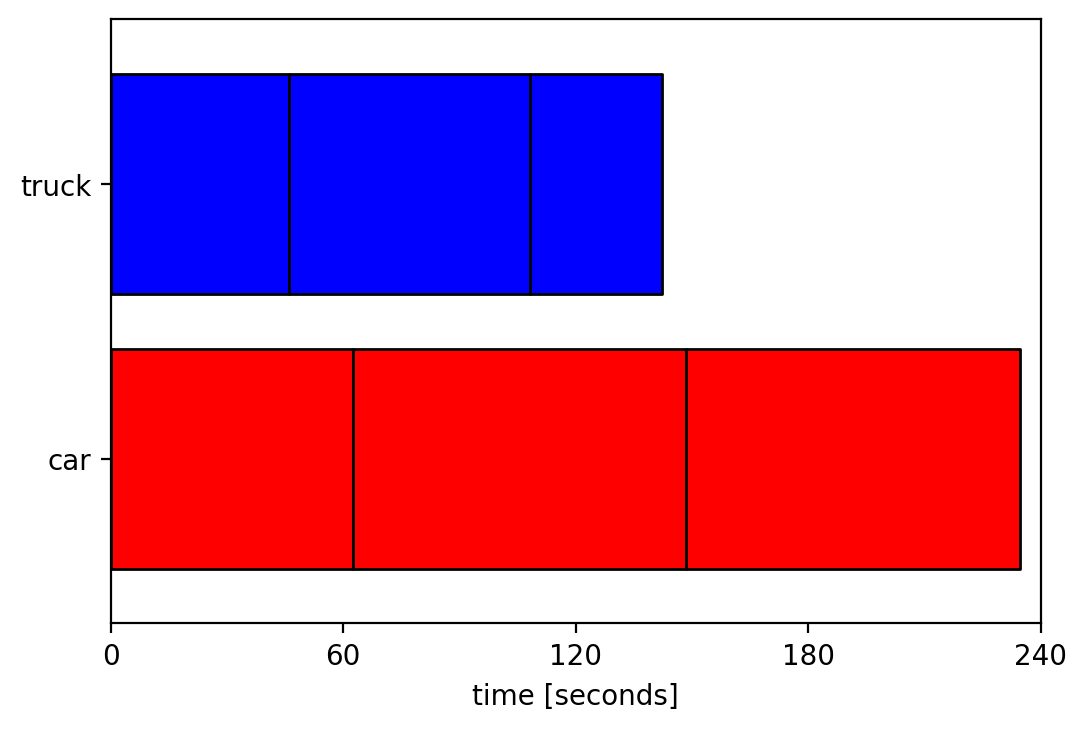

In [371]:
# Create a Gantt chart using the default settings:
vrv.createGantt(assignments = myAssignments, 
                xAxisLabel  = 'time [seconds]')

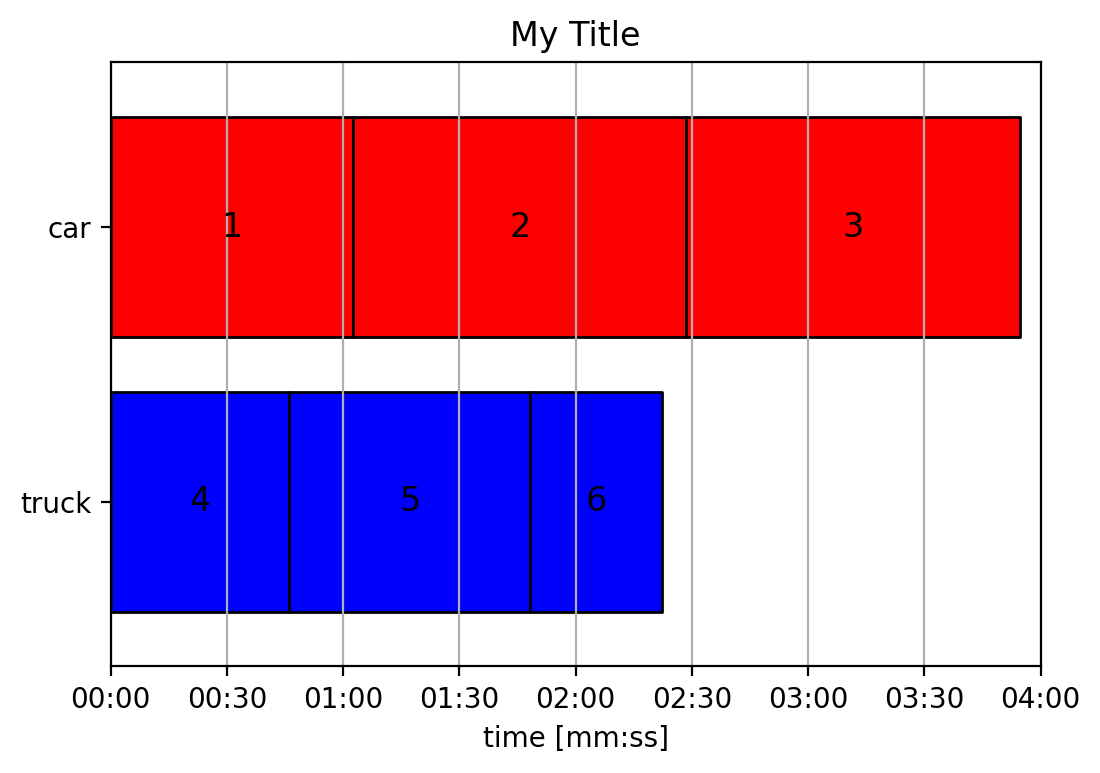

In [372]:
# Create (and save) a Gantt chart using all of the available settings:
vrv.createGantt(assignments         = myAssignments, 
                objectIDorder       = ['truck', 'car'], 
                separateByModelFile = False,
                mergeByodID         = True,
                splitOnColorChange  = True,
                title               = 'My Title',
                xAxisLabel          = 'time [mm:ss]',
                xGrid               = True,
                yGrid               = False,
                xMin                = 0,
                xMax                = None,
                xGridFreq           = 30,
                timeFormat          = 'MS',
                overlayColumn       = 'odID',
                missingColor        = 'lightgray',
                filename            = 'myGantt.png')